In [1]:
#pip install category-encoders==1.0.4

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc

In [3]:
#OJO: Inlcuir ruta del csv donde se tenga almacenado el archivo
df= pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/sample_mmp.csv")


C:\Users\stefa\AppData\Local\Temp\ipykernel_2128\3635003688.py:2: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/sample_mmp.csv")


### EDA

In [4]:
df.head(5)

Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2     2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3     1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4      236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  ...  Census_FirmwareVersionIdentifier  \
0                        NaN  ...                           19951.0   
1                        NaN  ...                           48753.0   
2                        NaN  ...                           33111.0   
3                        NaN  ...                           48473.0   
4                        NaN  ...                            4343.0   

   Census_IsSecureBootEnabled  Census_IsWIMBootEnabled  \
0                           0                      NaN   
1                           0                      0.0   
2                           1                      0.0   
3                           1                      NaN   
4                           1                      NaN   

   Census_IsVirtualDevice  Census_IsTouchEnabled  Census_IsPenCapable  \
0                     0.0                      0                    0   
1                     0.0                      0                    0   
2                     0.0                      1                    1   
3                     0.0                      0                    0   
4                     0.0                      1                    0   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           1.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           1.0   

   Wdft_RegionIdentifier HasDetections  
0                   11.0             1  
1                    3.0             0  
2                   15.0             0  
3                   15.0             1  
4                   13.0             1  

[5 rows x 84 columns]

In [5]:
df.shape

(500000, 84)

In [6]:
df.describe().T

count          mean  \
Unnamed: 0                                         500000.0  4.458888e+06   
IsBeta                                             500000.0  2.000000e-06   
RtpStateBitfield                                   498168.0  6.846207e+00   
IsSxsPassiveMode                                   500000.0  1.724200e-02   
DefaultBrowsersIdentifier                           24061.0  1.652825e+03   
AVProductStatesIdentifier                          498062.0  4.785091e+04   
AVProductsInstalled                                498062.0  1.326763e+00   
AVProductsEnabled                                  498062.0  1.020714e+00   
HasTpm                                             500000.0  9.878160e-01   
CountryIdentifier                                  500000.0  1.080375e+02   
CityIdentifier                                     481760.0  8.127165e+04   
OrganizationIdentifier                             345437.0  2.486994e+01   
GeoNameIdentifier                                  499984.0  1.697304e+02   
LocaleEnglishNameIdentifier                        500000.0  1.226110e+02   
OsBuild                                            500000.0  1.572693e+04   
OsSuite                                            500000.0  5.747186e+02   
IsProtected                                        498074.0  9.457892e-01   
AutoSampleOptIn                                    500000.0  2.800000e-05   
SMode                                              470152.0  4.381562e-04   
IeVerIdentifier                                    496791.0  1.266626e+02   
Firewall                                           494838.0  9.782414e-01   
UacLuaenable                                       499377.0  1.372503e+01   
Census_OEMNameIdentifier                           494619.0  2.218646e+03   
Census_OEMModelIdentifier                          494236.0  2.391280e+05   
Census_ProcessorCoreCount                          497653.0  3.994074e+00   
Census_ProcessorManufacturerIdentifier             497653.0  4.529069e+00   
Census_ProcessorModelIdentifier                    497651.0  2.370987e+03   
Census_PrimaryDiskTotalCapacity                    497024.0  5.140433e+05   
Census_SystemVolumeTotalCapacity                   497024.0  3.780546e+05   
Census_HasOpticalDiskDrive                         500000.0  7.703400e-02   
Census_TotalPhysicalRAM                            495444.0  6.129232e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  497346.0  1.668984e+01   
Census_InternalPrimaryDisplayResolutionHorizontal  497350.0  1.548304e+03   
Census_InternalPrimaryDisplayResolutionVertical    497350.0  8.982393e+02   
Census_InternalBatteryNumberOfCharges              484962.0  1.125600e+09   
Census_OSBuildNumber                               500000.0  1.584137e+04   
Census_OSBuildRevision                             500000.0  9.672248e+02   
Census_OSInstallLanguageIdentifier                 496668.0  1.460551e+01   
Census_OSUILocaleIdentifier                        500000.0  6.044631e+01   
Census_IsPortableOperatingSystem                   500000.0  5.220000e-04   
Census_IsFlightingInternal                          84775.0  2.359186e-05   
Census_IsFlightsDisabled                           491067.0  1.425467e-05   
Census_ThresholdOptIn                              181896.0  2.583894e-04   
Census_FirmwareManufacturerIdentifier              489651.0  4.026759e+02   
Census_FirmwareVersionIdentifier                   490939.0  3.303099e+04   
Census_IsSecureBootEnabled                         500000.0  4.854380e-01   
Census_IsWIMBootEnabled                            182334.0  0.000000e+00   
Census_IsVirtualDevice                             499099.0  7.066734e-03   
Census_IsTouchEnabled                              500000.0  1.254340e-01   
Census_IsPenCapable                                500000.0  3.774400e-02   
Census_IsAlwaysOnAlwaysConnectedCapable            495960.0  5.724454e-02   
Wdft_IsGamer                                      

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

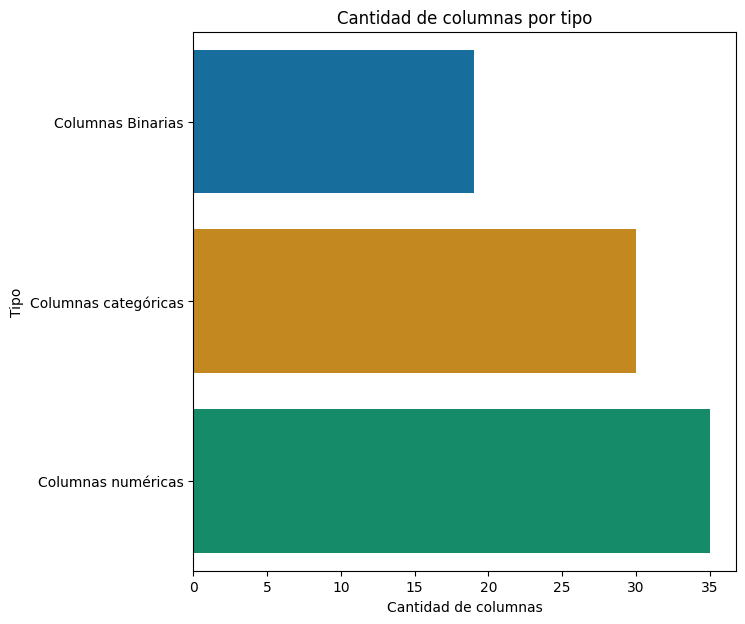

In [8]:
# Clasifico las columnas en base a sus valores únicos o tipo
columnas_binarias = [col for col in df.columns if df[col].nunique() == 2]
columnas_numericas = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in columnas_binarias]
columnas_categoricas = [col for col in df.columns if col not in columnas_numericas and col not in columnas_binarias]

type_df = pd.DataFrame({'Type': ['Columnas Binarias', 'Columnas numéricas', 'Columnas categóricas'],
                        'Conteo de Columnas': [len(columnas_binarias), len(columnas_numericas), len(columnas_categoricas)]}).sort_values('Conteo de Columnas', ascending=True)

f, ax = plt.subplots(figsize=(7, 7))


sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='colorblind', hue = 'Type', legend=False)

plt.title('Cantidad de columnas por tipo')
plt.xlabel('Cantidad de columnas')
plt.ylabel('Tipo')

plt.show()

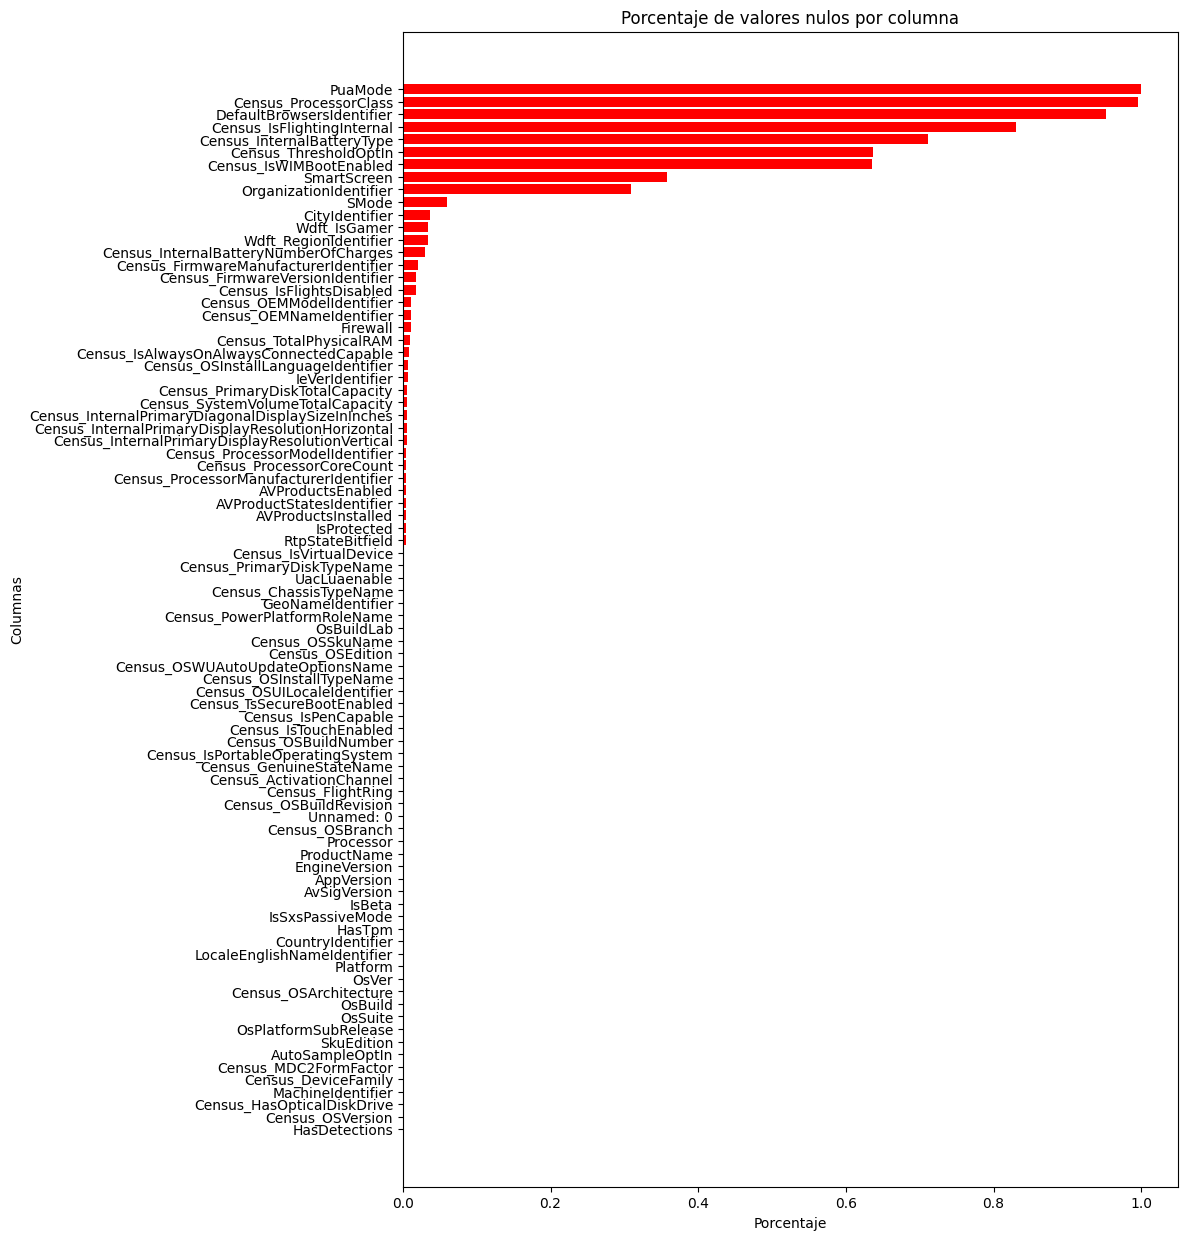

In [9]:
def graficar_valores_nulos():
    # Obtener el porcentaje de valores nulos por columna
    df_valores_nulos = df.isnull().mean().sort_values(ascending=False)

    # Crear el gráfico de barras horizontal
    fig, ax = plt.subplots(figsize=(10, 15))
    ax.barh(y=df_valores_nulos.index,  # Posicionar las barras según los índices
            width=df_valores_nulos,  
            color='red')  

    # Invertir el eje Y para que las columnas aparezcan en orden correcto
    ax.invert_yaxis()

    plt.title('Porcentaje de valores nulos por columna')
    plt.xlabel('Porcentaje')
    plt.ylabel('Columnas')

graficar_valores_nulos()


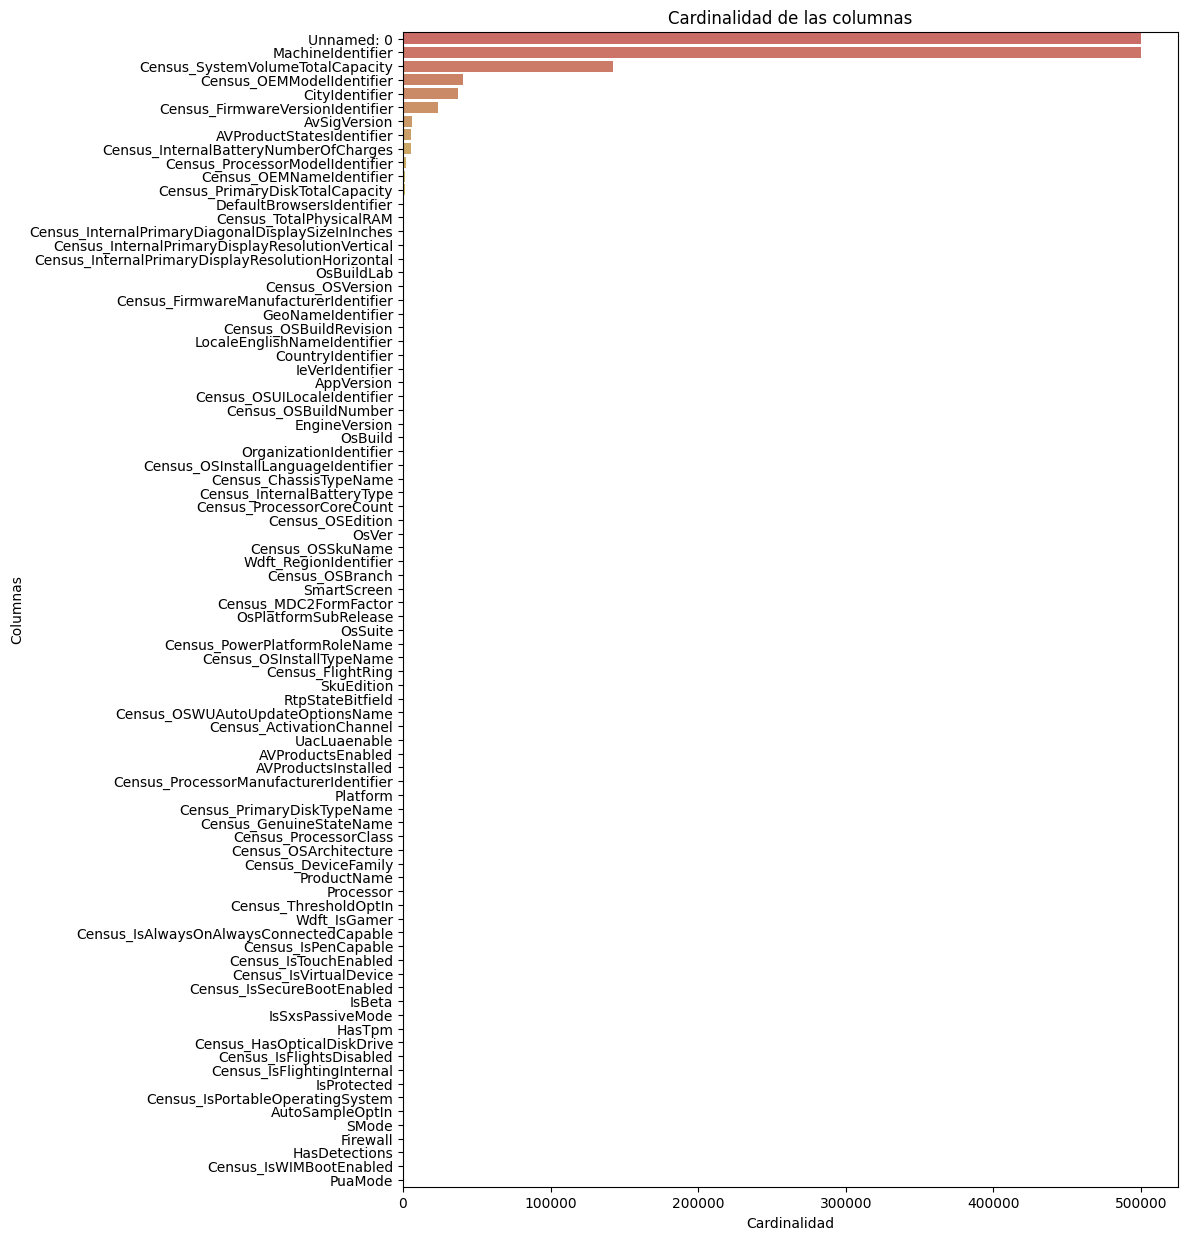

In [10]:
def graficar_cardinalidad():
    # Generar un dataframe que contiene información sobre la cardinalidad de cada columna
    cardinalidad = df.nunique()
    df_cardinalidad = pd.DataFrame({'columna': cardinalidad.index, 'cardinalidad': cardinalidad.values})
    df_cardinalidad = df_cardinalidad.sort_values(by='cardinalidad', ascending=False)

    fig, ax = plt.subplots(figsize=(10, 15))
    sns.barplot(x='cardinalidad', y='columna', data=df_cardinalidad, hue='columna', palette="hls", legend=False)

    plt.title('Cardinalidad de las columnas')
    plt.xlabel('Cardinalidad')
    plt.ylabel('Columnas')

graficar_cardinalidad()


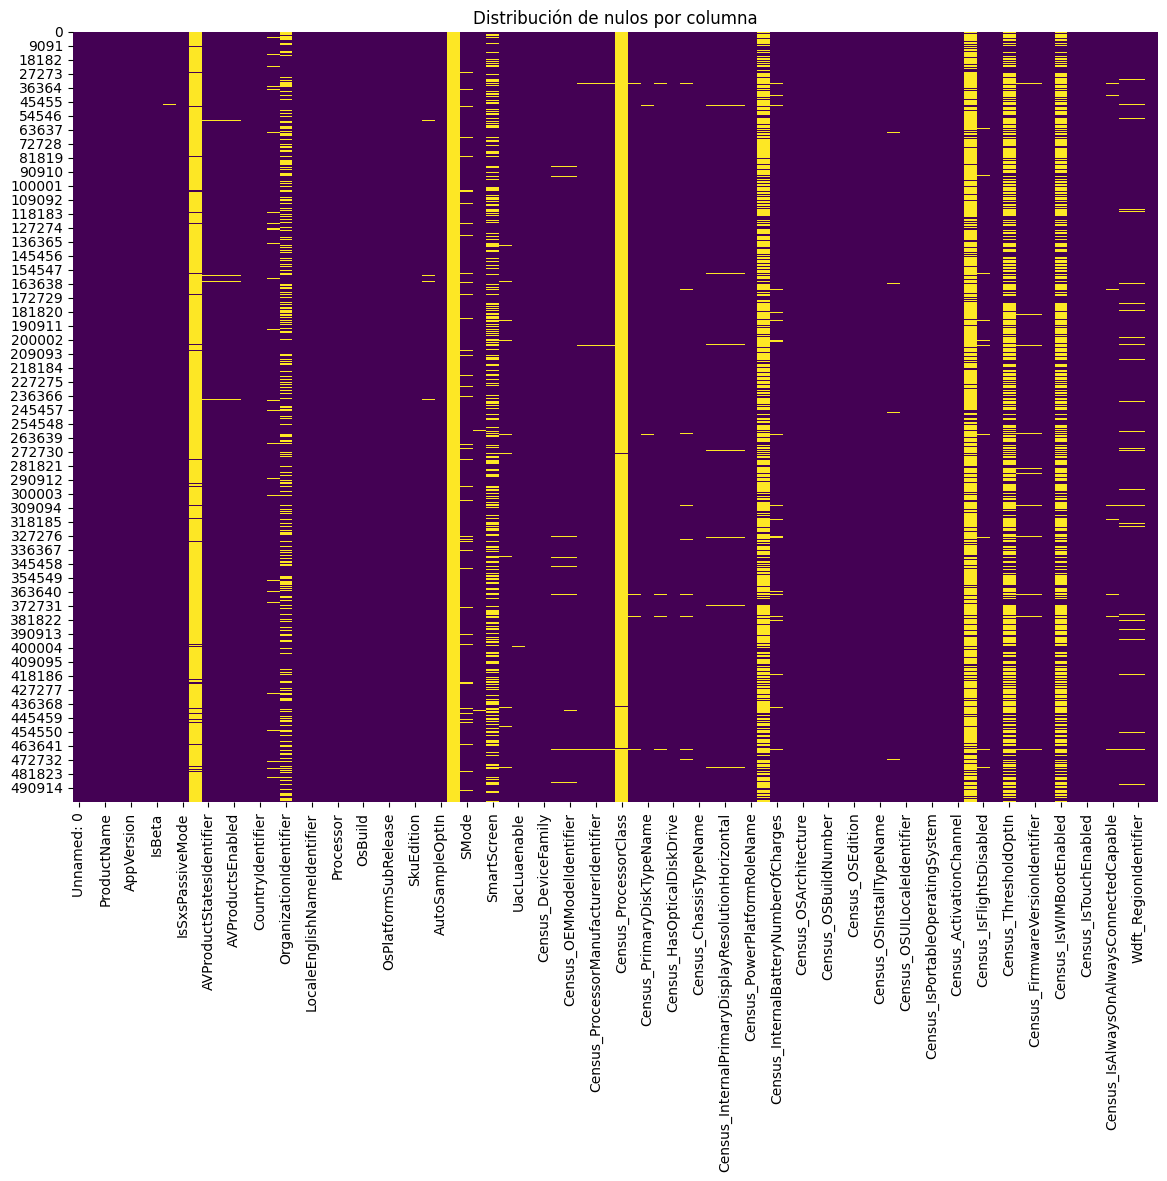

In [11]:
# Distribución de nulos 
#Con este gráfico vemos que los gráficos estén bien distribuidos para ver si al rellenarlos no introducimos ruido en el modelo
plt.figure(figsize=(14, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Distribución de nulos por columna')
plt.show()

In [12]:
#Definir el TARGET
TARGET = 'HasDetections'
df[TARGET].mean()

0.499906

In [13]:
df[TARGET].value_counts(normalize= True)*100

HasDetections
0    50.0094
1    49.9906
Name: proportion, dtype: float64

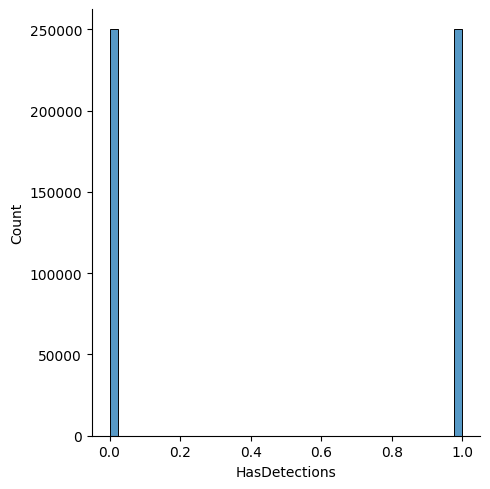

In [14]:
# Visualizar la distribución del TARGET
sns.displot(df[TARGET])

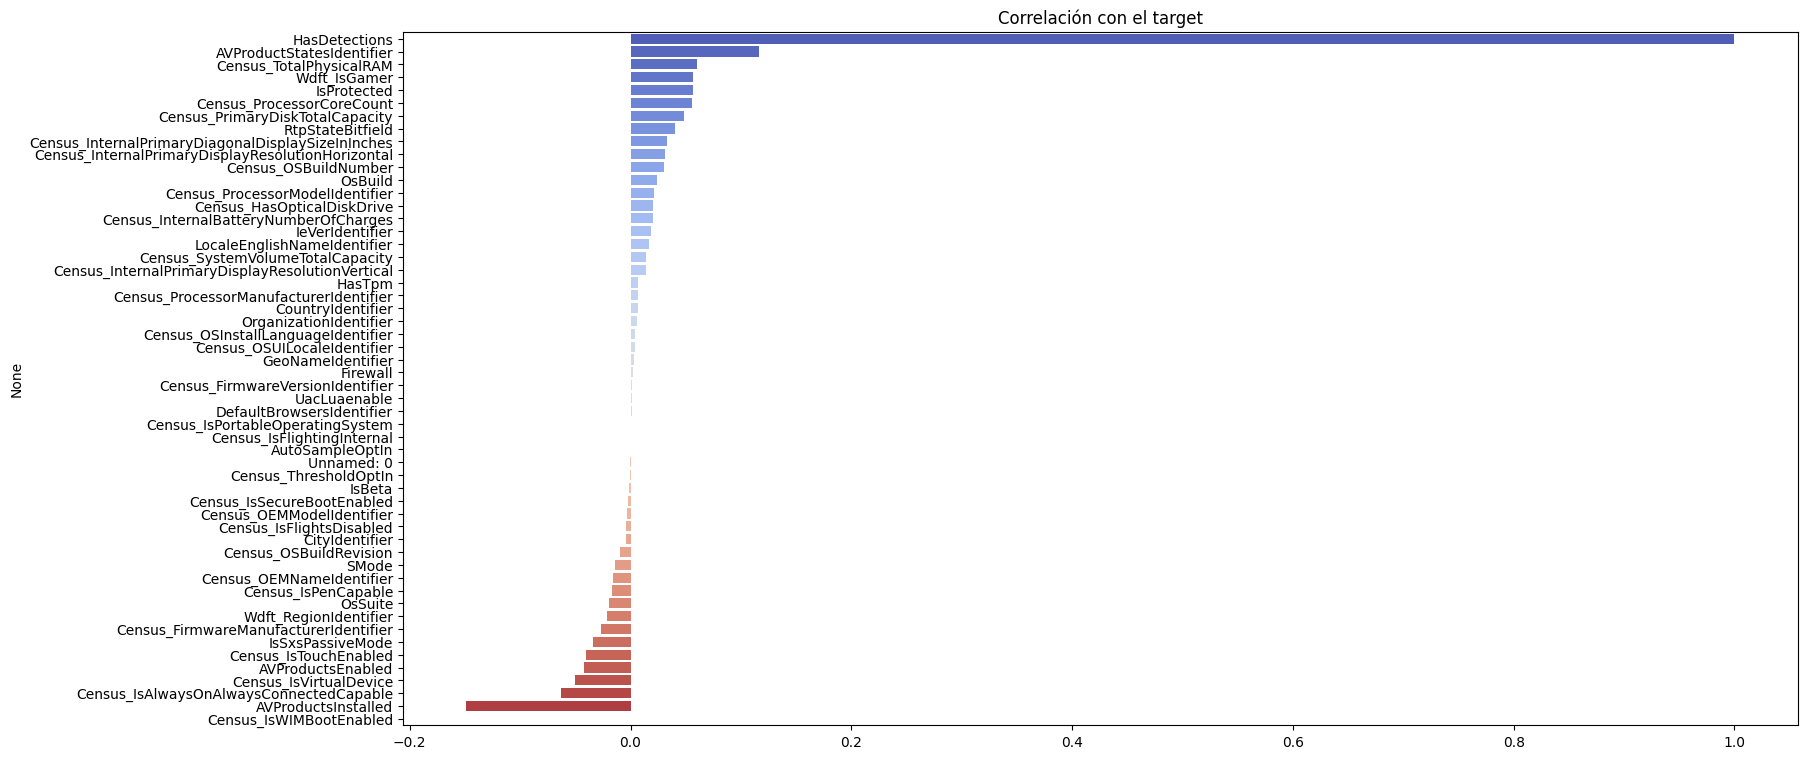

In [15]:
# Calcular la matriz de correlación con respecto a la variable objetivo
correlacion_numericas = df.select_dtypes(include=['number']).corr()['HasDetections'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(18, 9))
sns.barplot(x=correlacion_numericas.values, y=correlacion_numericas.index, hue=correlacion_numericas.index, palette='coolwarm', legend=False)

plt.title('Correlación con el target')

plt.show()


C:\Users\stefa\AppData\Local\Temp\ipykernel_2128\1649549582.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True)


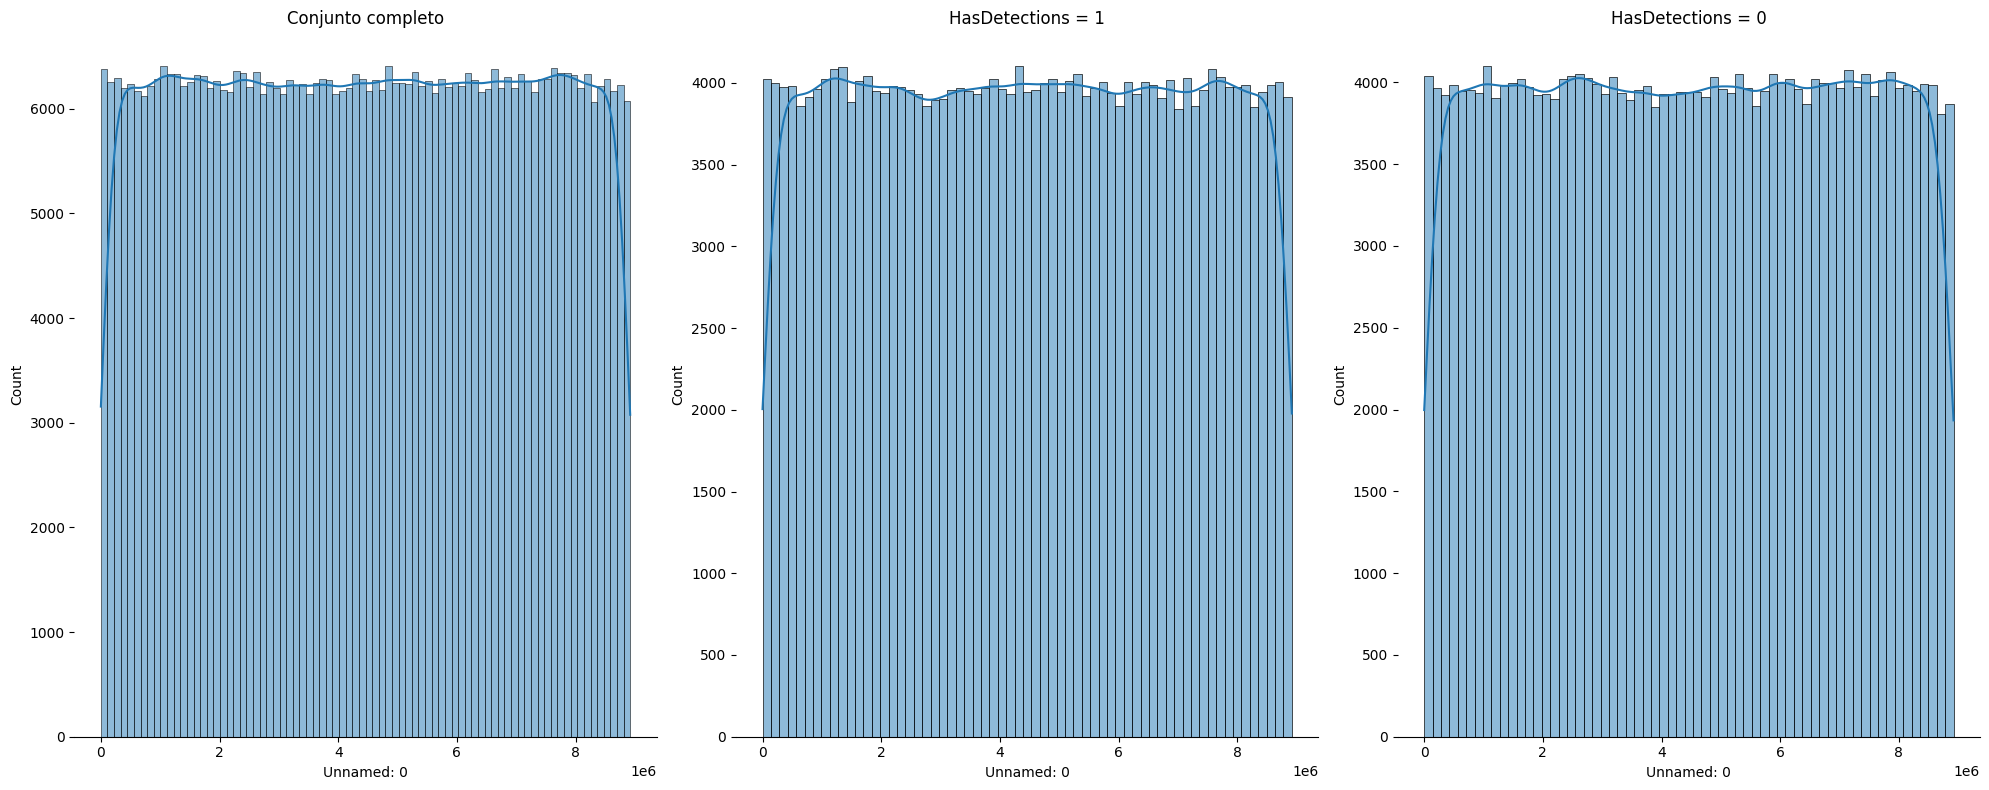

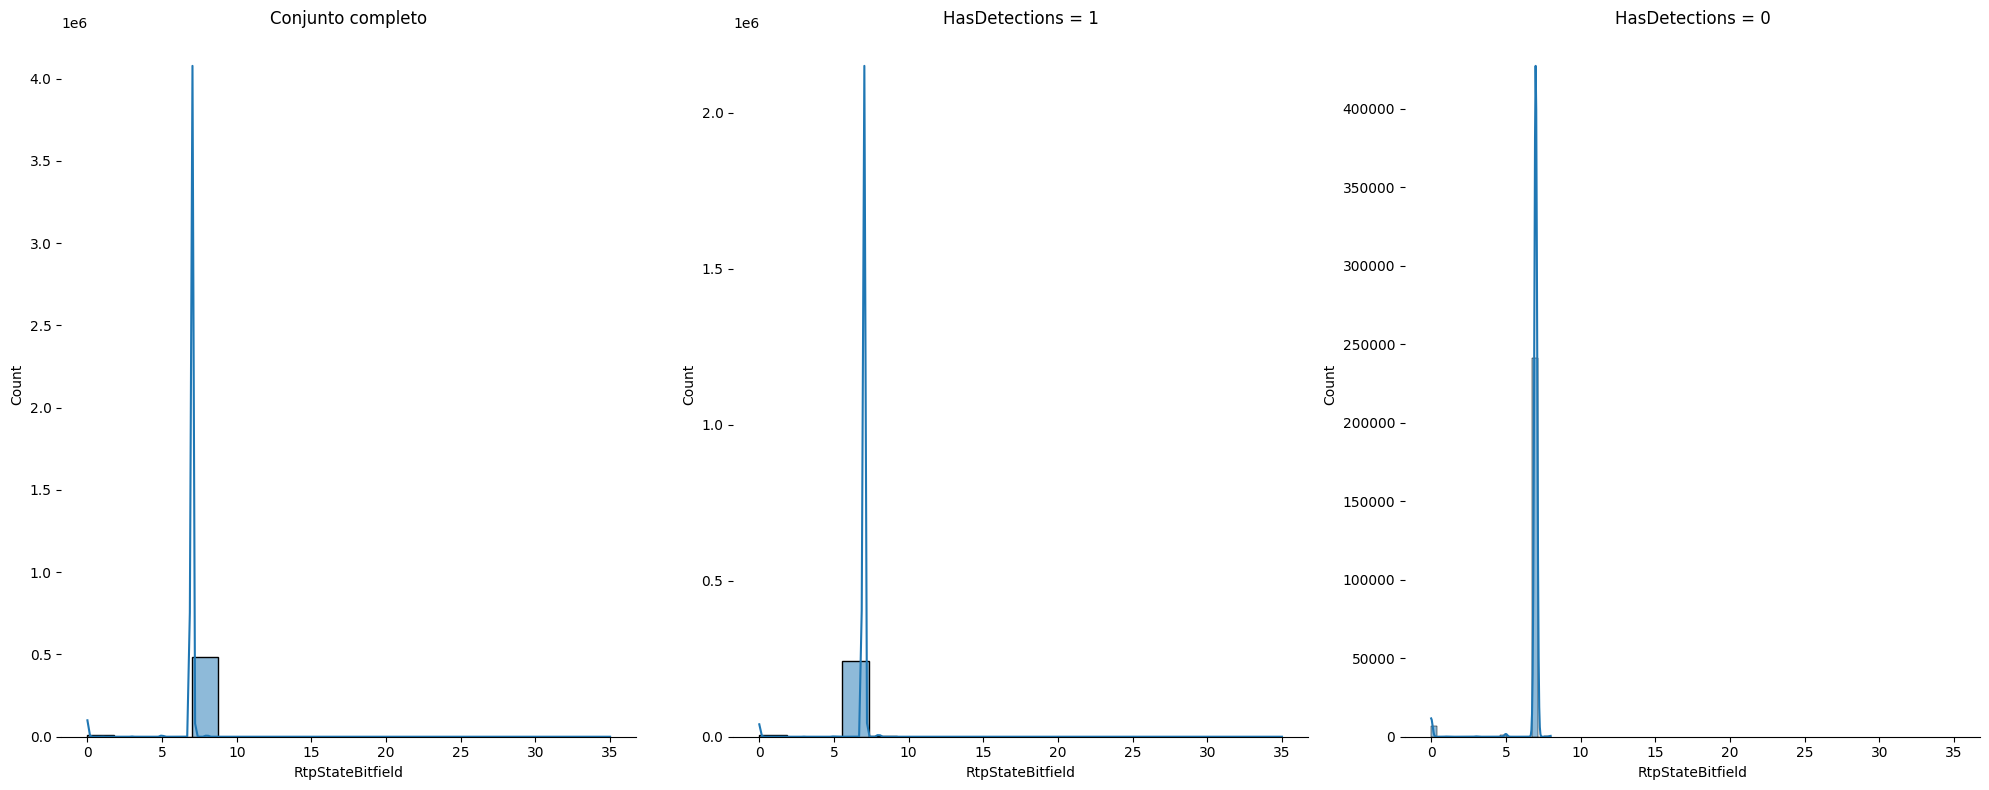

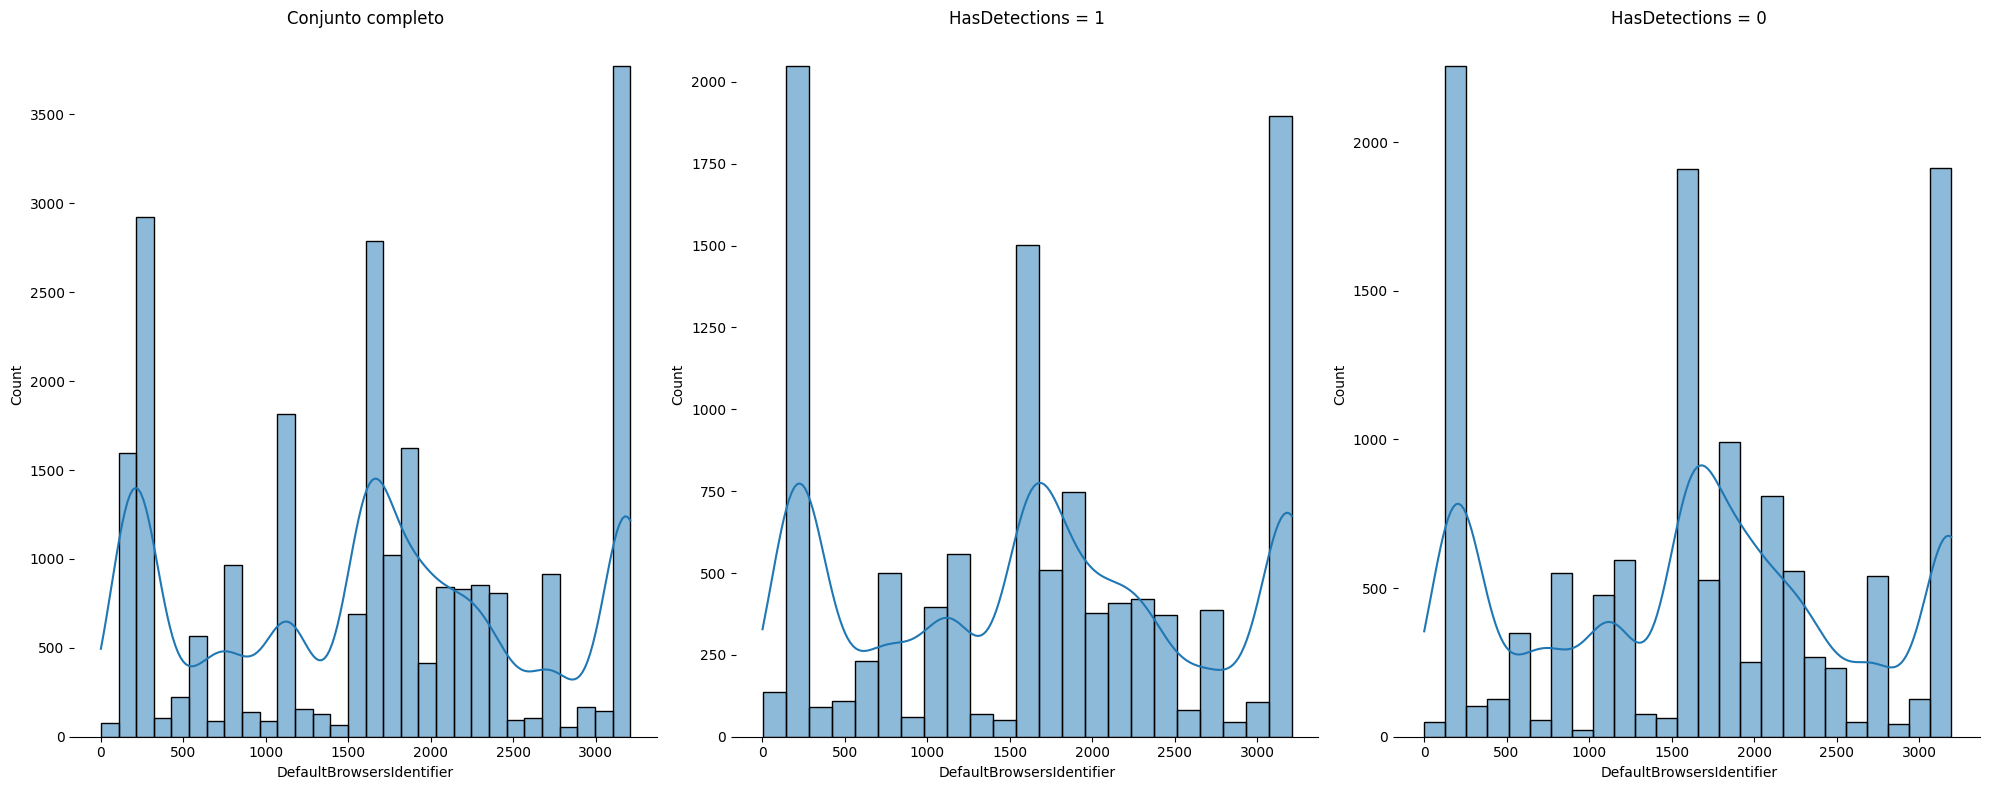

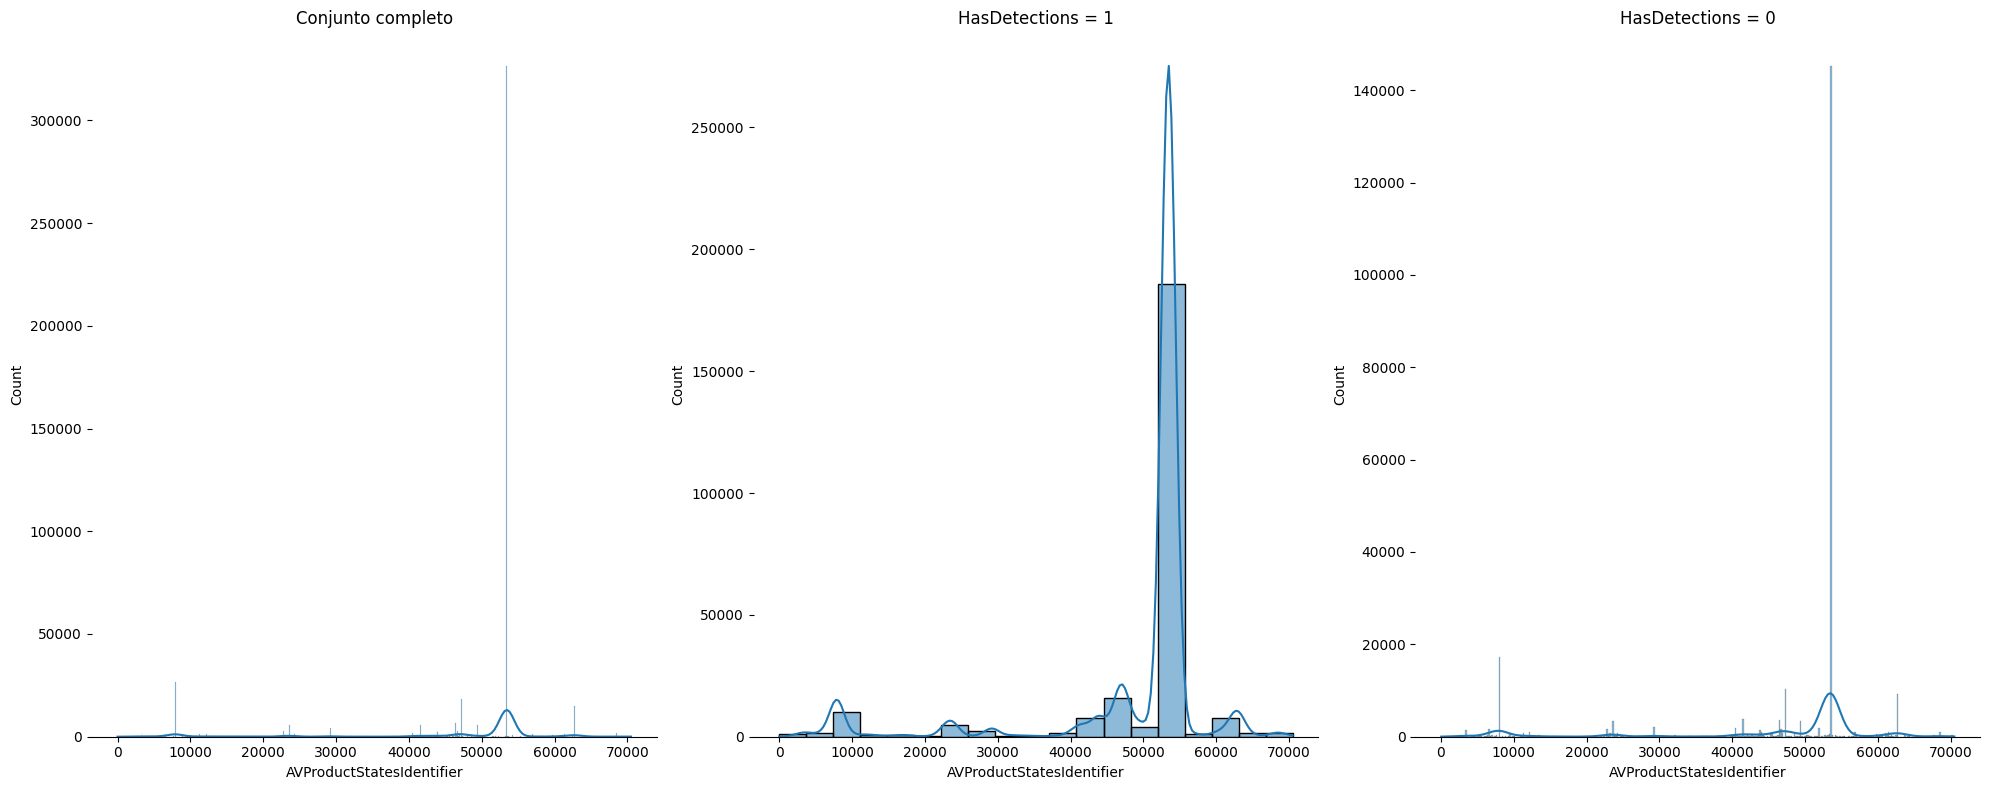

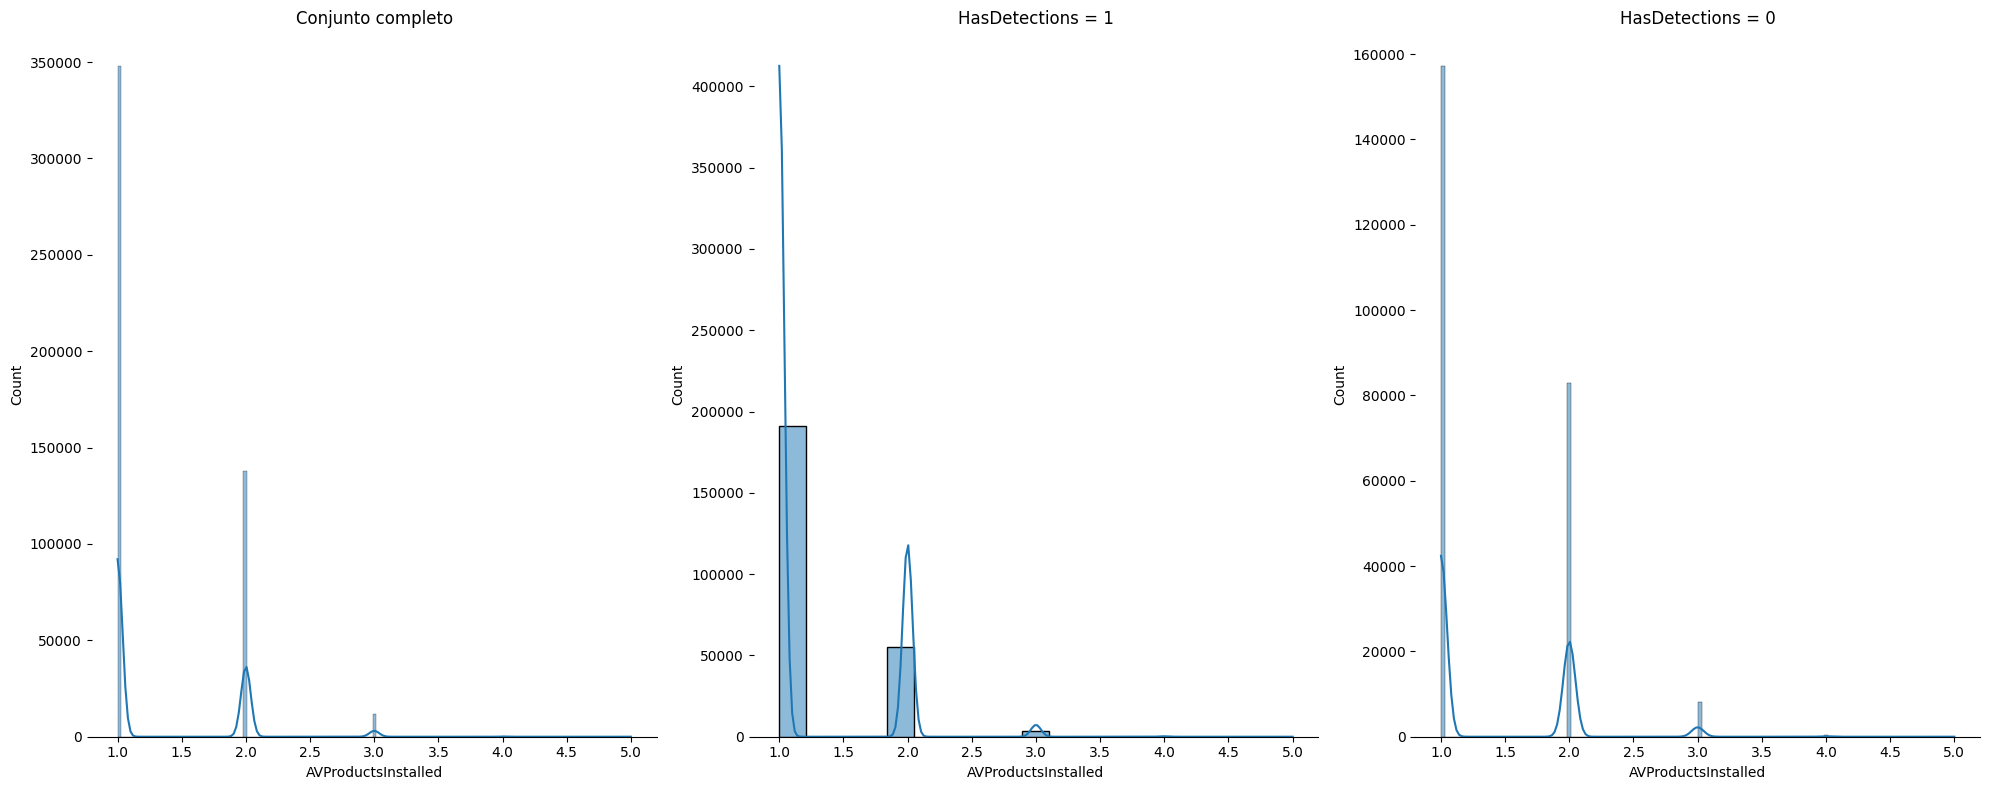

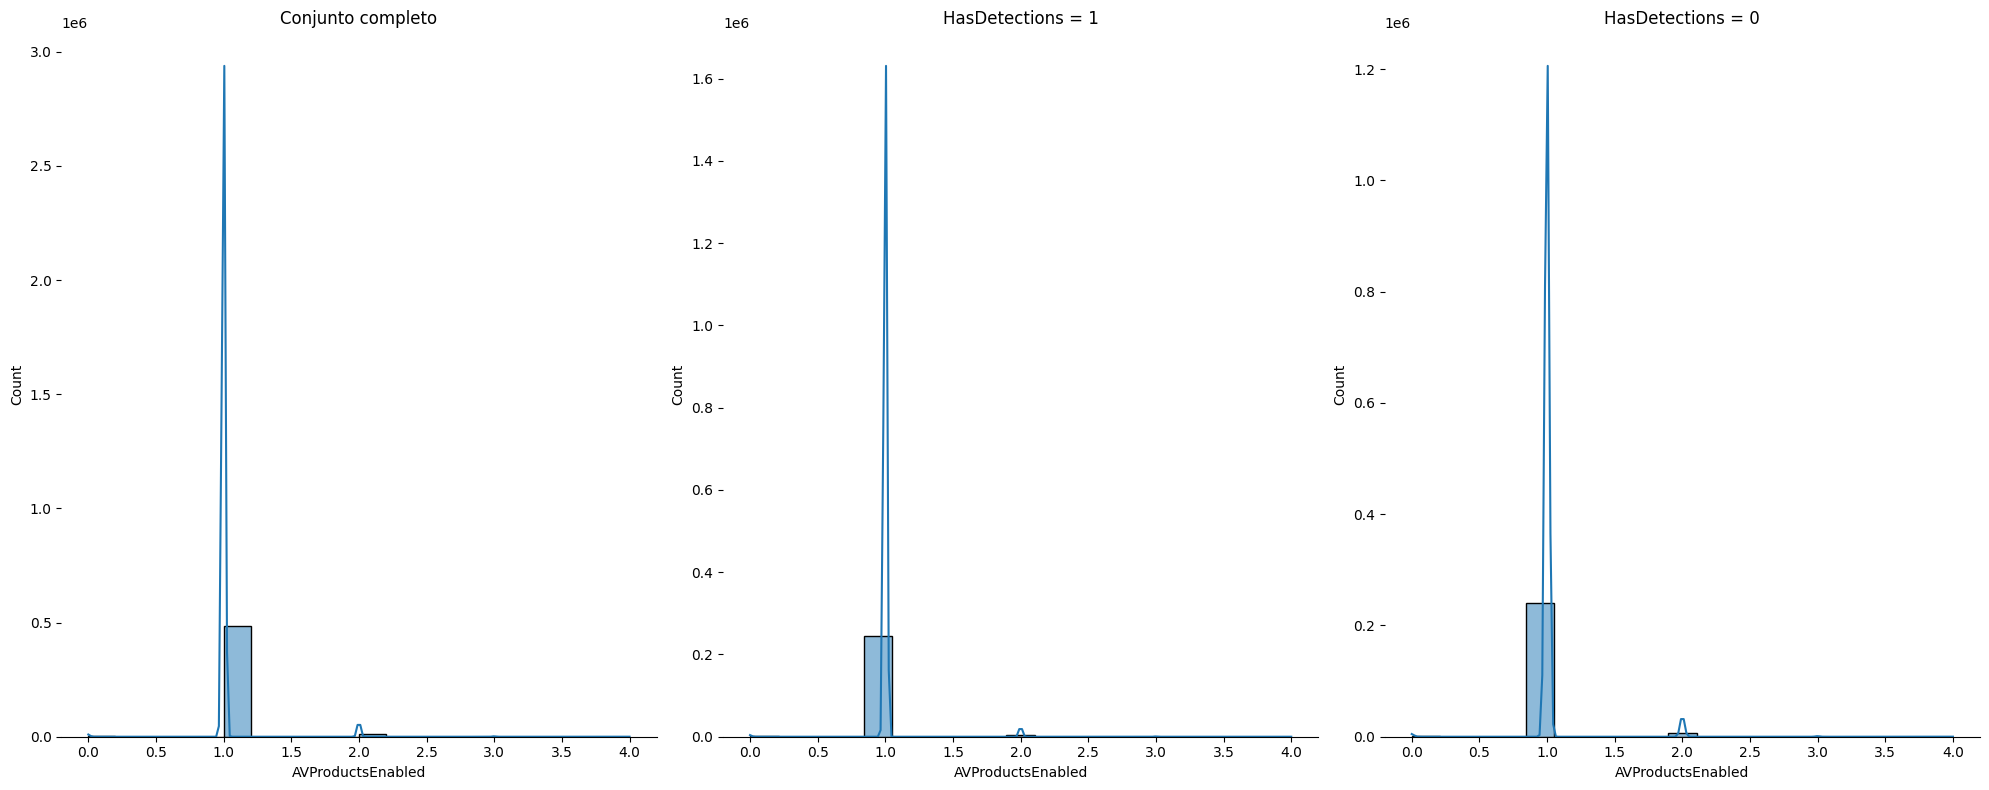

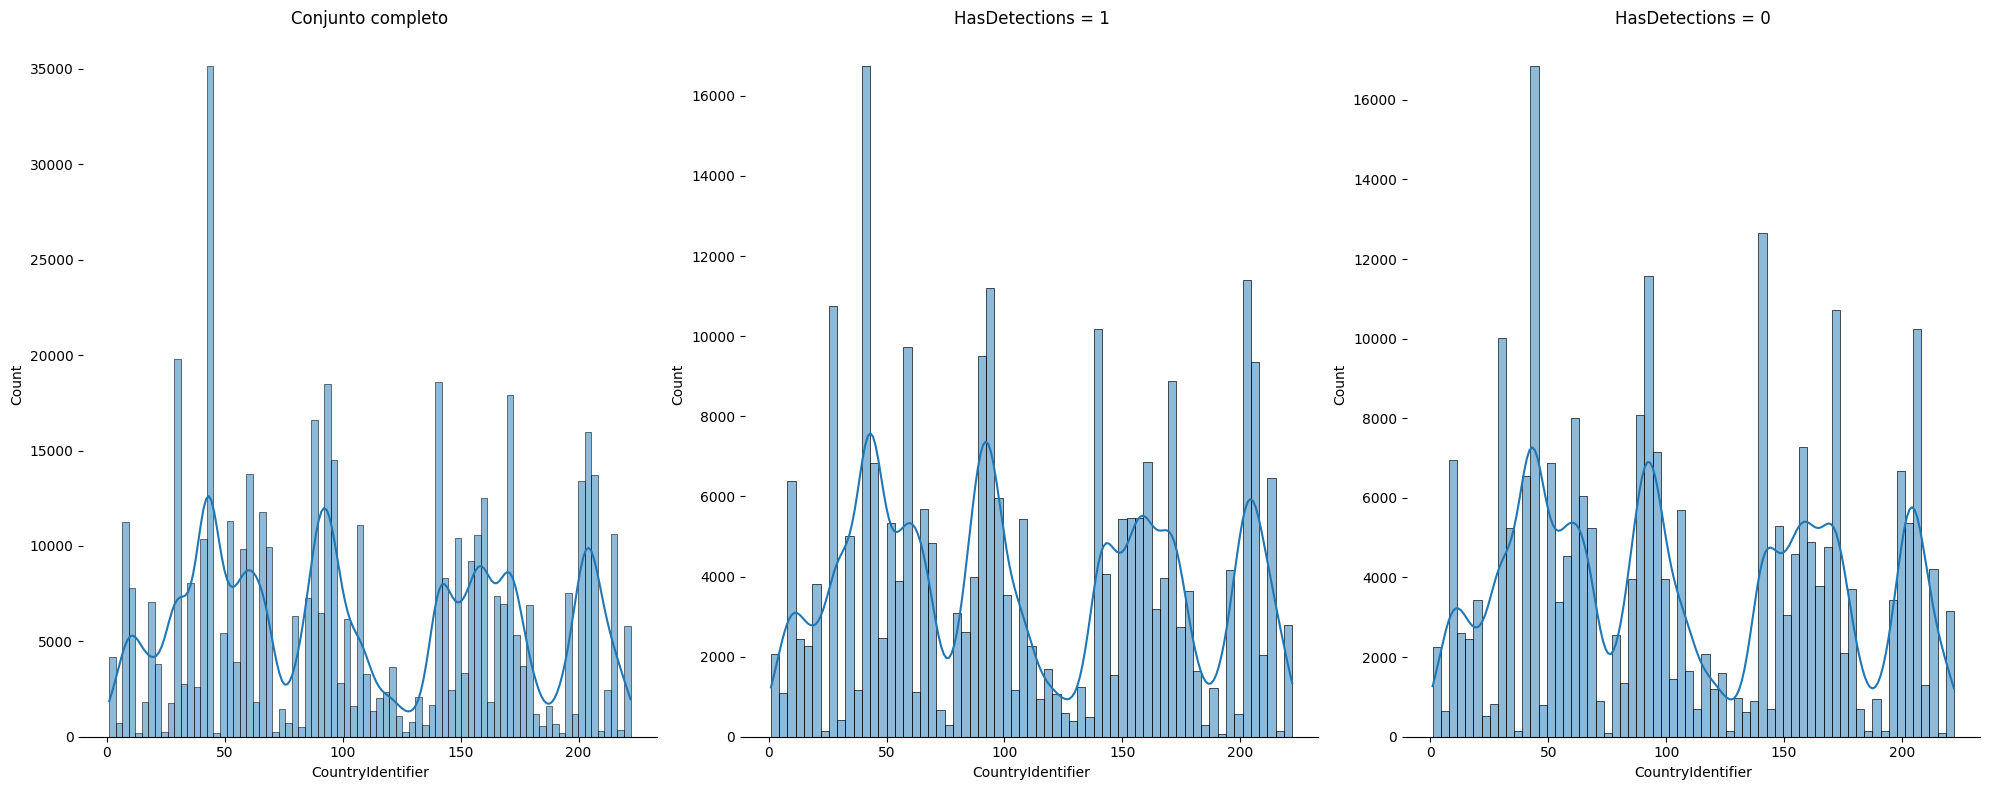

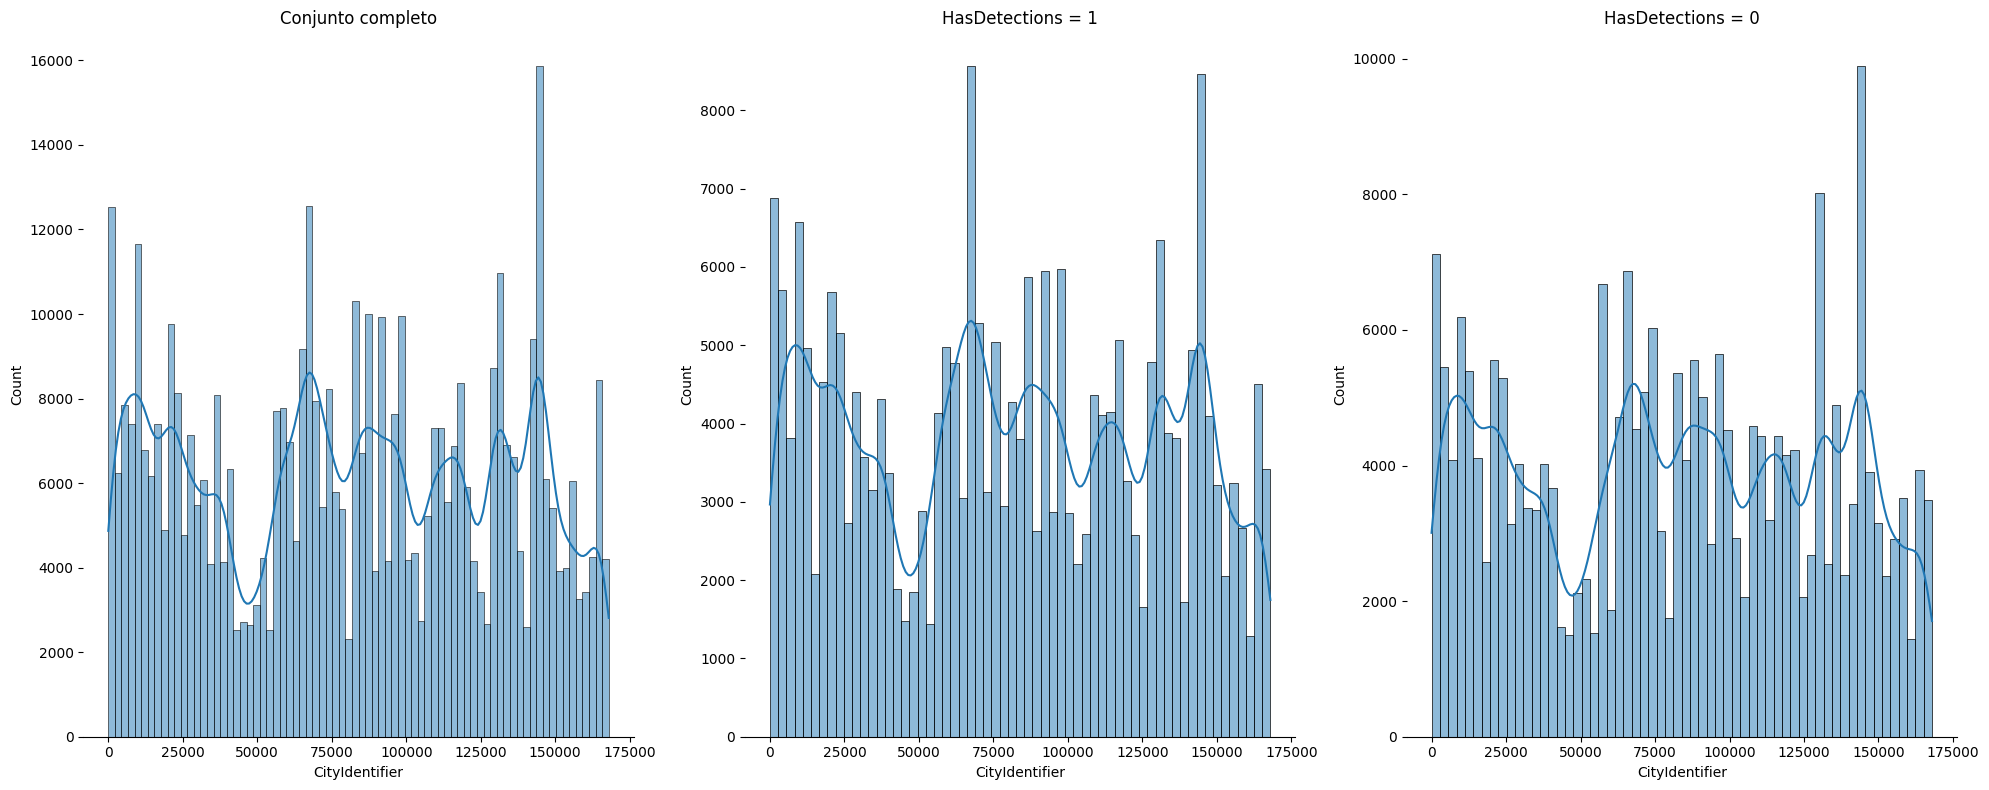

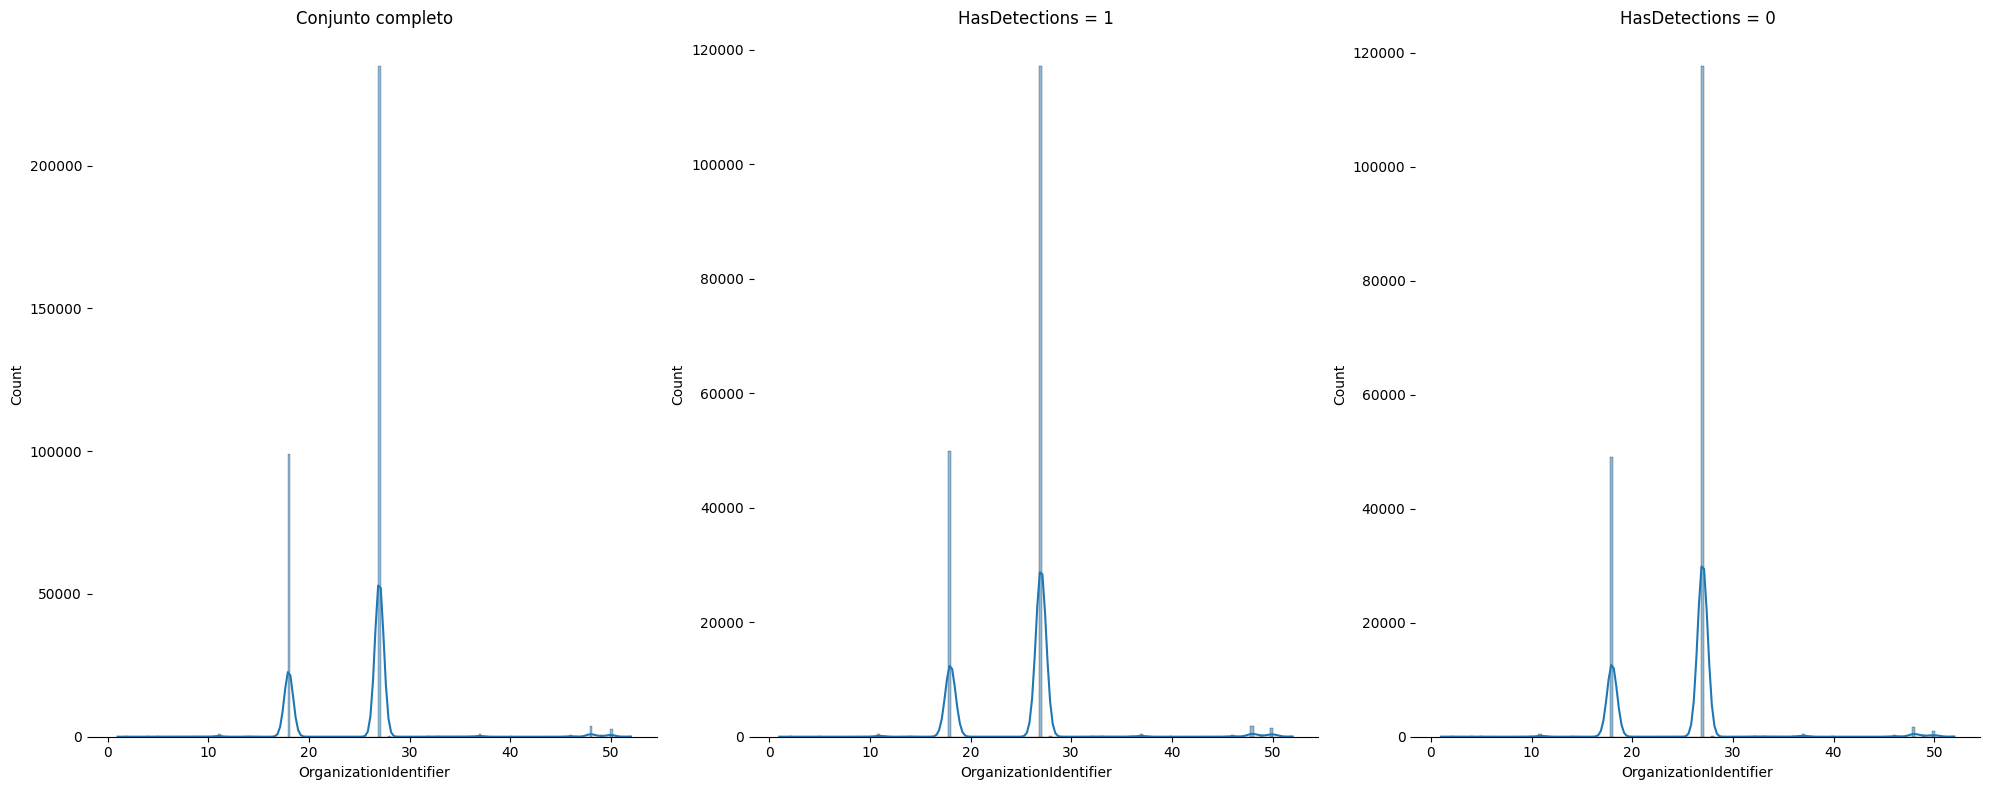

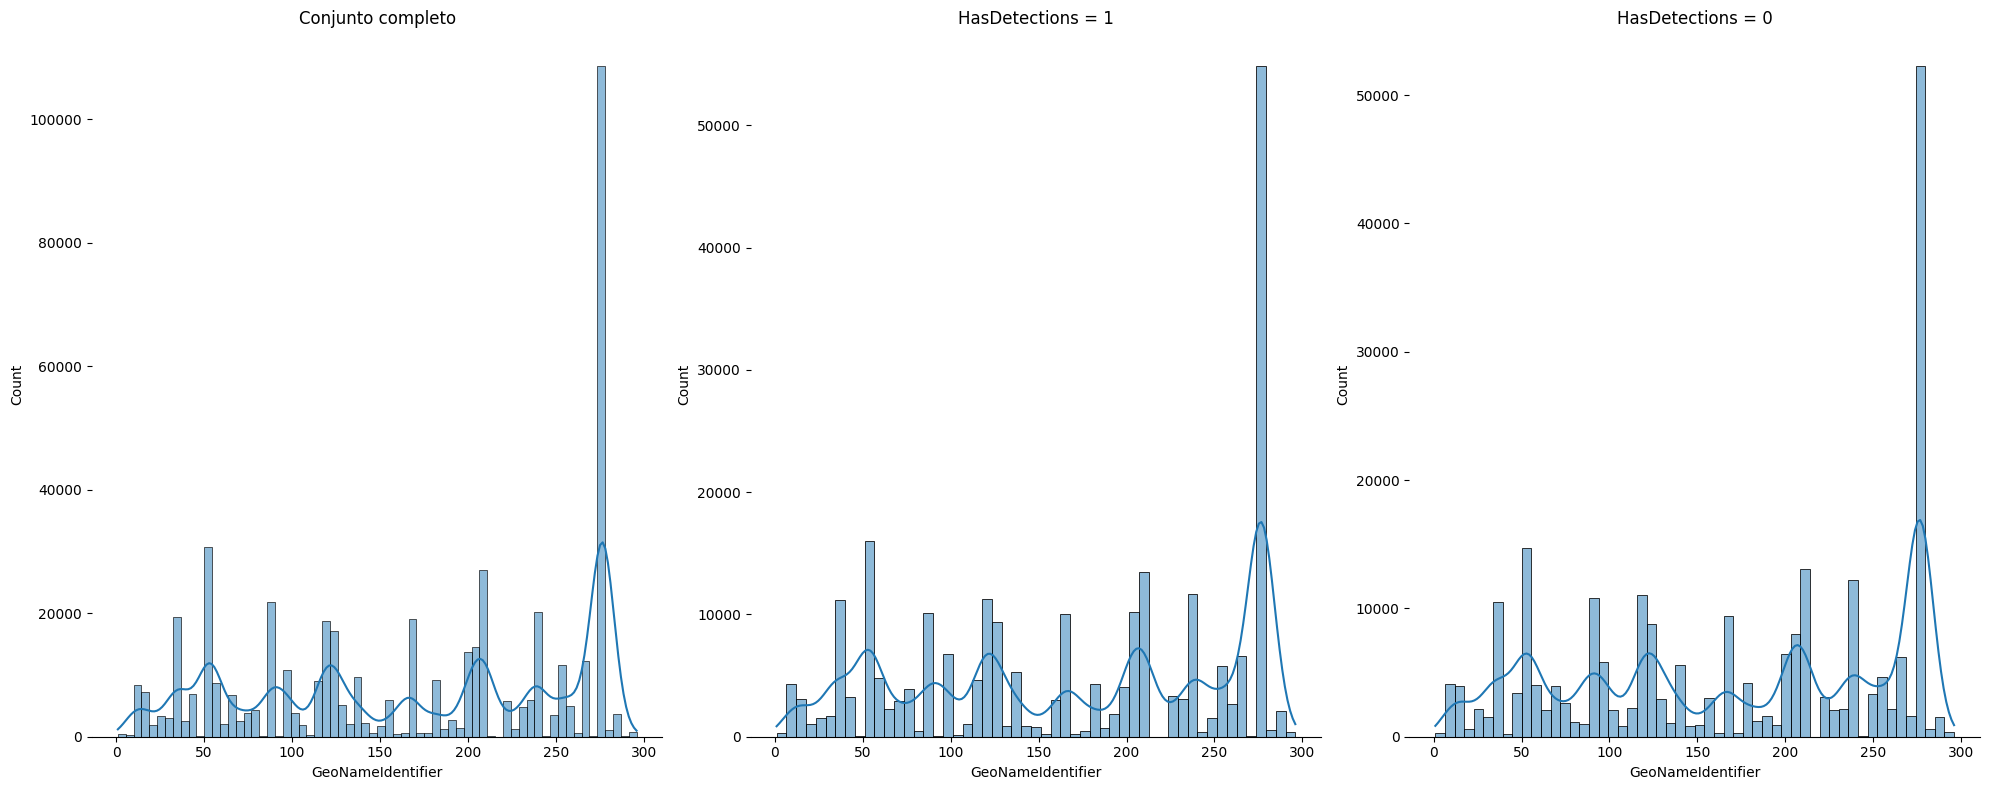

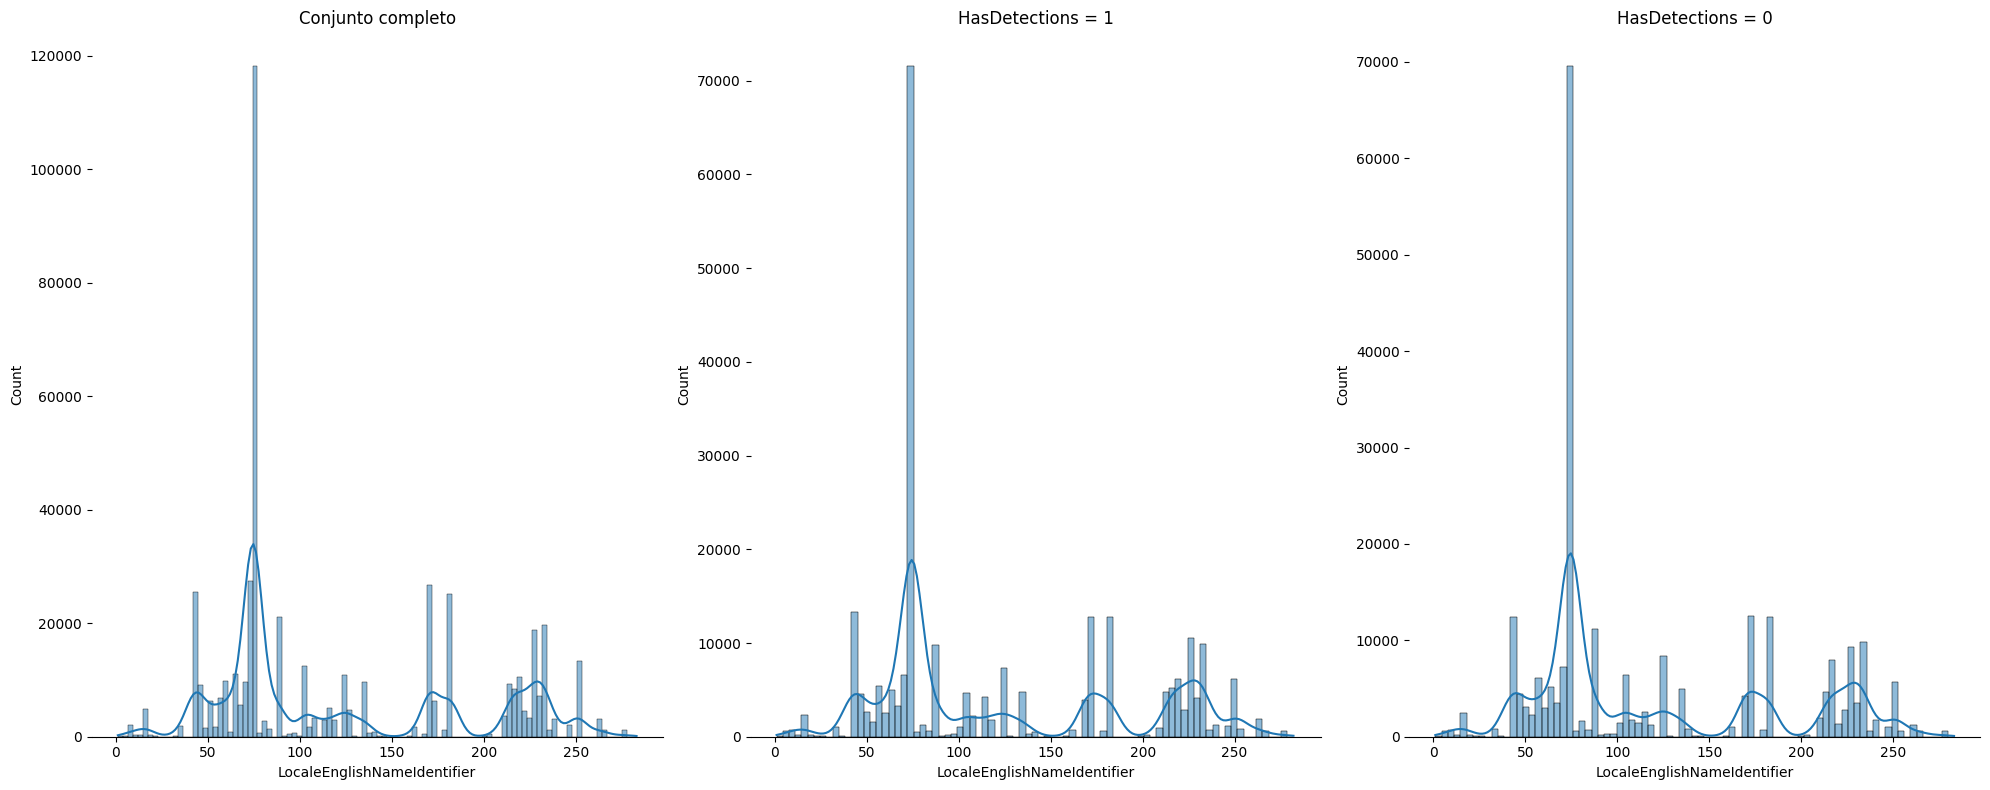

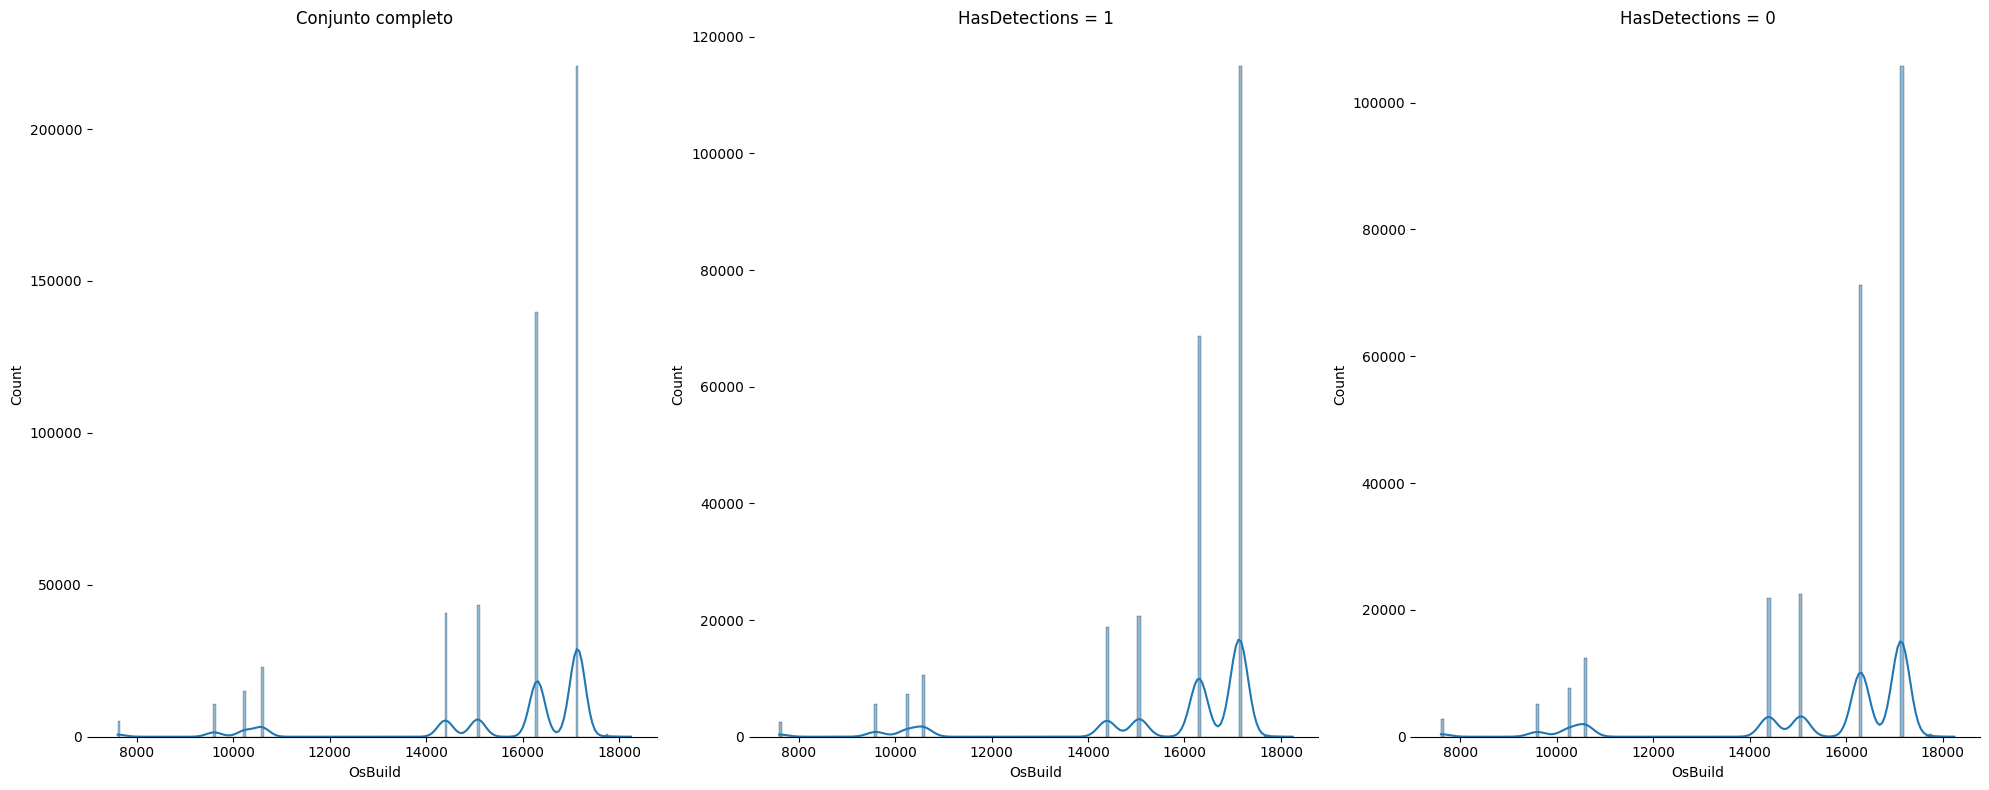

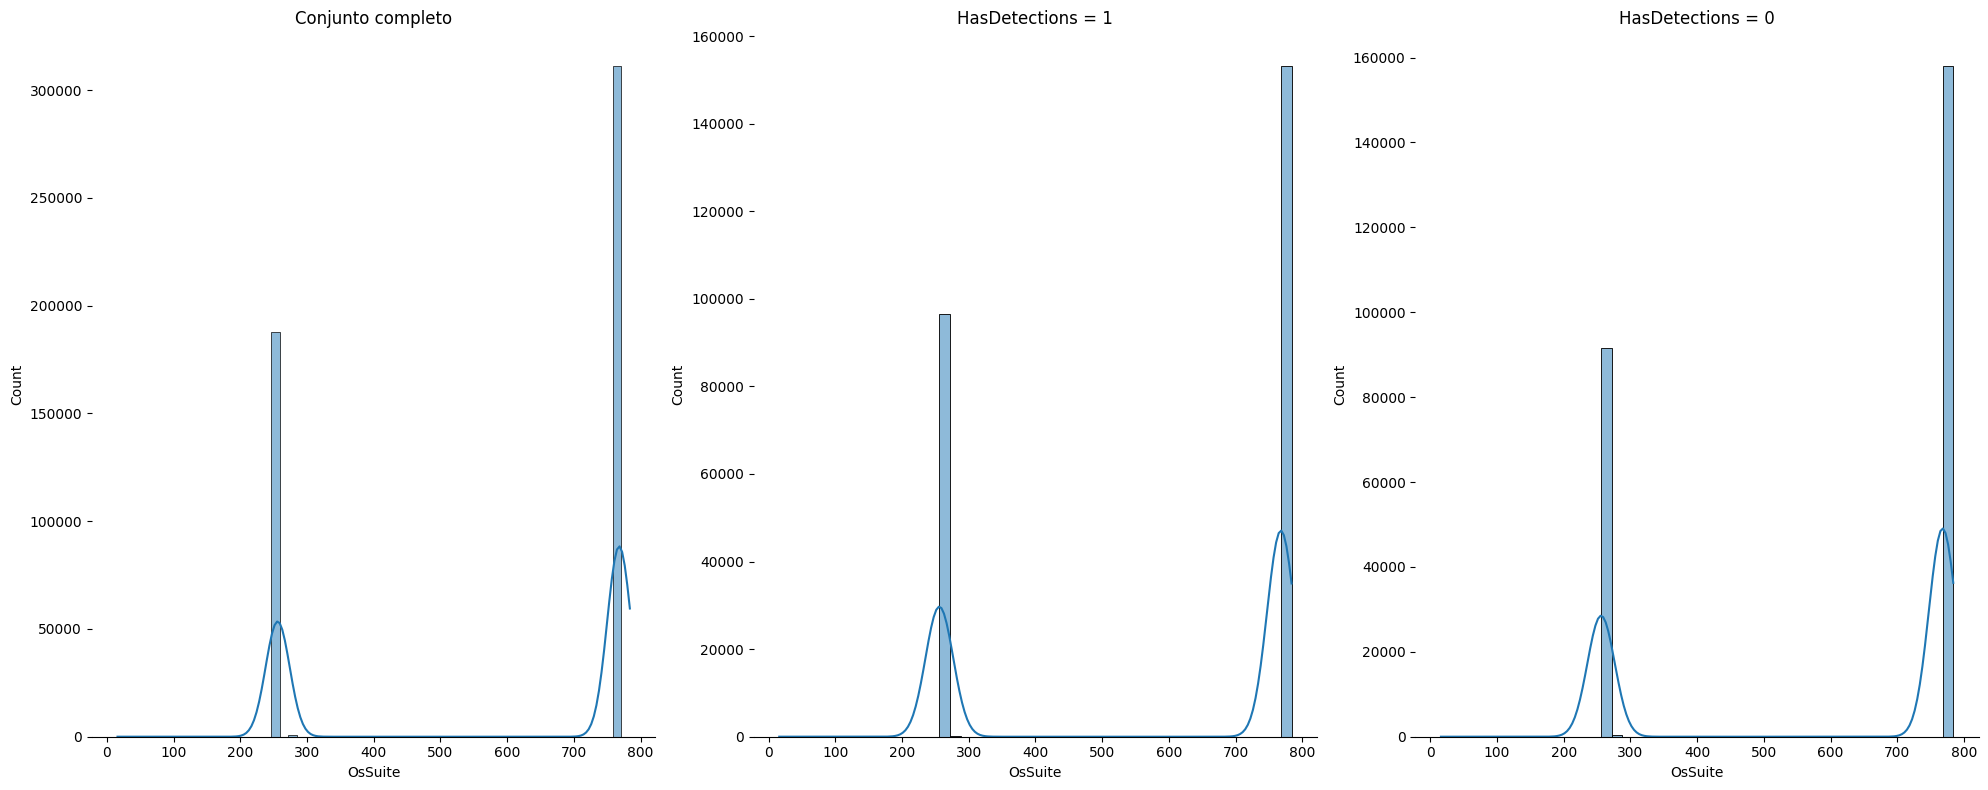

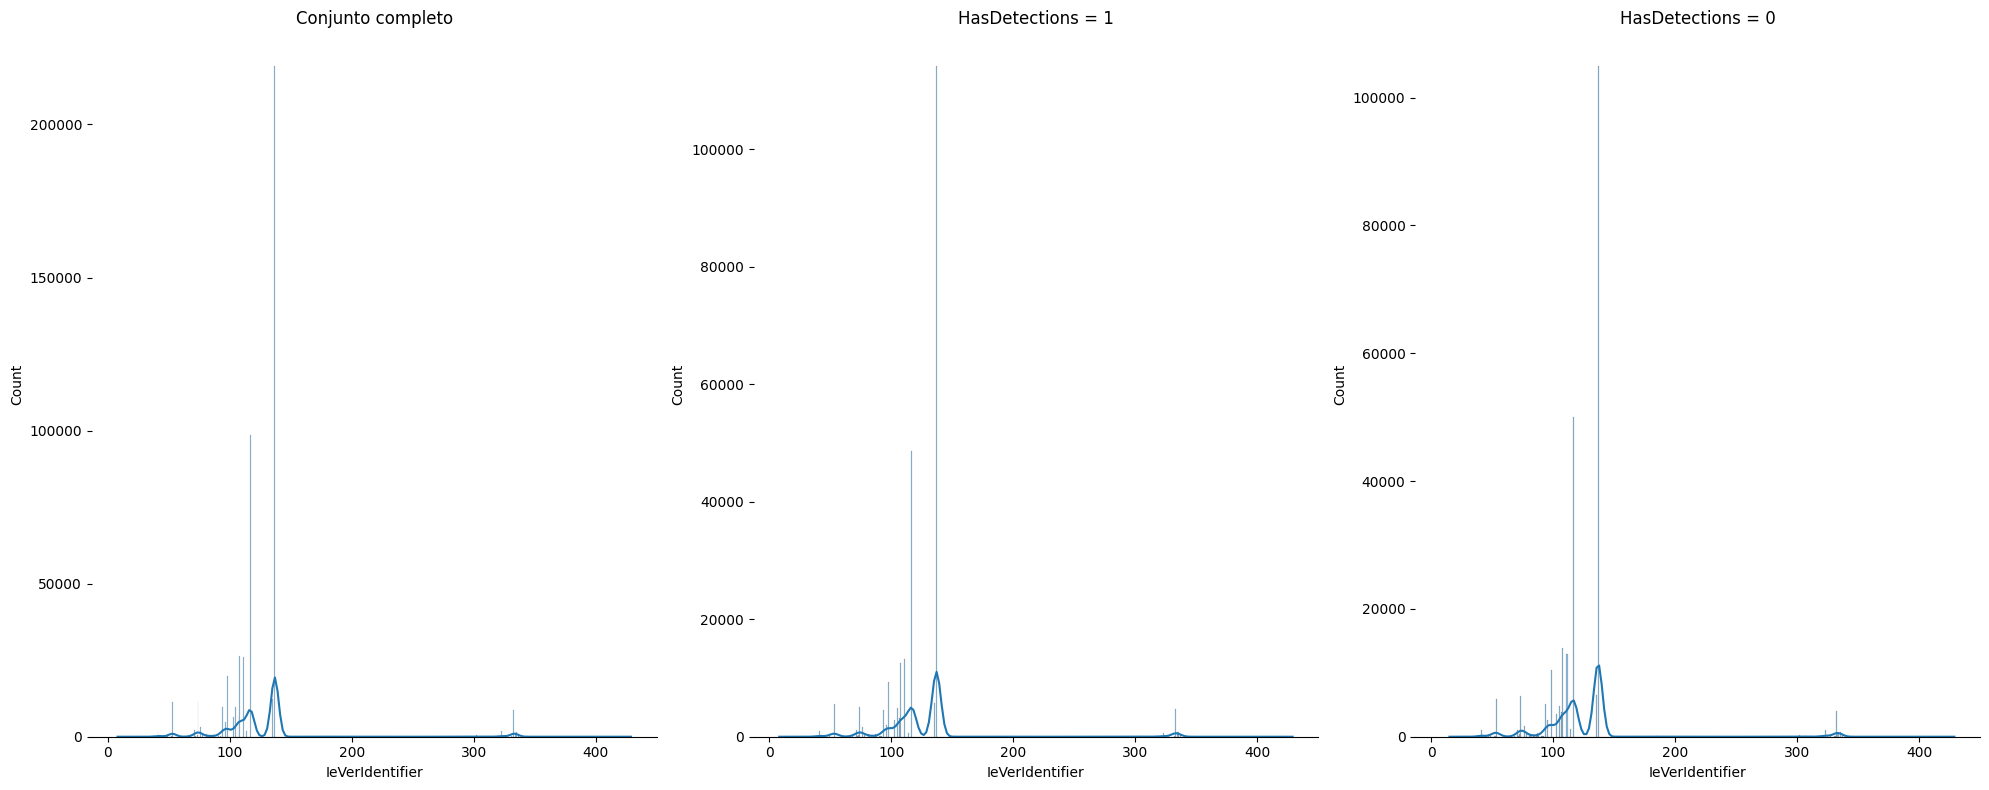

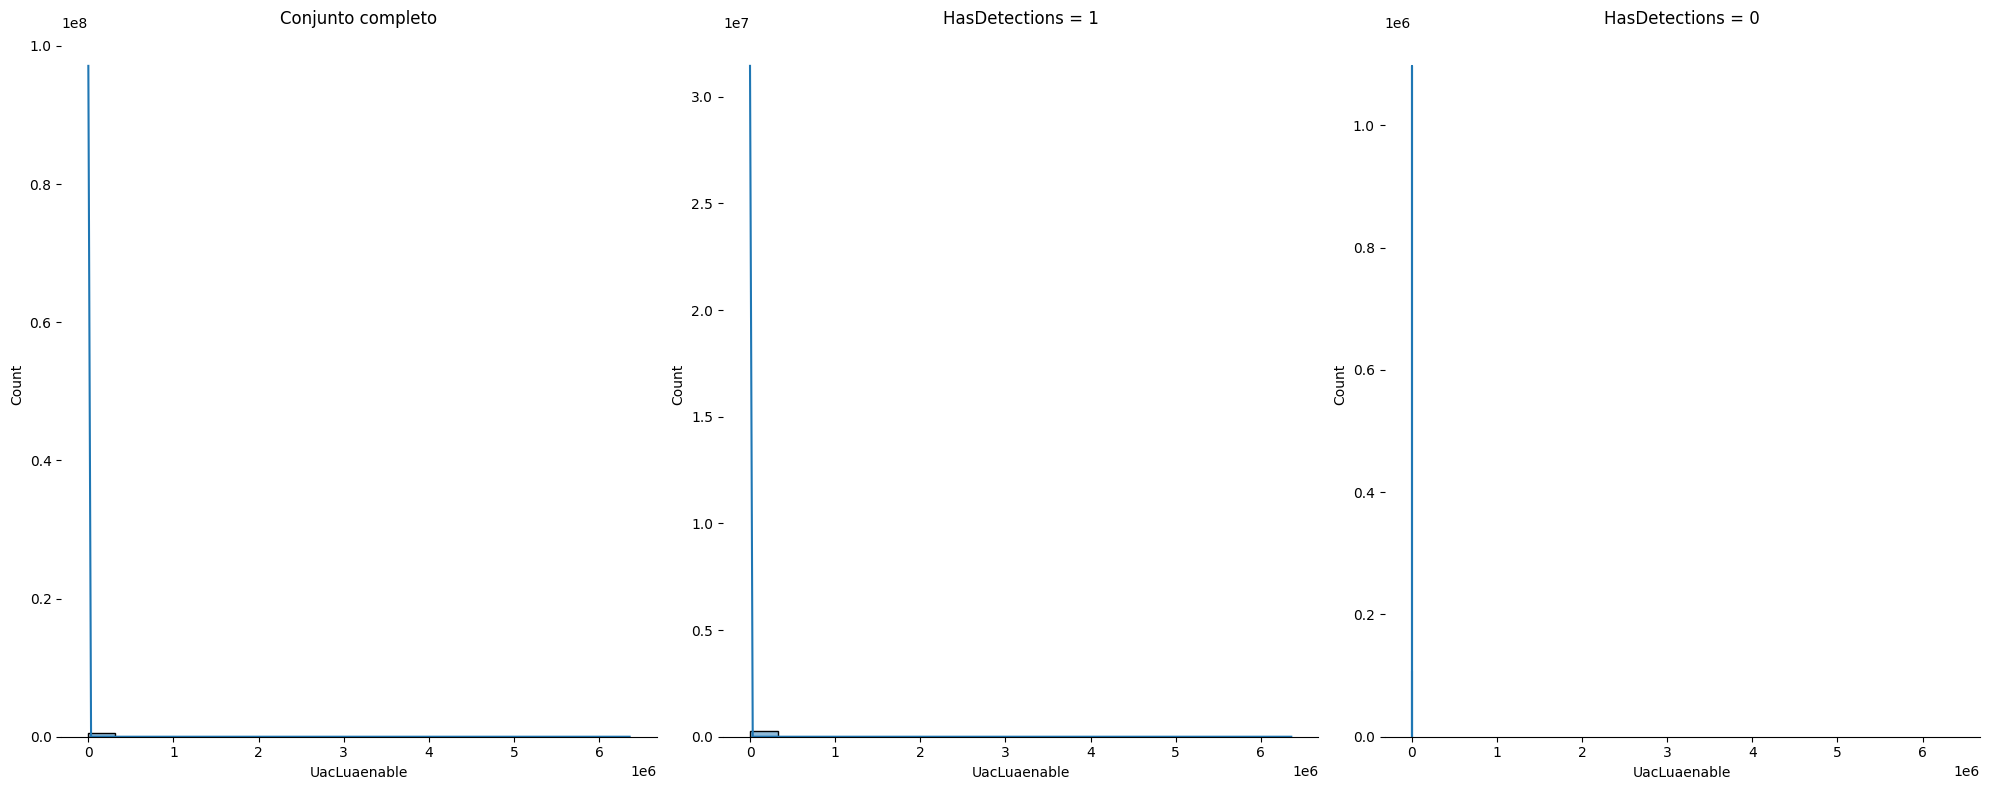

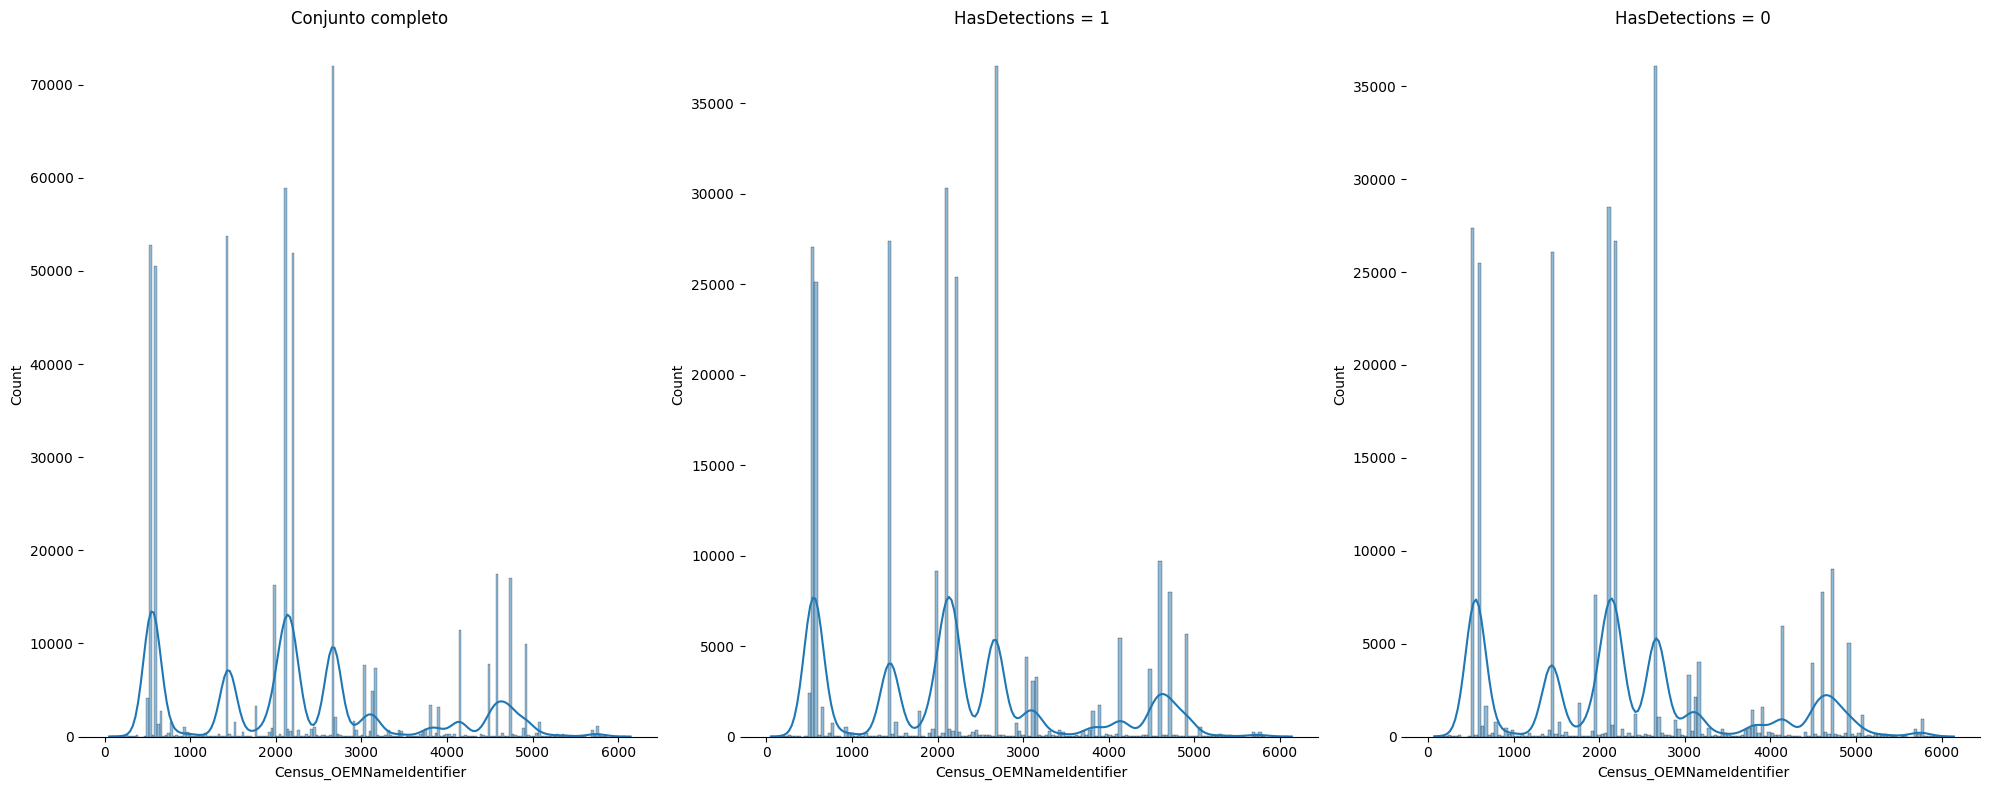

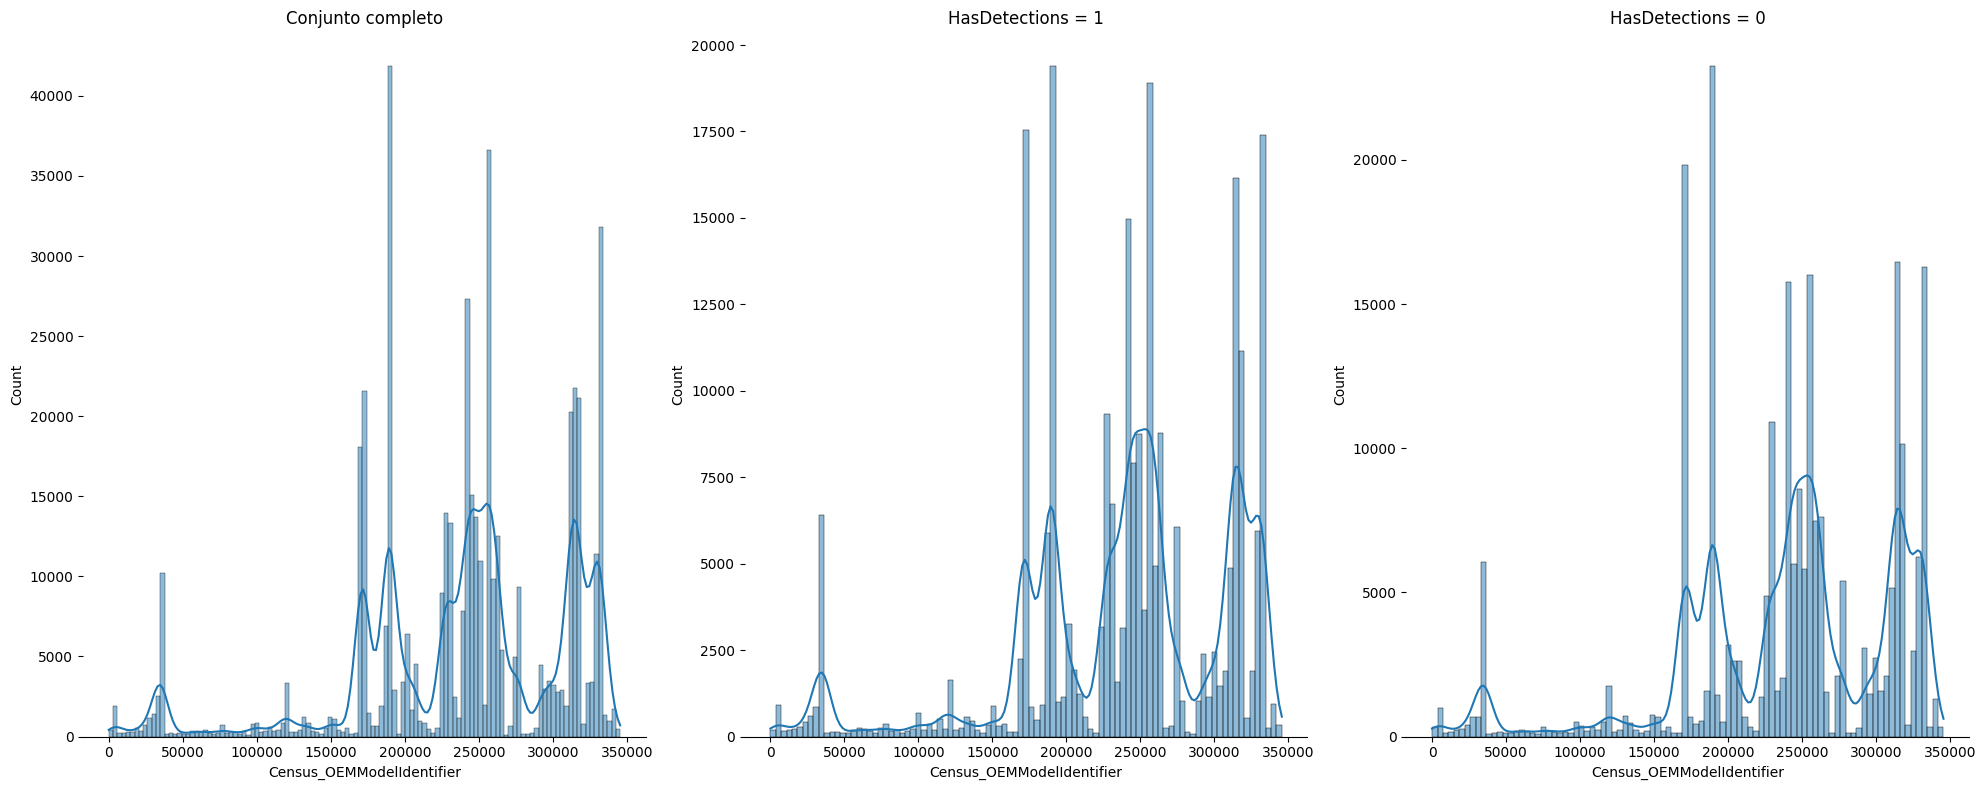

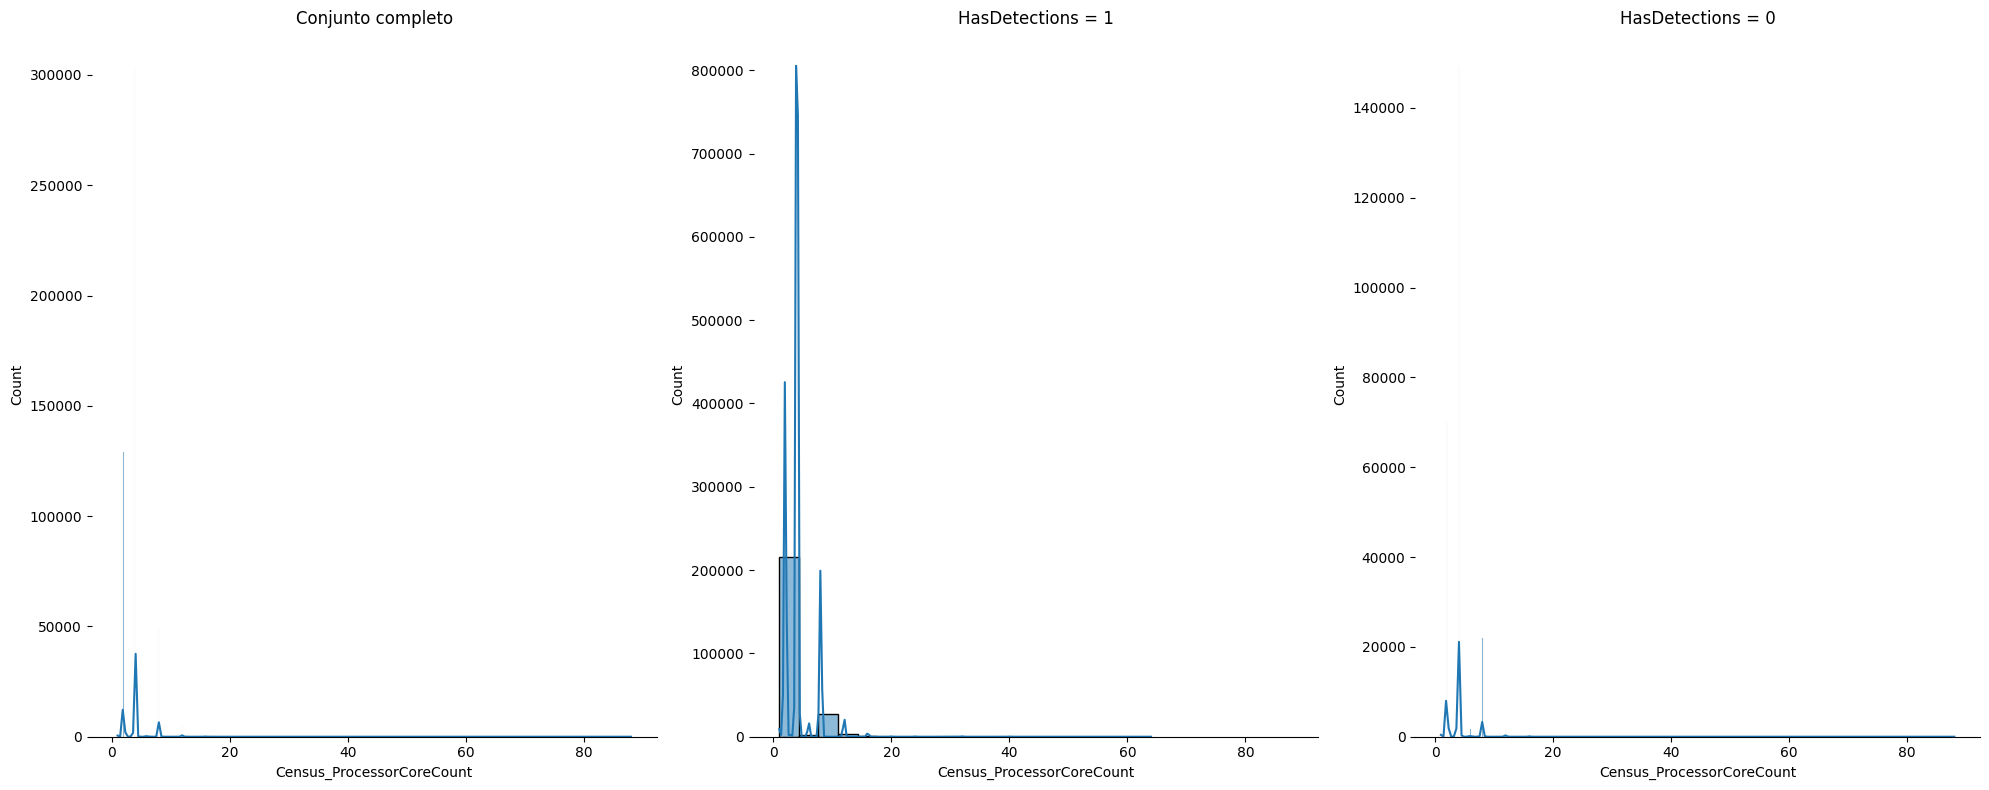

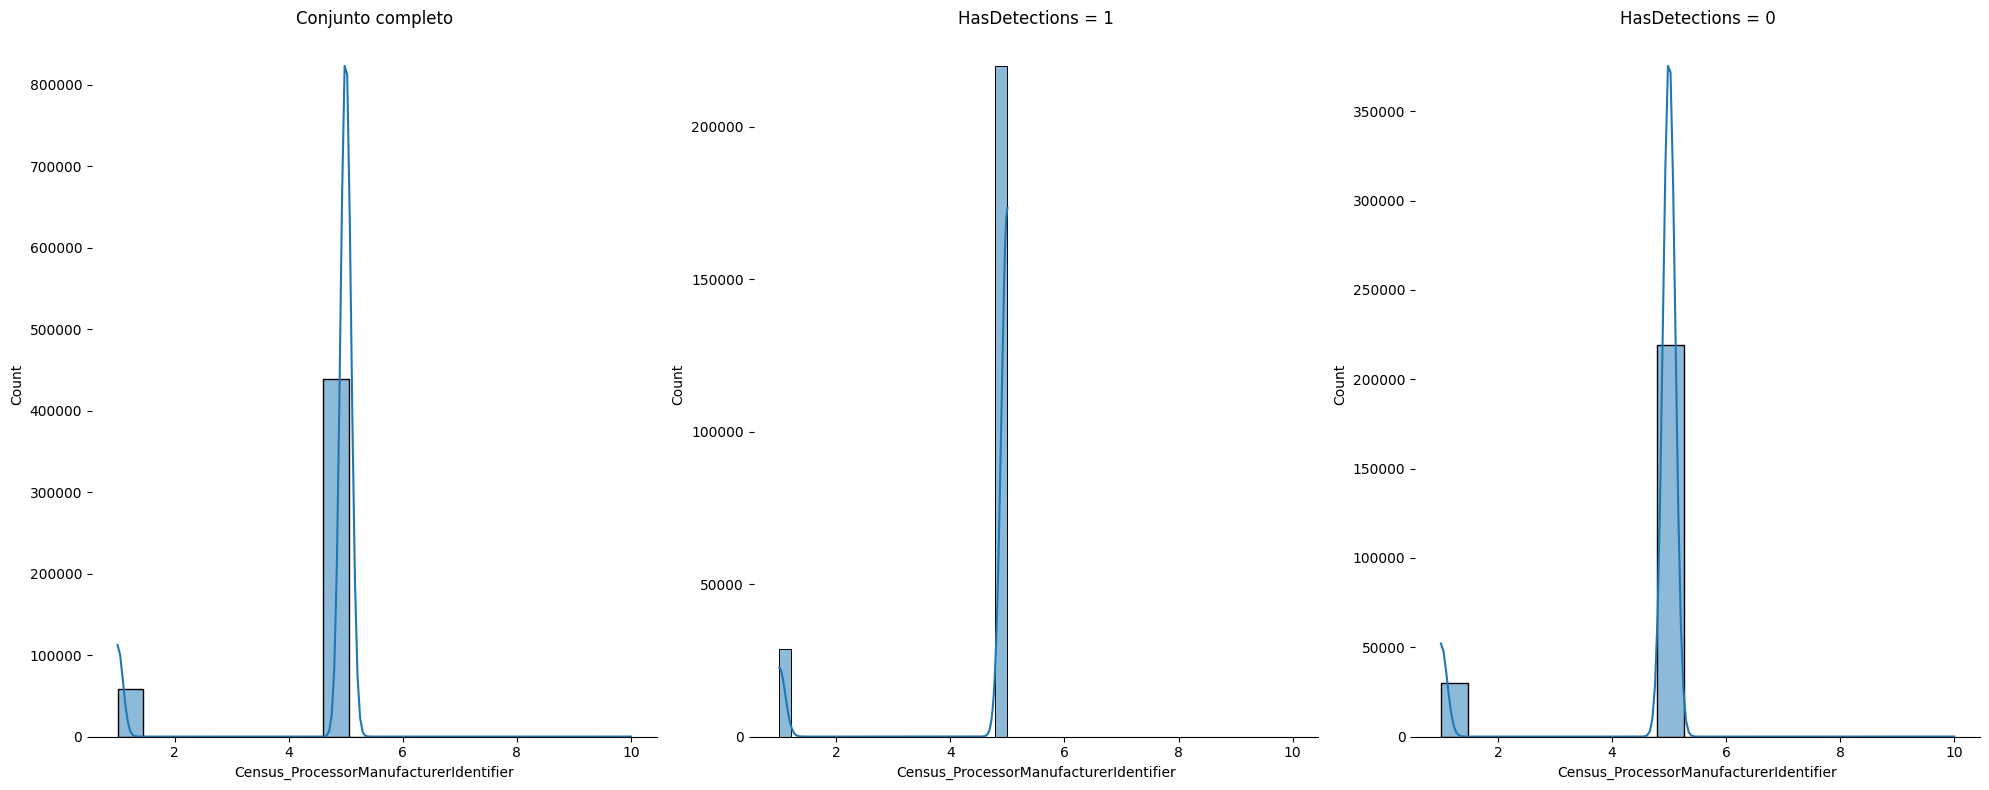

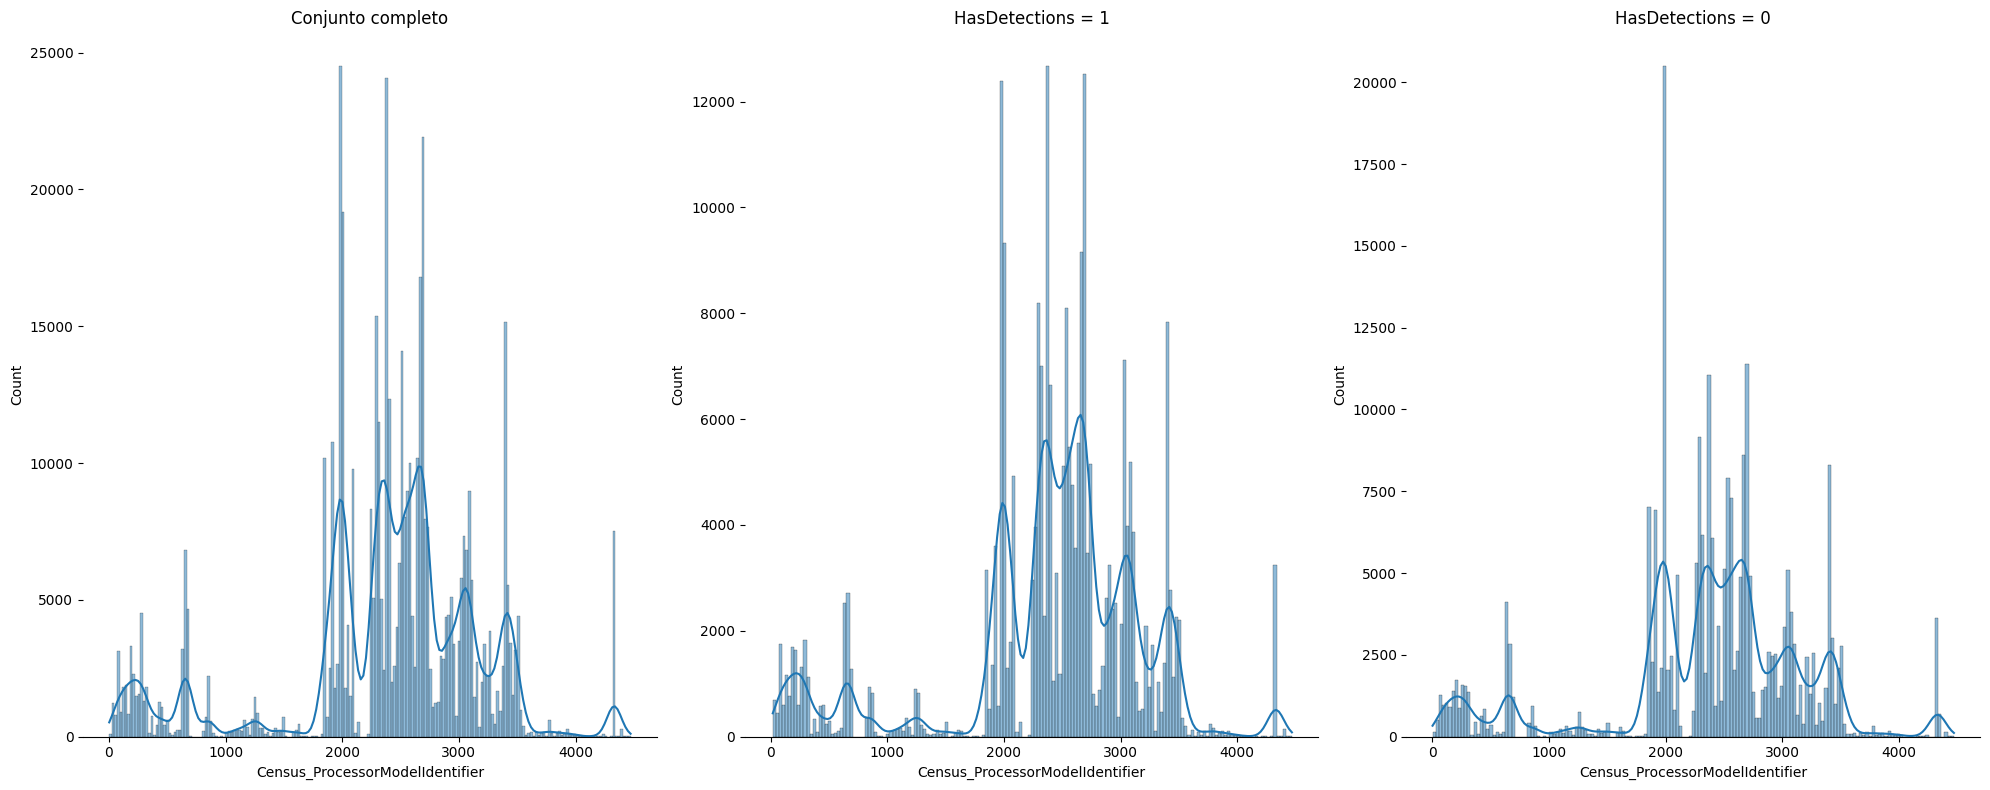

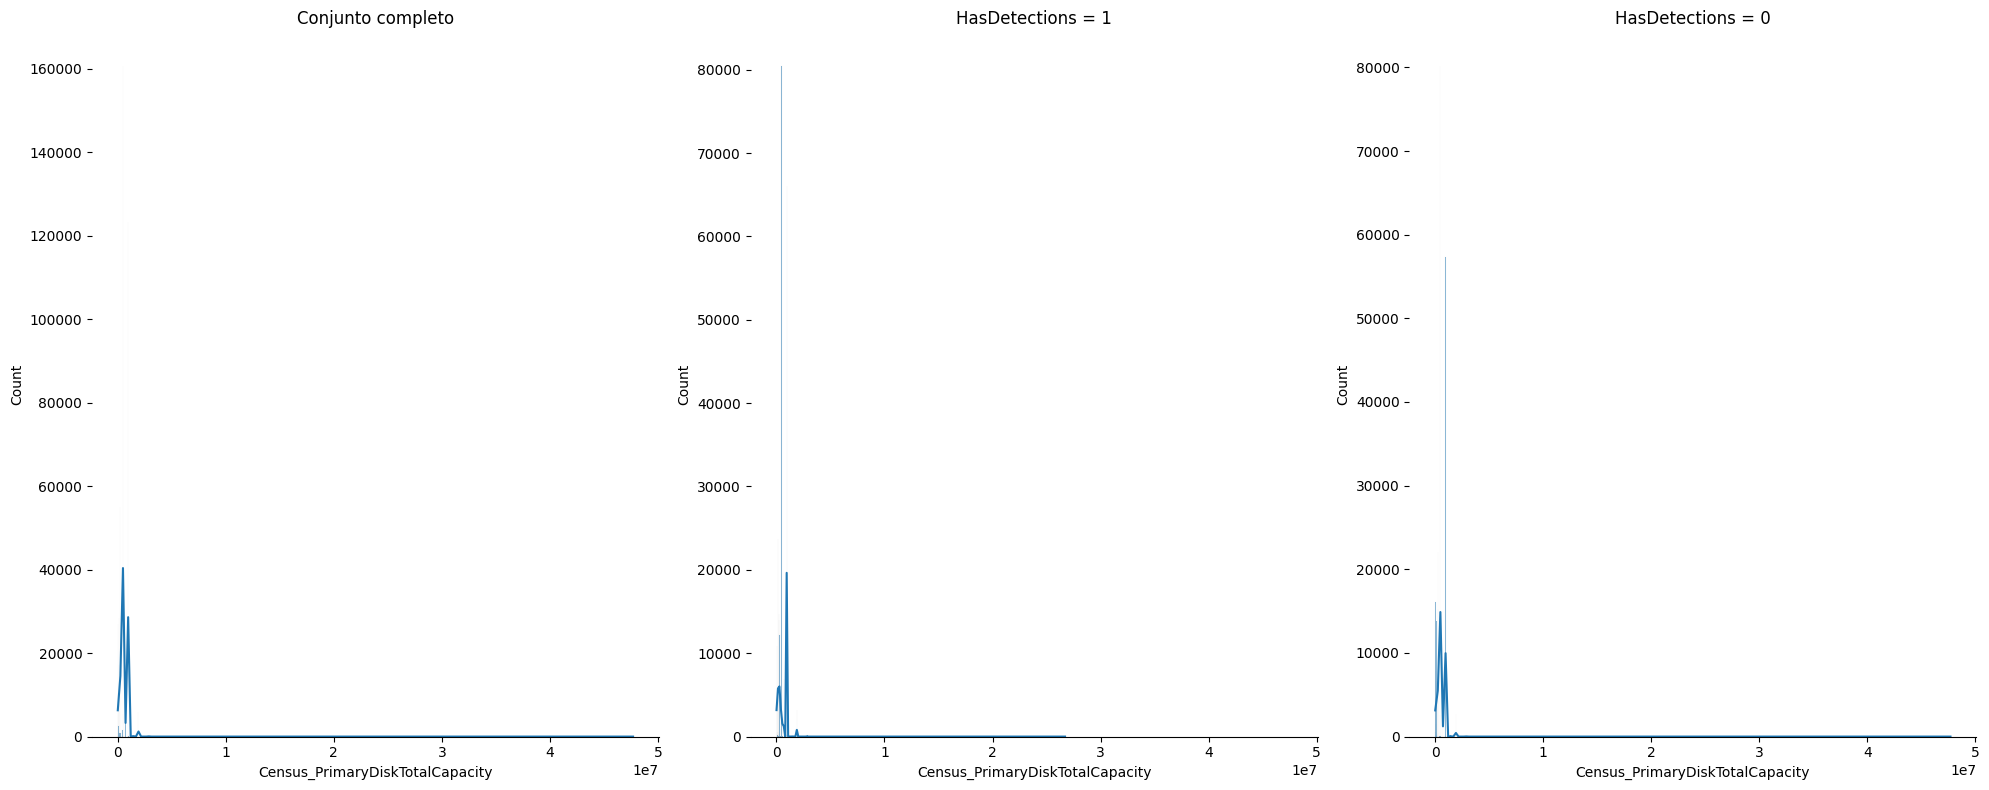

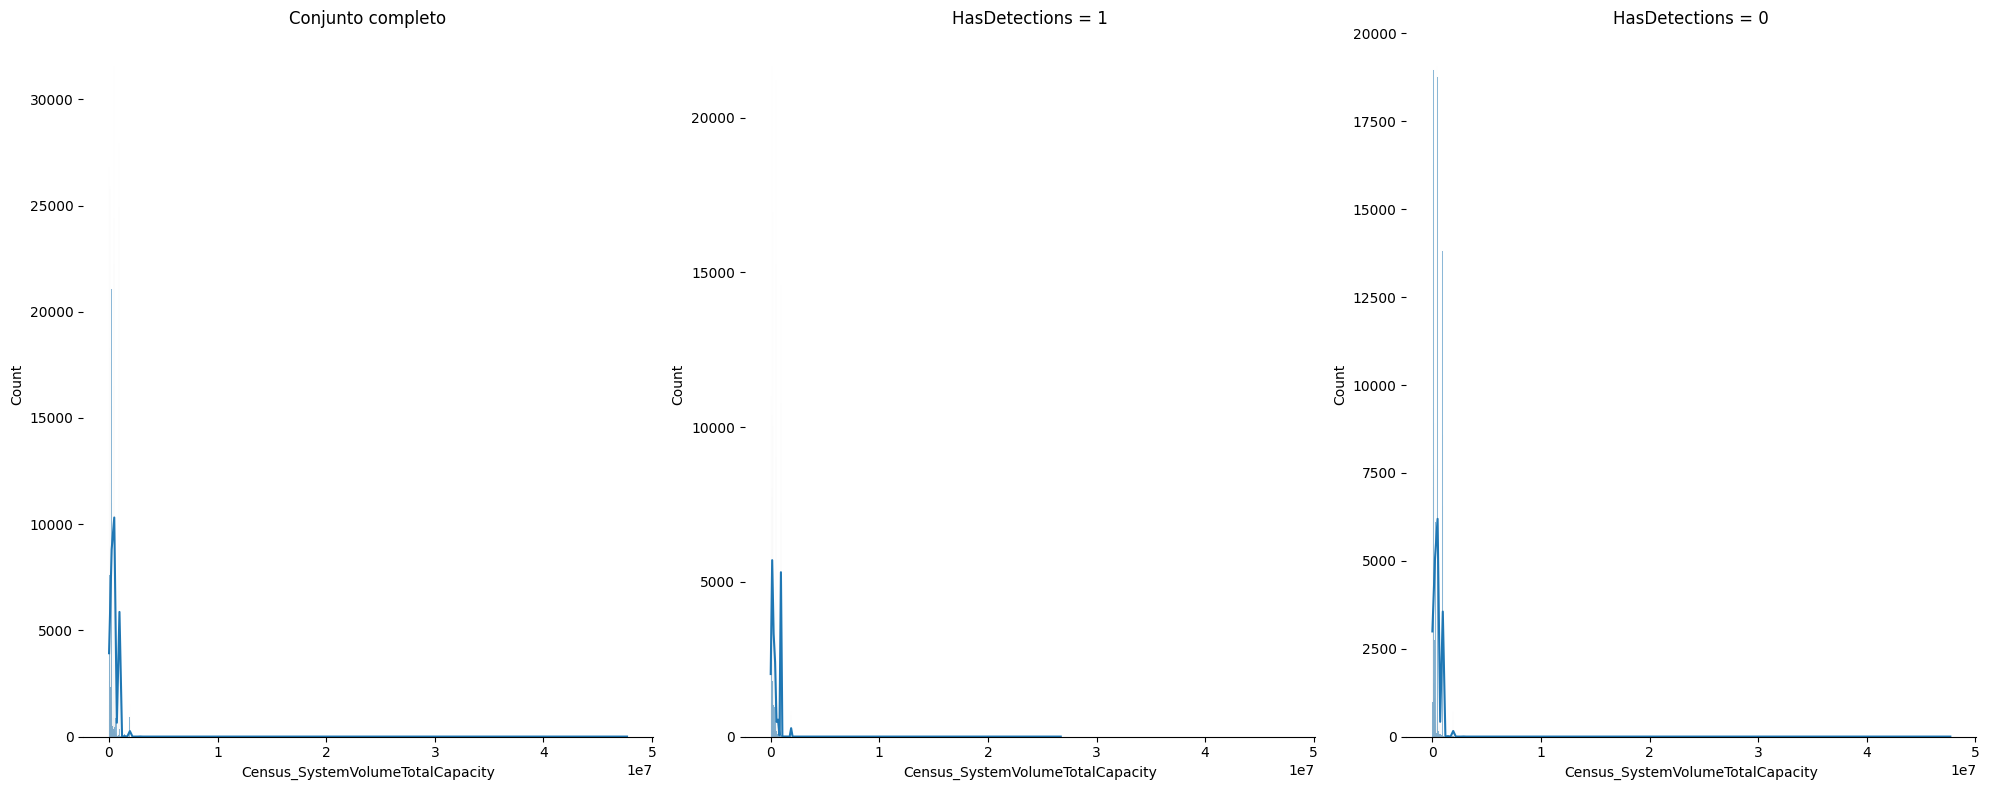

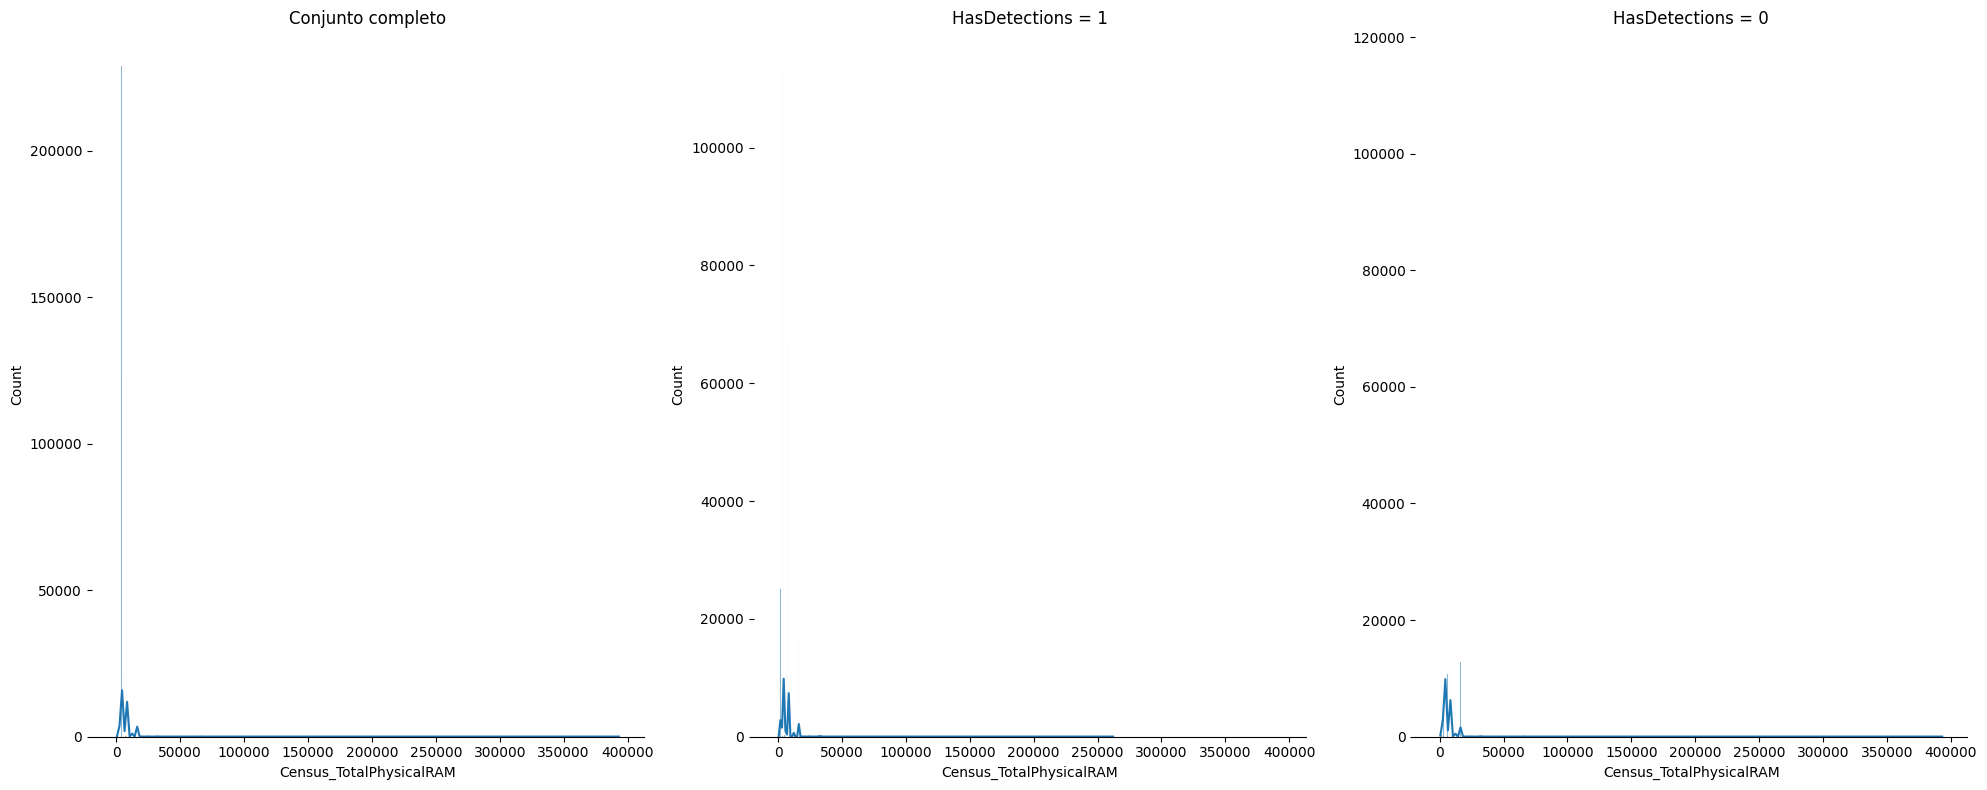

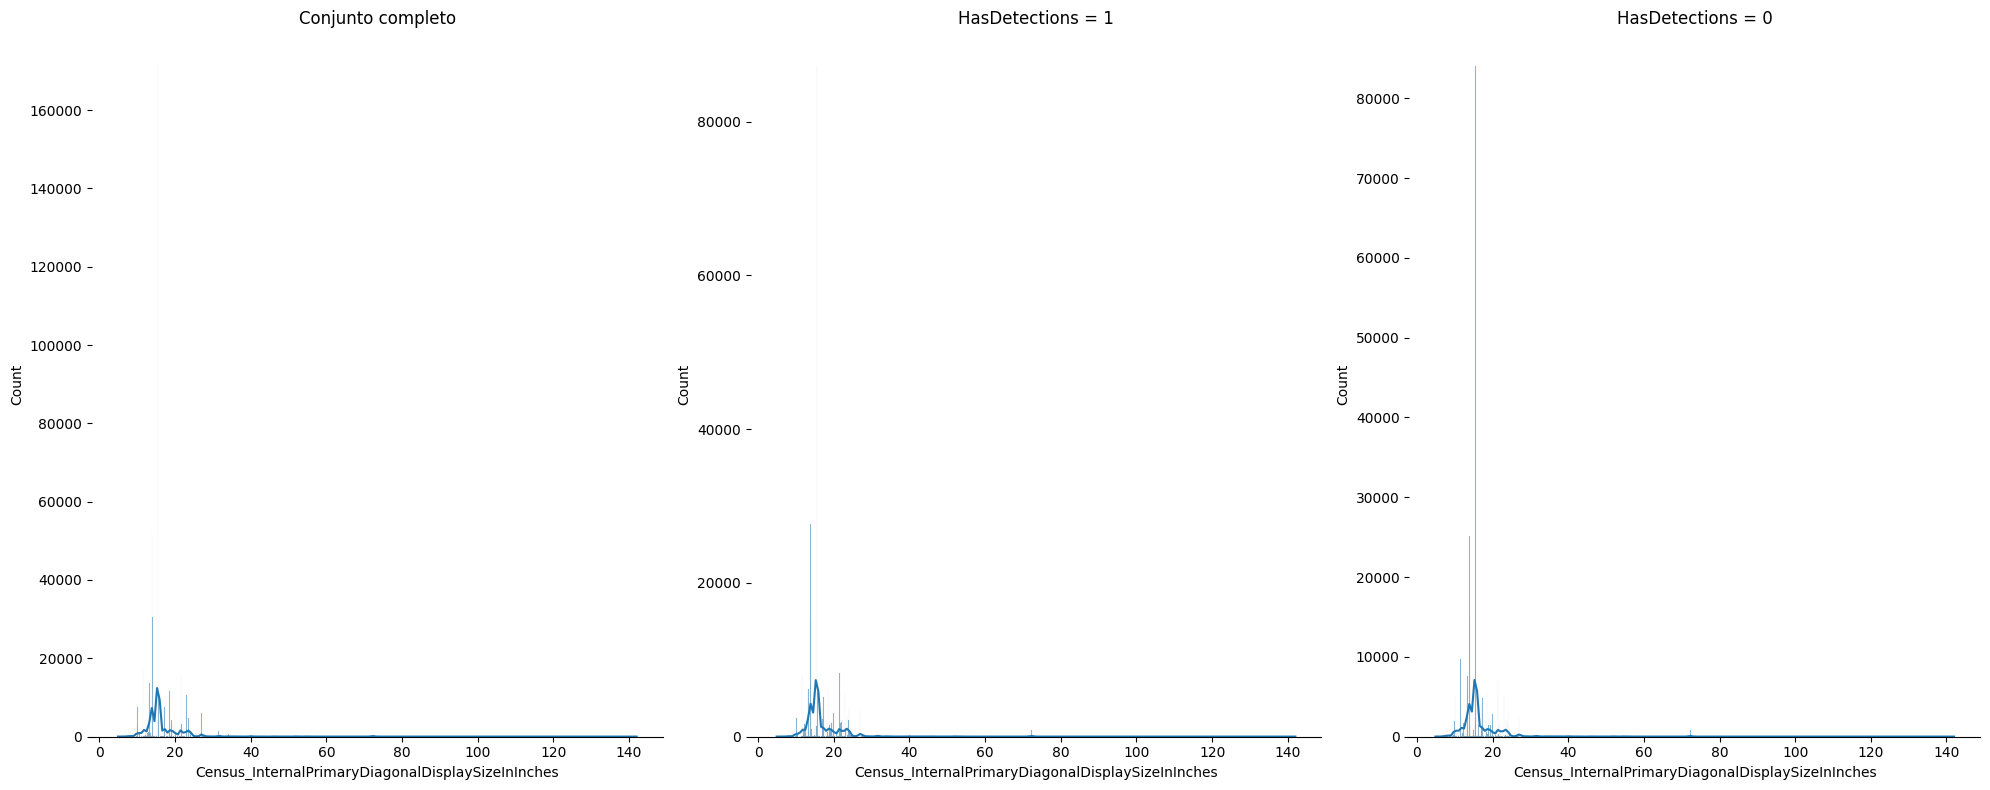

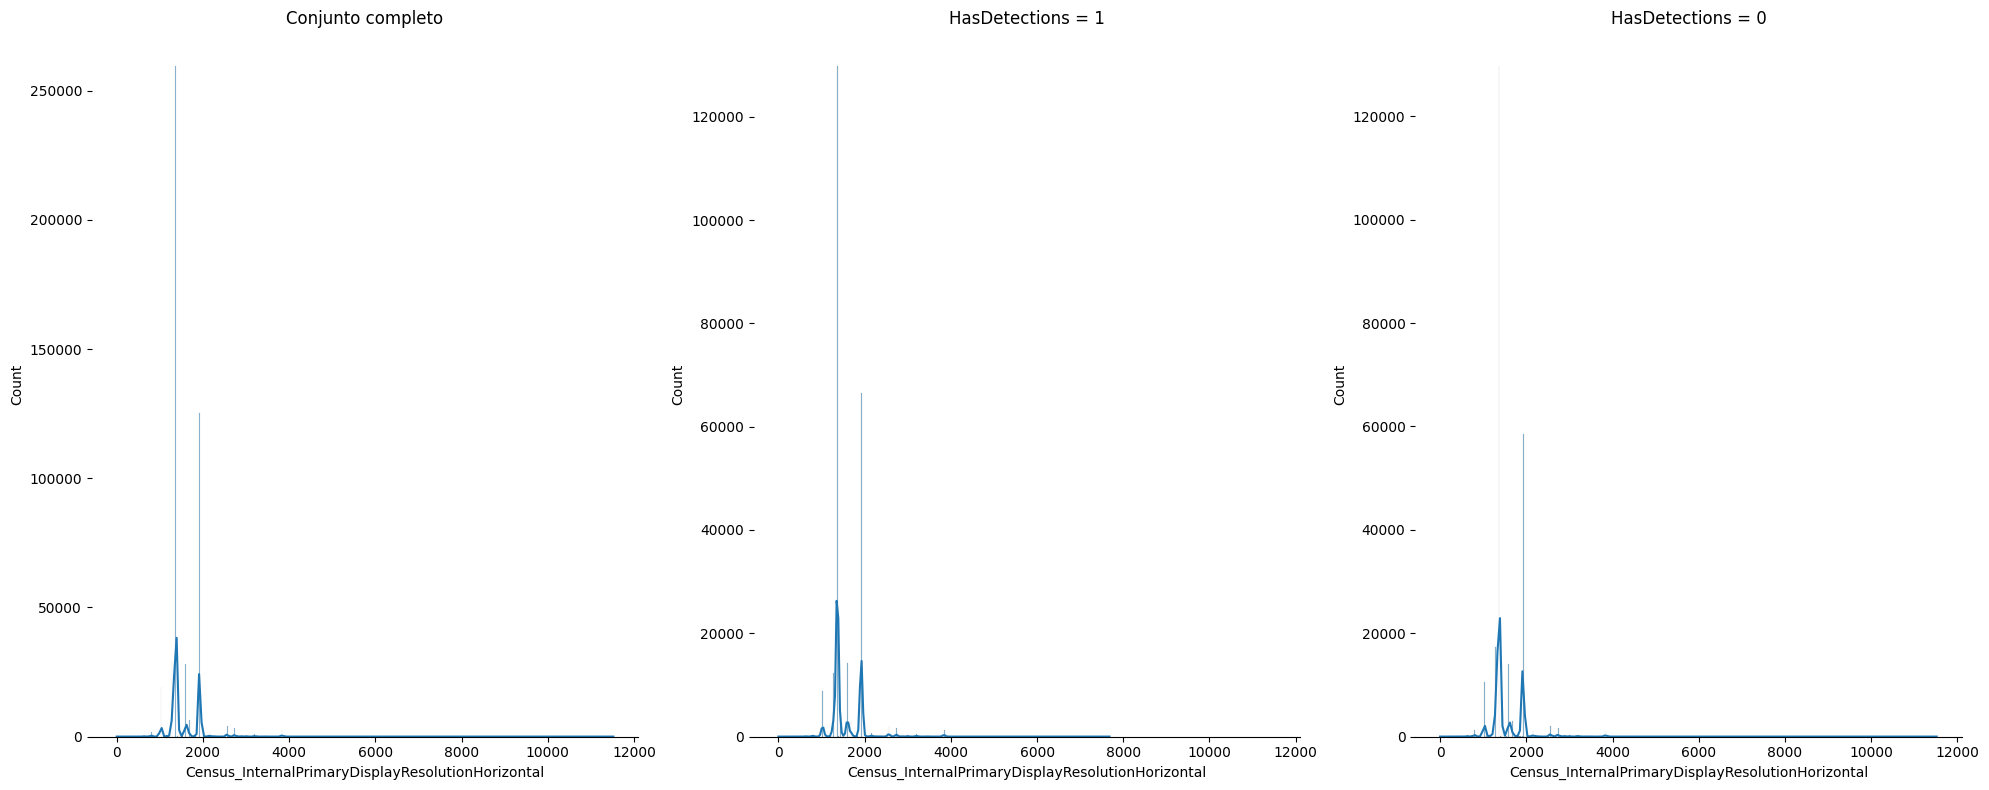

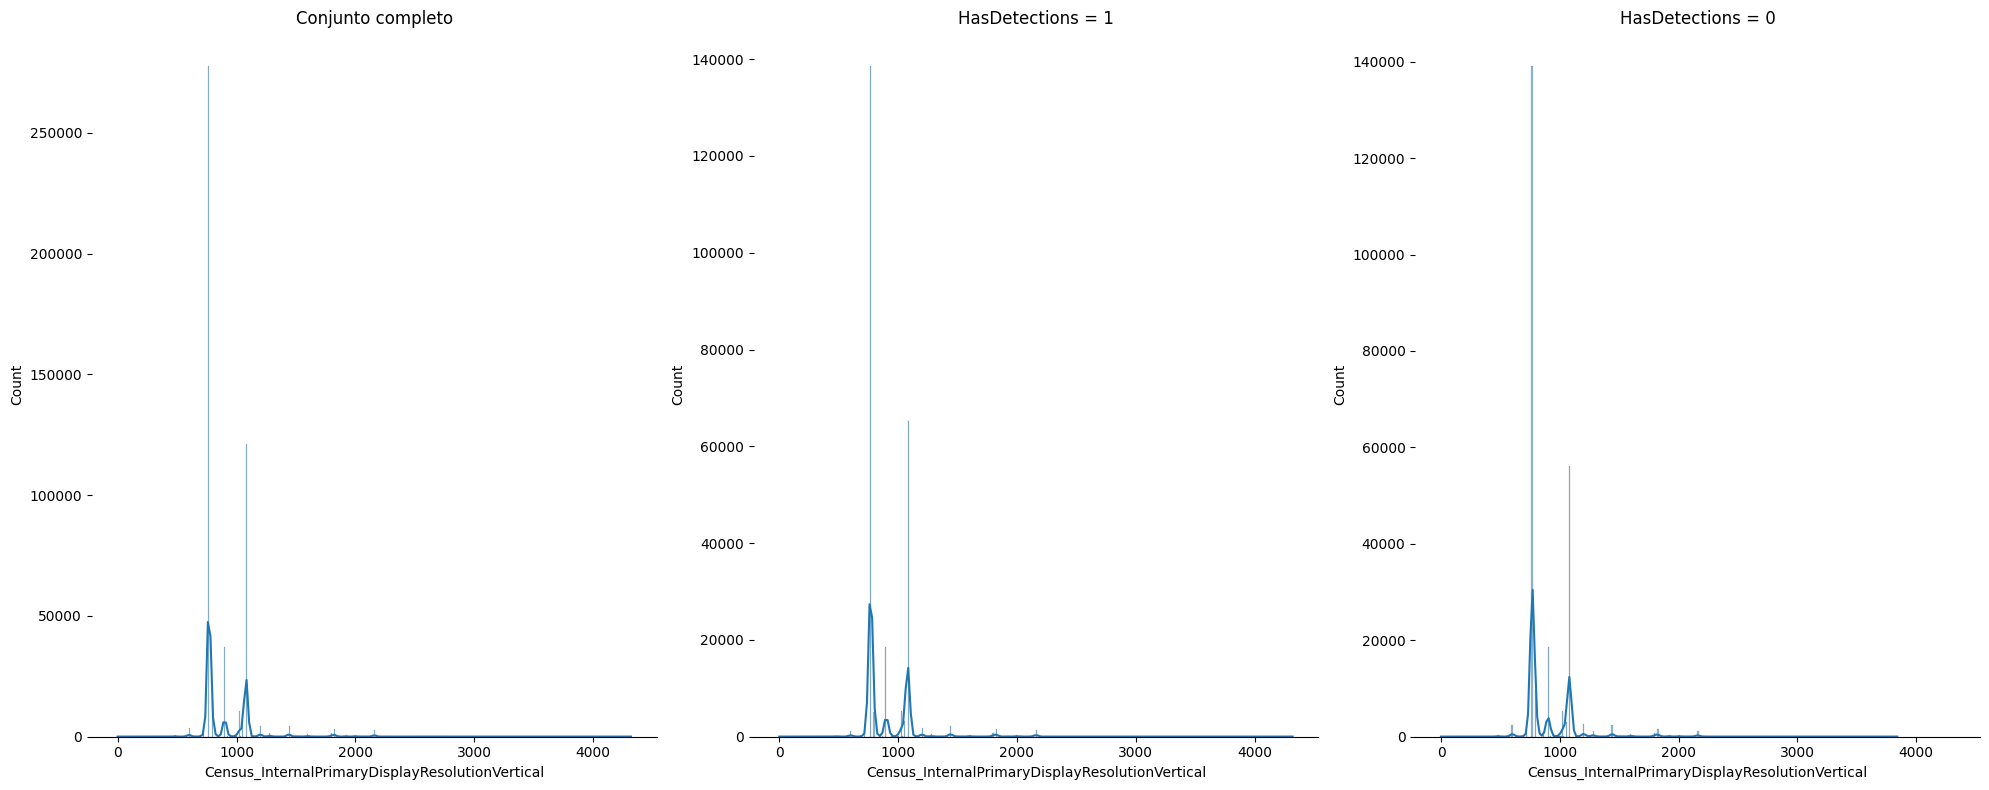

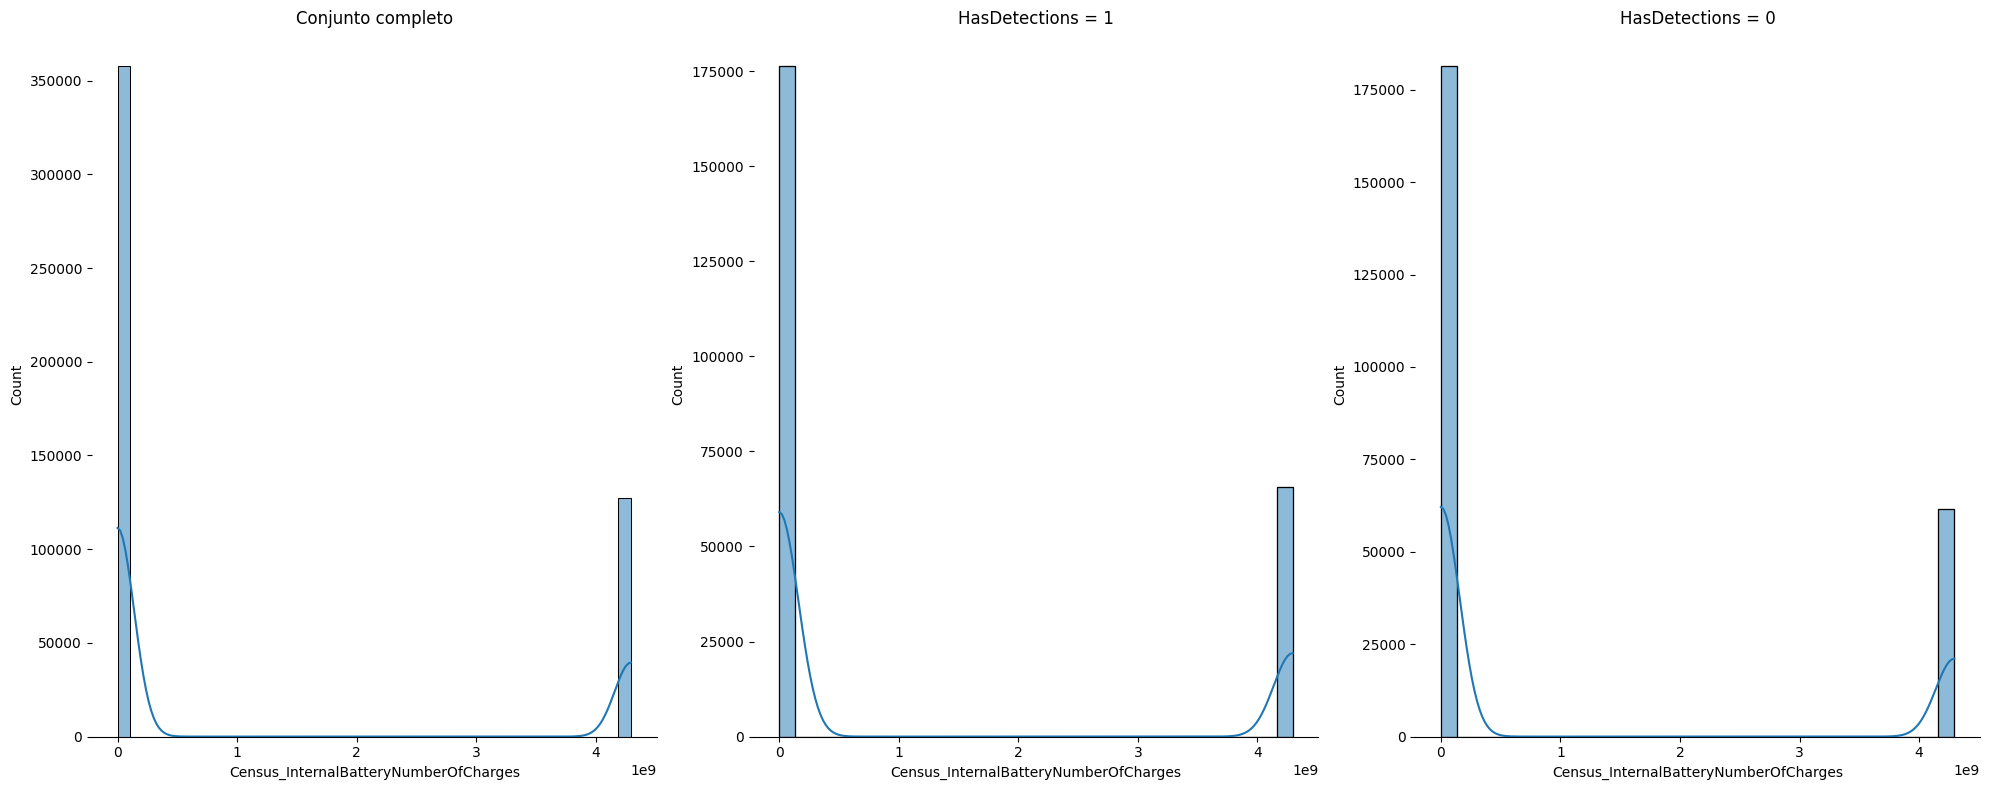

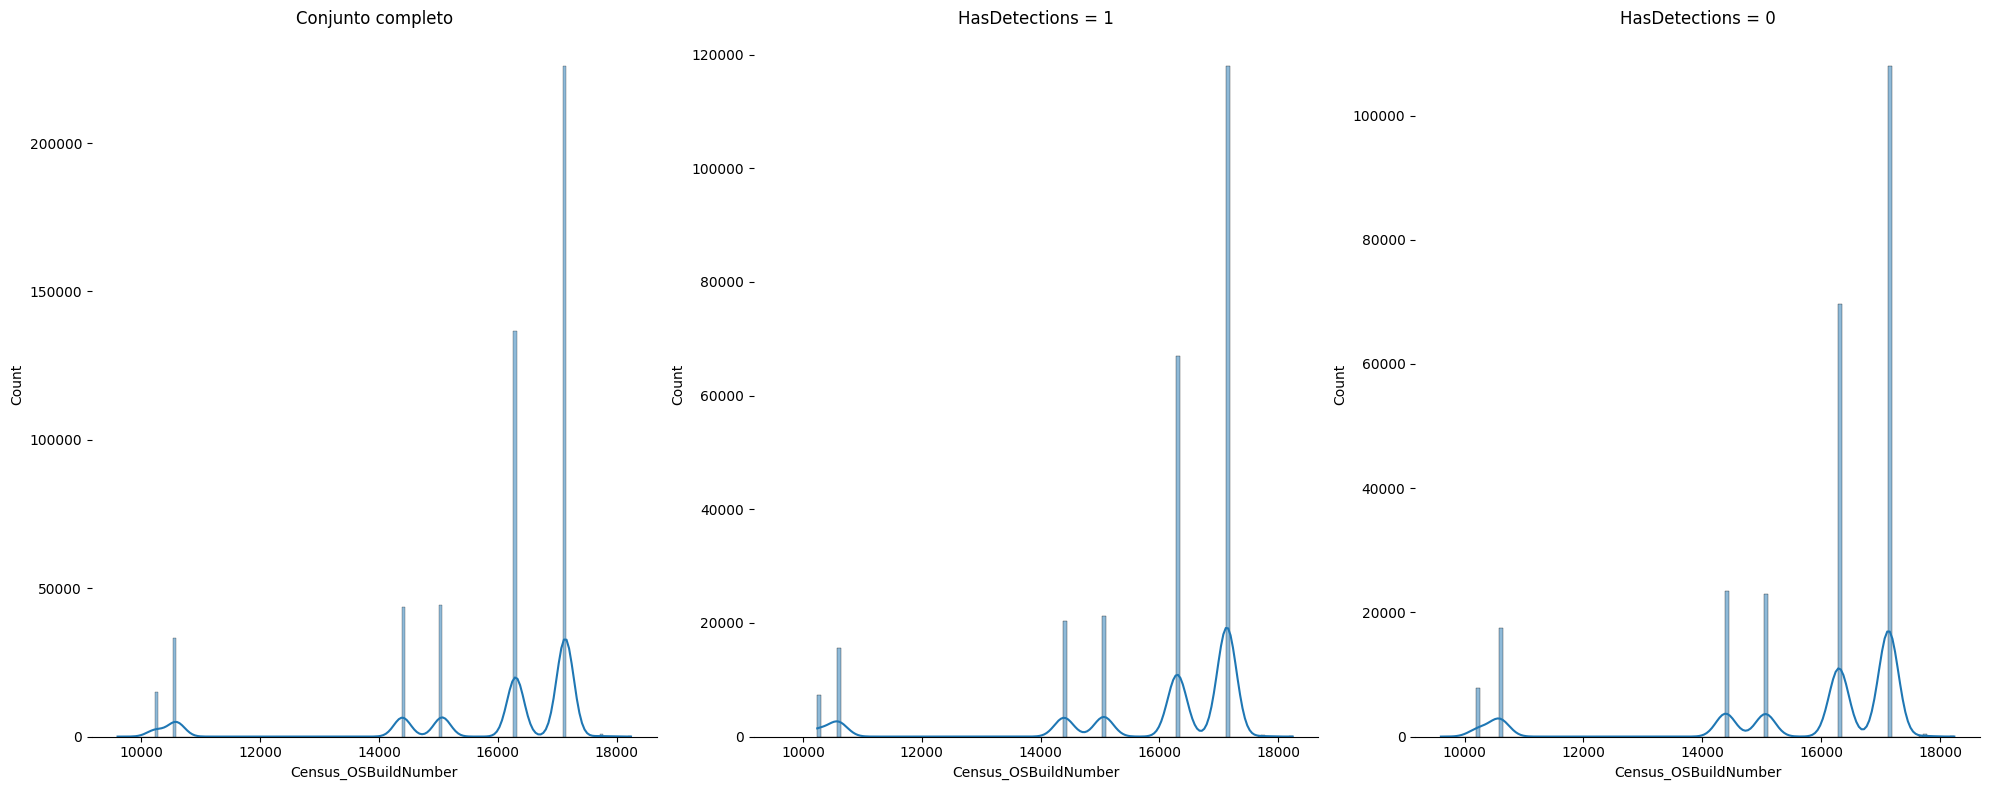

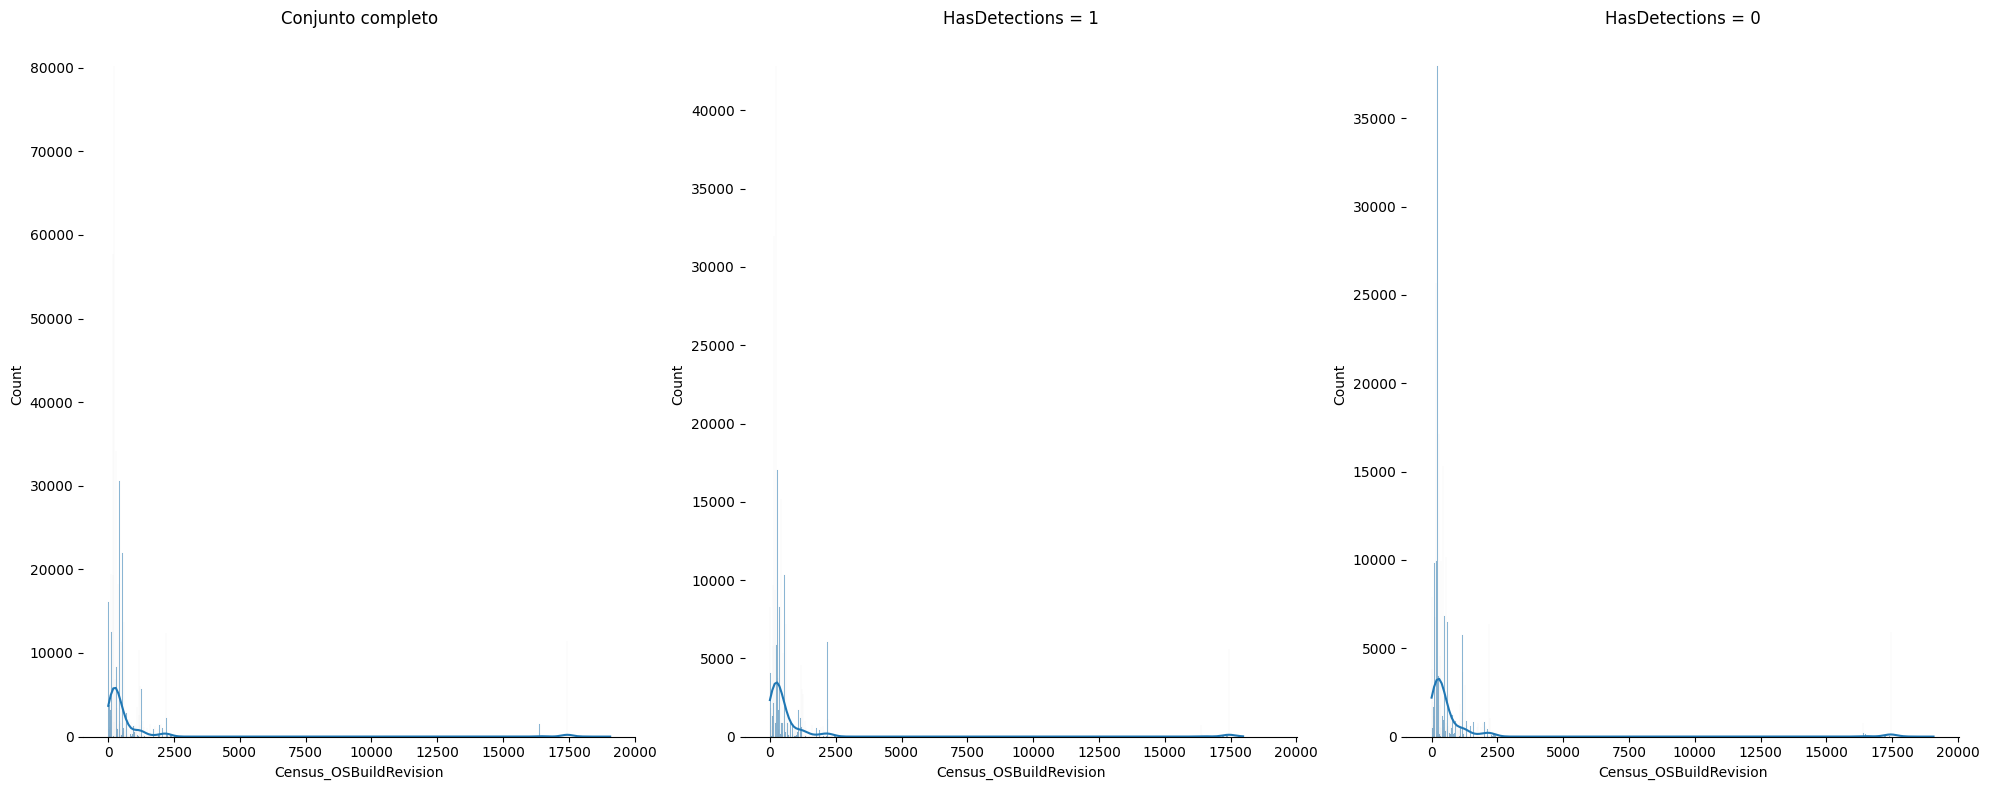

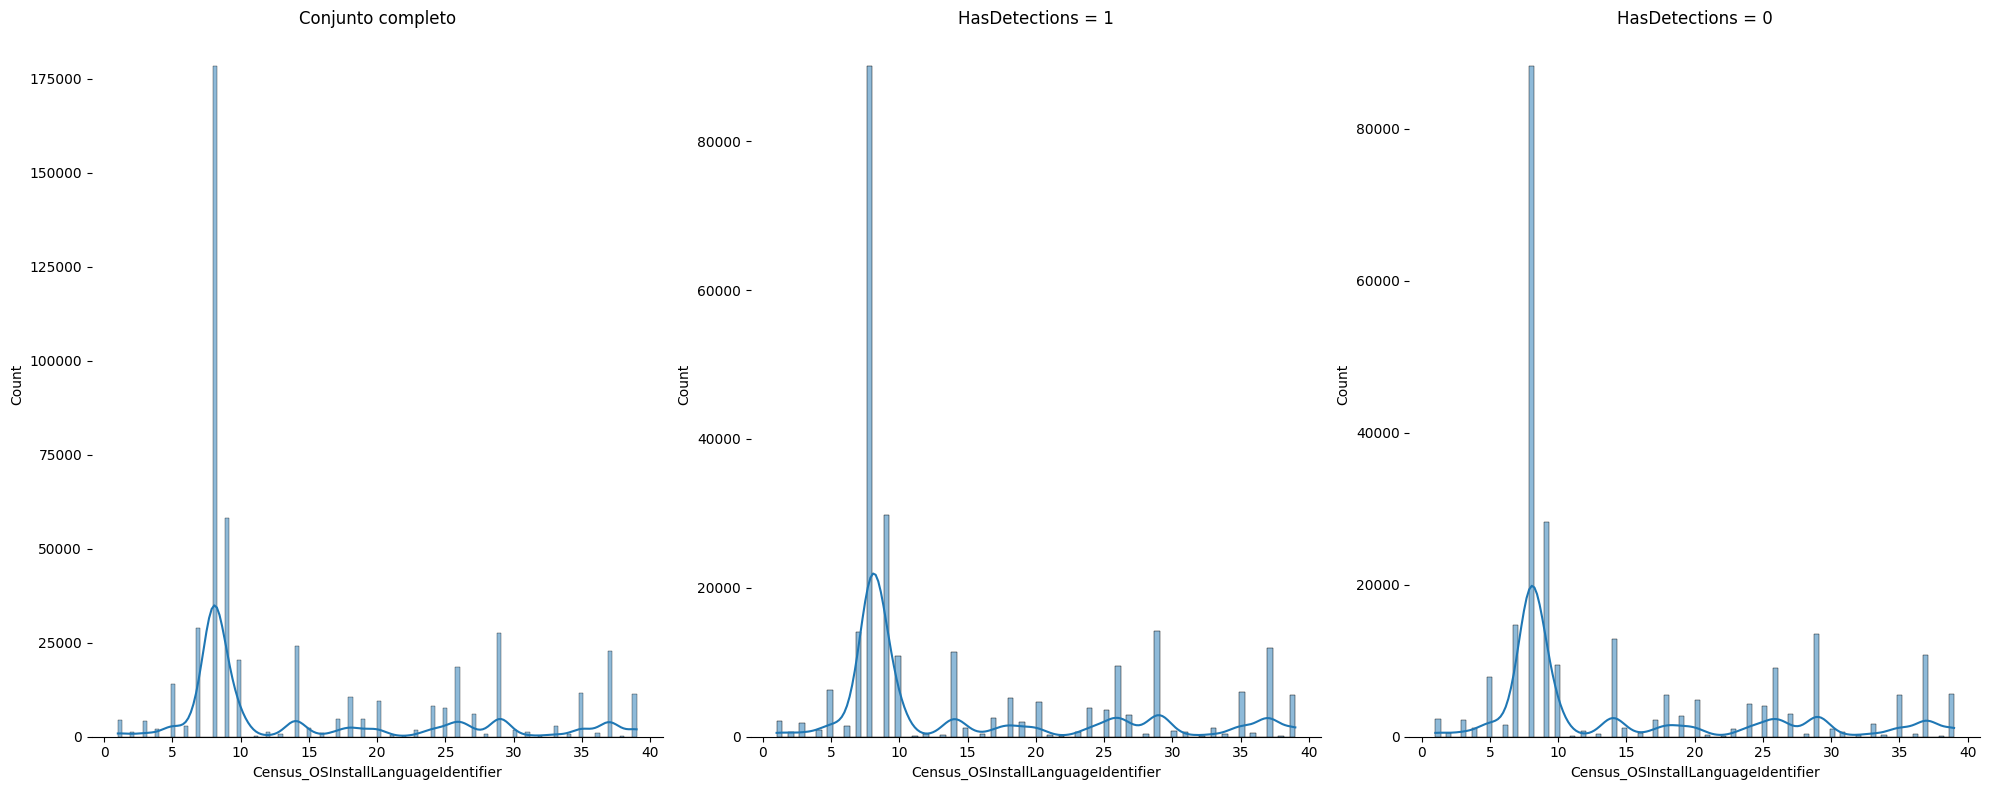

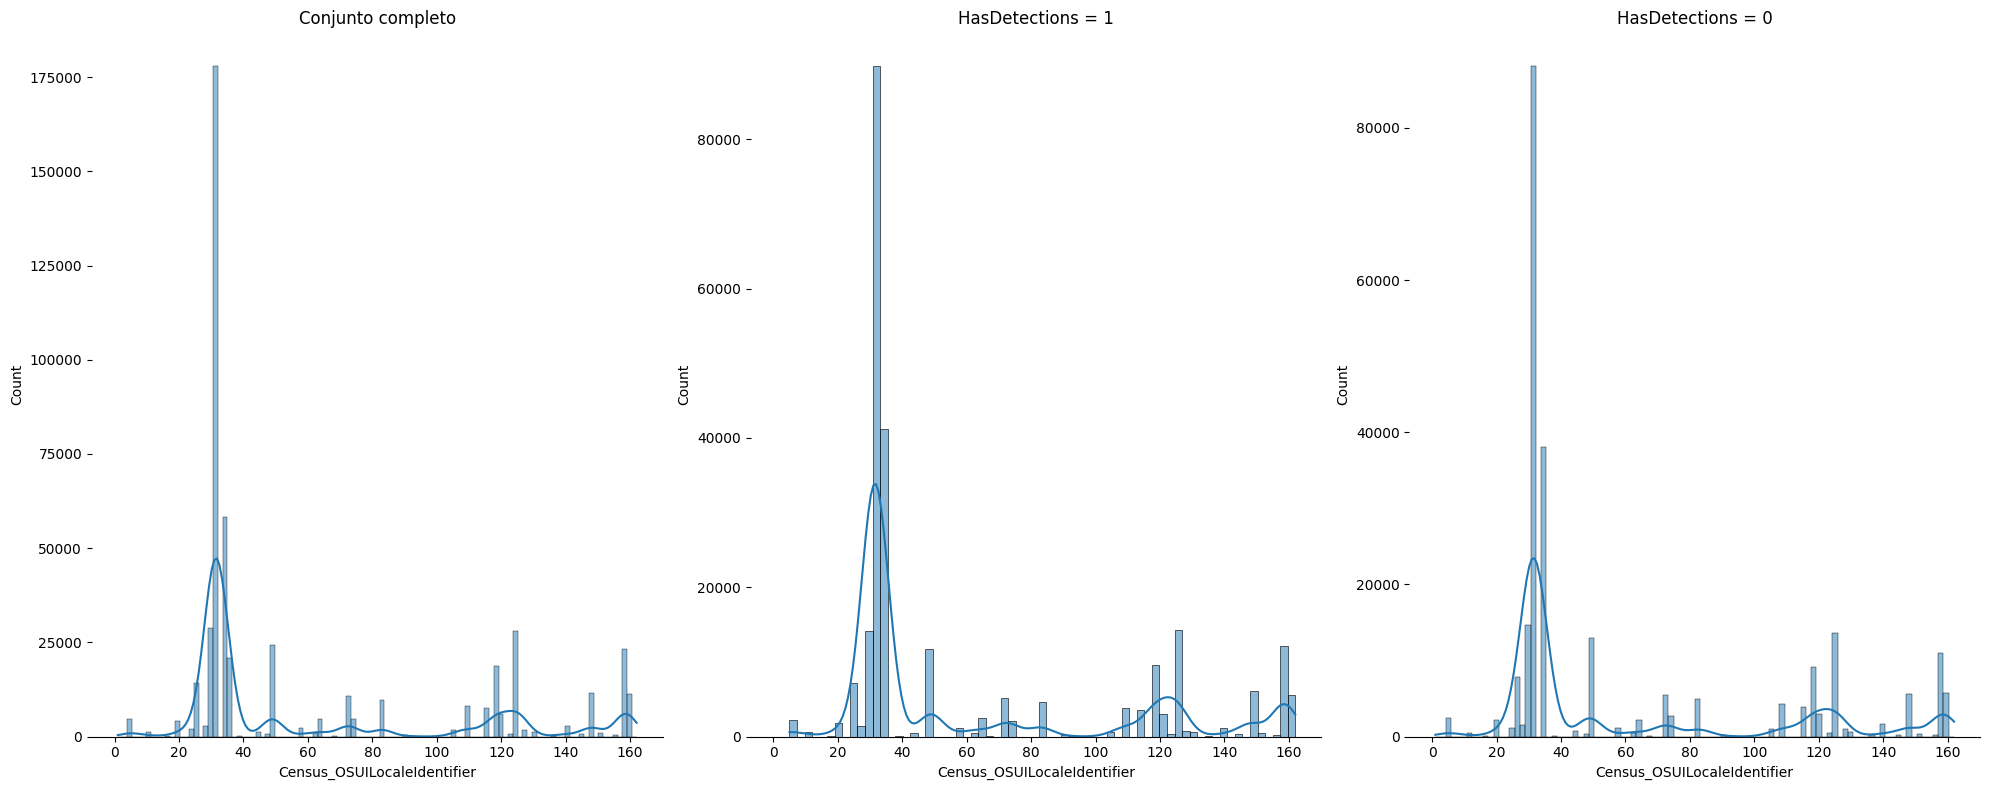

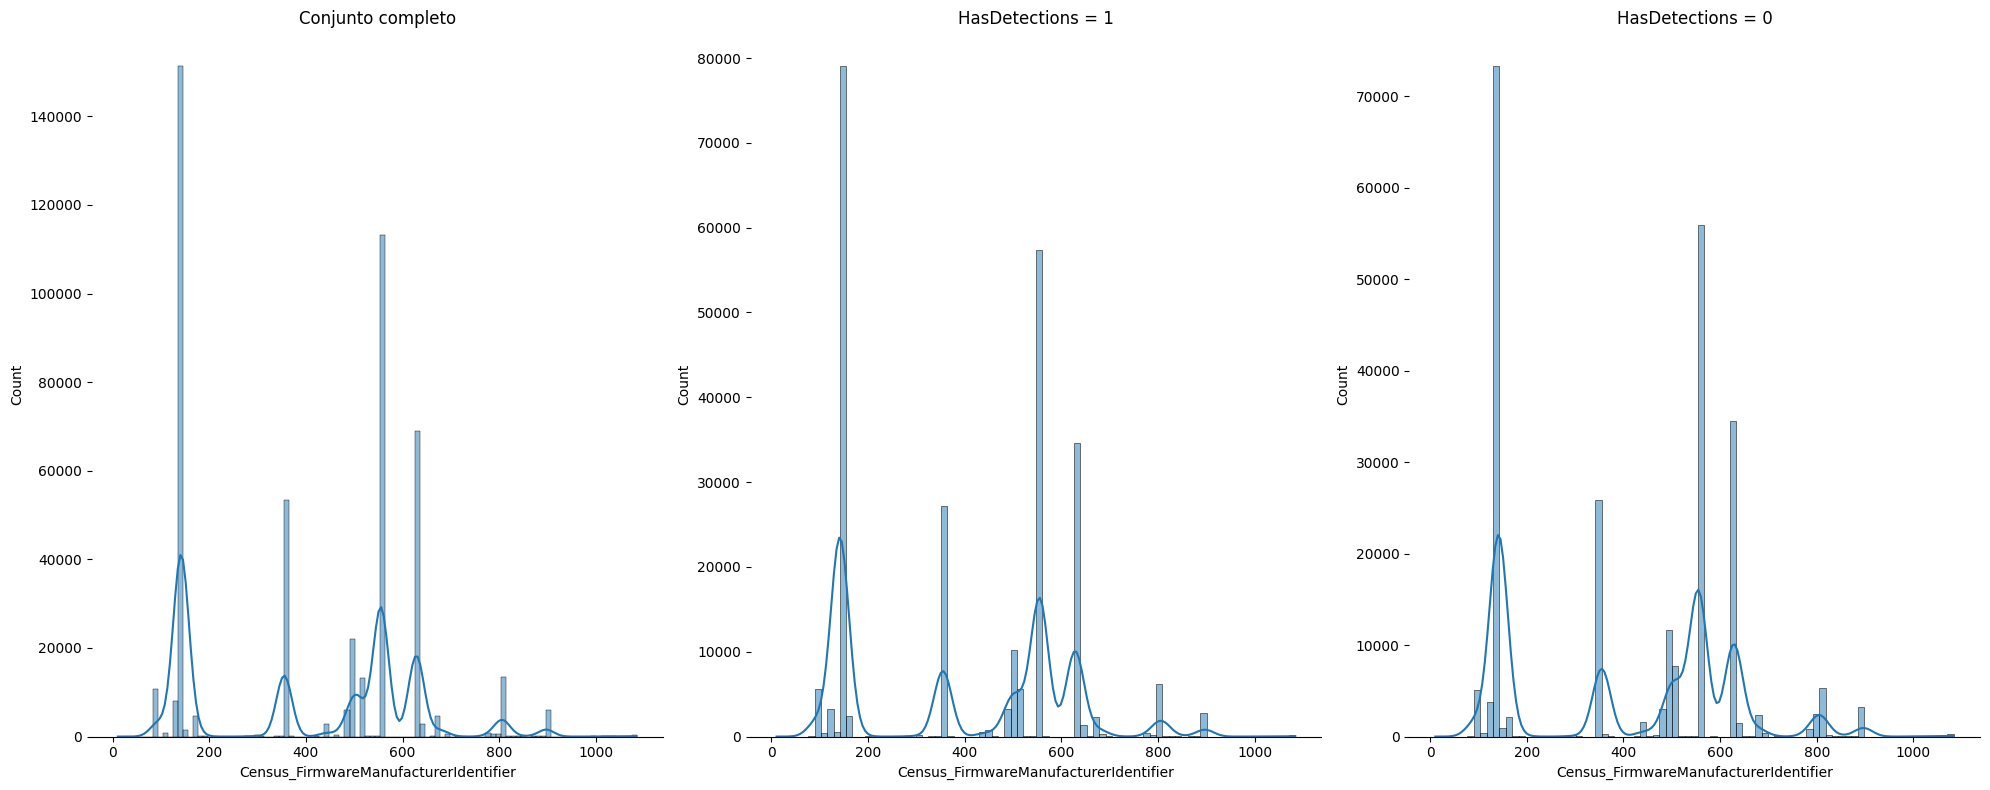

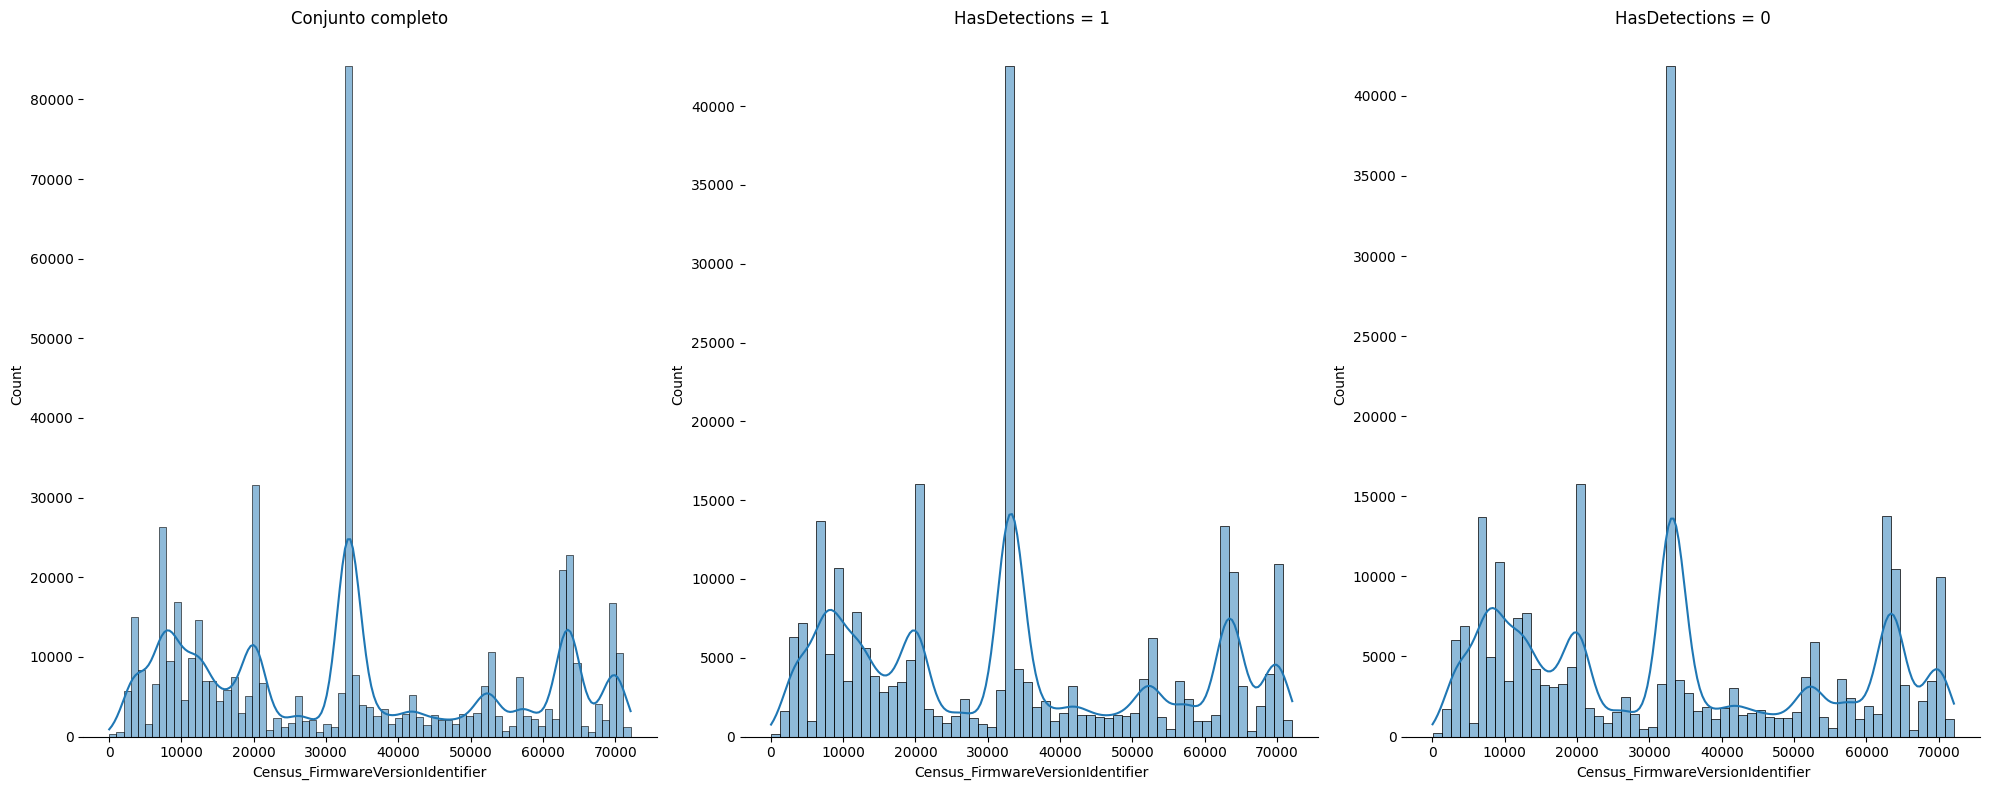

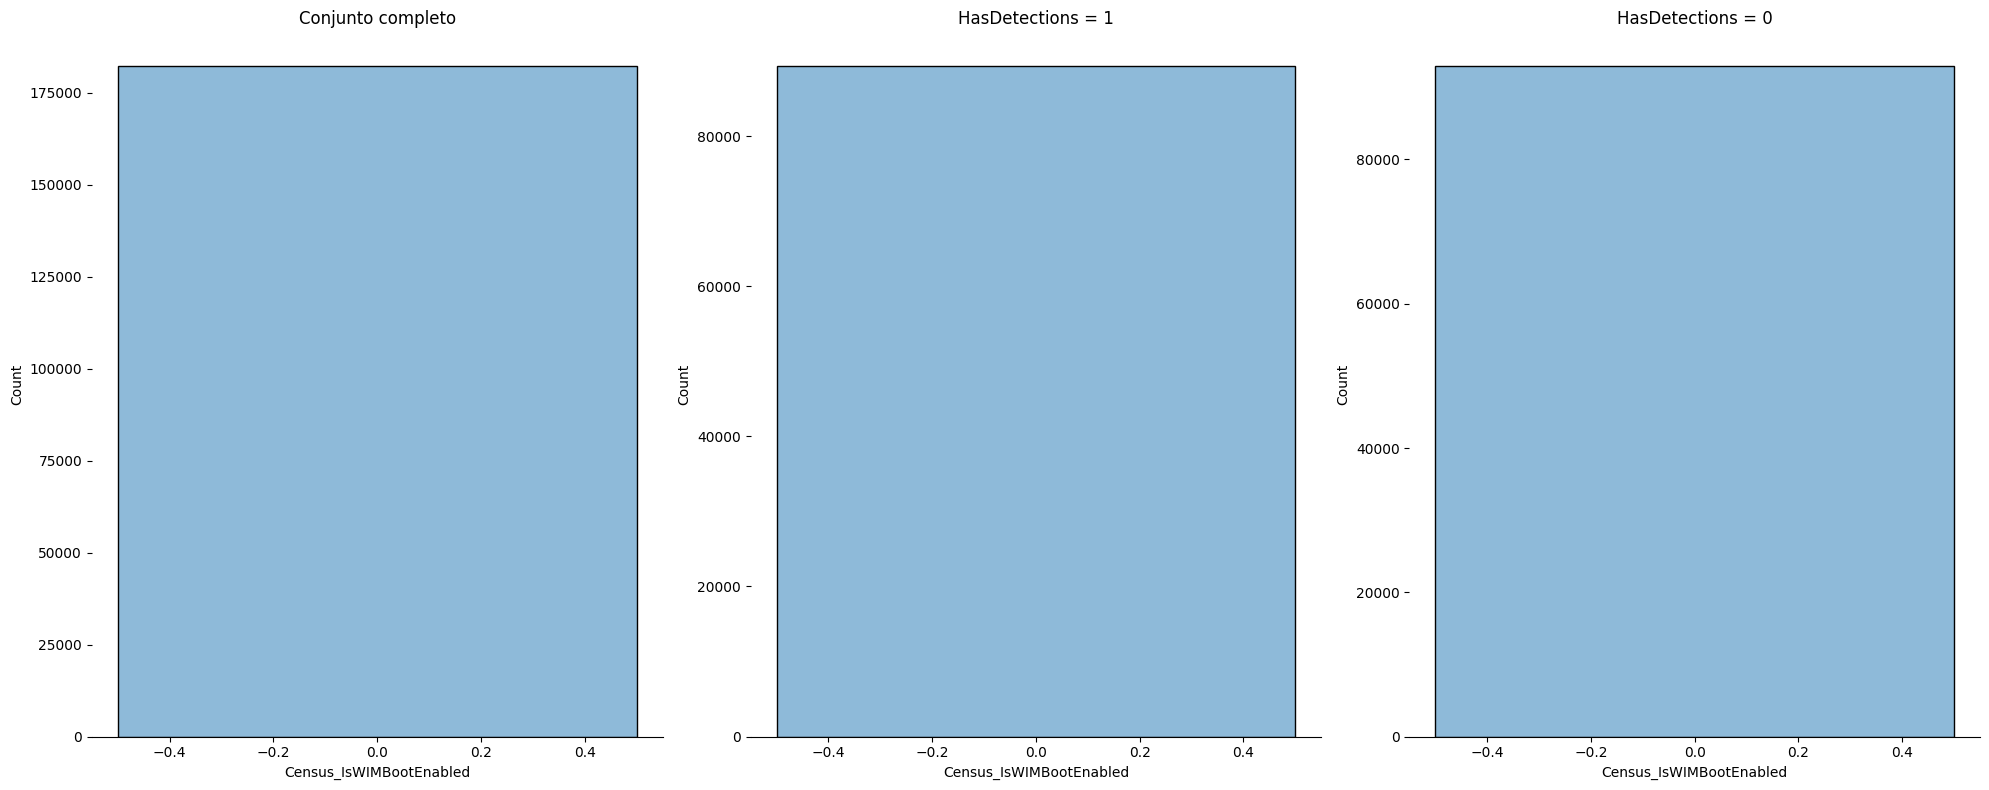

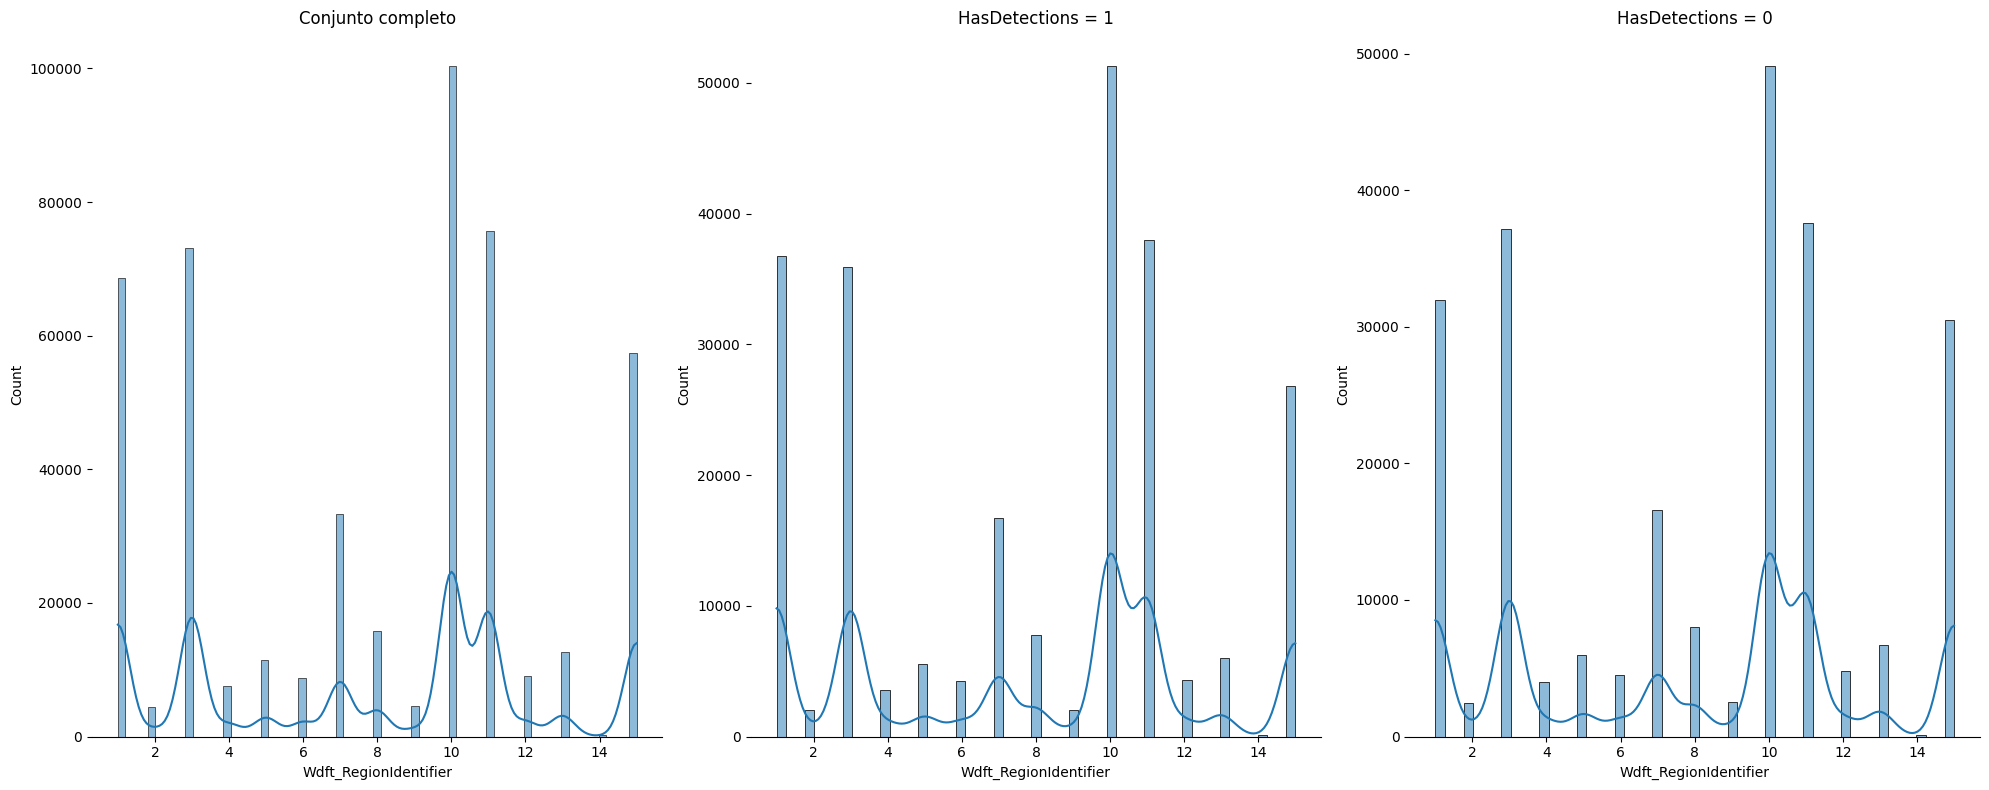

In [16]:
def plot_distribution():
    for caracteristica in columnas_numericas:
        f, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True)
        
        # Histograma para el conjunto completo
        sns.histplot(df[caracteristica], ax=axes[0], kde=True).set_title("Conjunto completo")
        
        # Histograma para HasDetections = 1
        sns.histplot(df[df[TARGET] == 1][caracteristica], ax=axes[1], kde=True).set_title(f"{TARGET} = 1")
        
        # Histograma para HasDetections = 0
        sns.histplot(df[df[TARGET] == 0][caracteristica], ax=axes[2], kde=True).set_title(f"{TARGET} = 0")
        
        sns.despine(left=True)
        plt.tight_layout()
    
plot_distribution()
        

Con esta serie de gráficos se analiza la distribución de las variables en relación al target.
Junto con los gráficos anteriores llegamos a las siguientes conclusiones:
Existen columnas que tienen muy poca varianza y que serán eliminadas.
Existen columnas con demasiados valores nulos que serán eliminadas.
Existen columnas que no son relevantes para la detección del malware (Ej:Uaclenable)

In [17]:
#Creamos una copia del dataset ya que vamos a empezar a modificar
df2 = df.copy()

In [18]:
#Memoria RAM por procesador
df2['RAM_x_procesador'] = df2['Census_TotalPhysicalRAM']/ df2['Census_ProcessorCoreCount']
df2['RAM_x_procesador'] = df2['RAM_x_procesador'].fillna(-1)

In [19]:
# Capacidad total del disco primario
df2['capacidad_total_disco_primario'] = df2['Census_PrimaryDiskTotalCapacity']

# Capacidad de la unidad C:
df2['unidad_c_capacidad'] = df2['Census_SystemVolumeTotalCapacity']

# Proporción de uso de la unidad C:
df2['proporcion_uso_unidad_c'] = df2['unidad_c_capacidad'] / df2['capacidad_total_disco_primario']

#relleno a -1 los nulos
df2['proporcion_uso_unidad_c'] = df2['proporcion_uso_unidad_c'].fillna(-1)


In [20]:
# Capacidad total del disco primario en bytes
df2['capacidad_total_disco_primario'] = df2['Census_PrimaryDiskTotalCapacity']

# Capacidad de la unidad C: en bytes
df2['capacidad_unidad_c'] = df2['Census_SystemVolumeTotalCapacity']

# Espacio no utilizado en el disco primario en bytes
df2['espacio_no_utilizado_disco_primario'] = df2['capacidad_total_disco_primario'] - df2['capacidad_unidad_c']


In [21]:
df2.head()

Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2     2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3     1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4      236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  ...  Census_IsAlwaysOnAlwaysConnectedCapable  \
0                        NaN  ...                                      0.0   
1                        NaN  ...                                      0.0   
2                        NaN  ...                                      0.0   
3                        NaN  ...                                      0.0   
4                        NaN  ...                                      0.0   

   Wdft_IsGamer  Wdft_RegionIdentifier  HasDetections  RAM_x_procesador  \
0           0.0                   11.0              1            2048.0   
1           1.0                    3.0              0            2048.0   
2           0.0                   15.0              0            2048.0   
3           0.0                   15.0              1            1024.0   
4           1.0                   13.0              1            1024.0   

   capacidad_total_disco_primario  unidad_c_capacidad  \
0                        953869.0            952838.0   
1                        476940.0            457600.0   
2                        244198.0            221251.0   
3                        228936.0            228321.0   
4                        476940.0            464374.0   

   proporcion_uso_unidad_c  capacidad_unidad_c  \
0                 0.998919            952838.0   
1                 0.959450            457600.0   
2                 0.906031            221251.0   
3                 0.997314            228321.0   
4                 0.973653            464374.0   

  espacio_no_utilizado_disco_primario  
0                              1031.0  
1                             19340.0  
2                             22947.0  
3                               615.0  
4                             12566.0  

[5 rows x 90 columns]

In [22]:
# Obtiene las columnas con más del 90% de valores nulos
columnas_con_nulos = np.where(np.mean(df2.isnull(), axis=0) > 0.9)[0]

# Si no hay columnas con más del 90% de valores nulos
if not columnas_con_nulos.size:
    print('No hay columnas con más del 90% de valores nulos')
else:
    print('Las siguientes columnas tienen más del 90% de valores nulos:')
    print(*df2.columns[columnas_con_nulos], sep='\n')


Las siguientes columnas tienen más del 90% de valores nulos:
DefaultBrowsersIdentifier
PuaMode
Census_ProcessorClass


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 90 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [24]:
df2 = df2.drop(["Unnamed: 0"], axis = 1)
#elimino Unnamed: 0

In [25]:
df2.set_index("MachineIdentifier", inplace = True)
#defino "MachineIdentifier" como index

In [26]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 88 entries, ProductName to espacio_no_utilizado_disco_primario
dtypes: float64(42), int64(17), object(29)
memory usage: 339.5+ MB


In [27]:
columns_to_kill = [
'AutoSampleOptIn',
"OsBuildLab",
'Census_InternalBatteryNumberOfCharges',
"IeVerIdentifier",
"Census_OEMNameIdentifier",
'Census_InternalBatteryType',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_IsWIMBootEnabled',
"CountryIdentifier",
"CityIdentifier",
"GeoNameIdentifier" ,
'Census_ProcessorClass',
'Census_ThresholdOptIn',
"Census_OSBuildRevision",
'DefaultBrowsersIdentifier',
"Census_FirmwareVersionIdentifier",
'IsBeta',
"Census_InternalPrimaryDisplayResolutionHorizontal",
"Census_InternalPrimaryDisplayResolutionVertical",
"Census_InternalPrimaryDiagonalDisplaySizeInInches" ,
'PuaMode',
'UacLuaenable',
'Unnamed: 0',
"Census_OSSkuName"]
#columnas a eliminar por no aportar información relevante al DF o que ya la tengo en otras columnas o que tiene un porcentaje de nulos muy alto


In [28]:
columns_to_drop = [col for col in columns_to_kill if col in df2.columns]
df3 = df2.drop(columns = columns_to_drop)

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 64 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ProductName                              500000 non-null  object 
 1   EngineVersion                            500000 non-null  object 
 2   AppVersion                               500000 non-null  object 
 3   AvSigVersion                             500000 non-null  object 
 4   RtpStateBitfield                         498168 non-null  float64
 5   IsSxsPassiveMode                         500000 non-null  int64  
 6   AVProductStatesIdentifier                498062 non-null  float64
 7   AVProductsInstalled                      498062 non-null  float64
 8   AVProductsEnabled                        498062 non-null  float64
 9   HasTpm                                   500000 non

In [30]:
# Detectar filas duplicadas

total_filas_duplicadas = df.duplicated().sum()
total_filas_duplicadas

0

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 64 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ProductName                              500000 non-null  object 
 1   EngineVersion                            500000 non-null  object 
 2   AppVersion                               500000 non-null  object 
 3   AvSigVersion                             500000 non-null  object 
 4   RtpStateBitfield                         498168 non-null  float64
 5   IsSxsPassiveMode                         500000 non-null  int64  
 6   AVProductStatesIdentifier                498062 non-null  float64
 7   AVProductsInstalled                      498062 non-null  float64
 8   AVProductsEnabled                        498062 non-null  float64
 9   HasTpm                                   500000 non

In [32]:
df4 = df3.copy()

In [33]:
#Agrupa las categorías menos frecuentes en una sola categoría Otros 
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(f'Otros ({column})')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna(f'Otros ({column})')

In [34]:
df4['Census_PrimaryDiskTypeName'].nunique()

4

In [35]:
df4['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

Census_PrimaryDiskTypeName
HDD            325429
SSD            138155
UNKNOWN         20083
Unspecified     15624
NaN               709
Name: count, dtype: int64

In [36]:
df4['Census_PrimaryDiskTypeName'] = setOthers(df4, 'Census_PrimaryDiskTypeName', 2)

In [37]:
df4['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

Census_PrimaryDiskTypeName
HDD                                   325429
SSD                                   138155
Otros (Census_PrimaryDiskTypeName)     36416
Name: count, dtype: int64

In [38]:
df4['SkuEdition'].value_counts(dropna = False)

SkuEdition
Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: count, dtype: int64

In [39]:
df4['SkuEdition'] = setOthers(df4, 'SkuEdition', 2)

In [40]:
df4['Census_ChassisTypeName'].value_counts(dropna = False)

Census_ChassisTypeName
Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
NaN                        37
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32               

In [41]:
df4['Census_ChassisTypeName'] = setOthers(df4, 'Census_ChassisTypeName', 5)


In [42]:
df4['Census_PowerPlatformRoleName'] = setOthers(df4, 'Census_PowerPlatformRoleName', 3)

In [43]:
df4["Census_PowerPlatformRoleName"].value_counts(dropna = False, normalize= True)*100


Census_PowerPlatformRoleName
Mobile                                  69.2756
Desktop                                 23.2108
Slate                                    5.4950
Otros (Census_PowerPlatformRoleName)     2.0186
Name: proportion, dtype: float64

In [44]:
df4['OsPlatformSubRelease'] = setOthers(df4, 'OsPlatformSubRelease', 7)

In [45]:
df4["OsPlatformSubRelease"].value_counts(dropna = False)

OsPlatformSubRelease
rs4                             220779
rs3                             139901
rs2                              43352
rs1                              40717
th2                              22955
th1                              15014
windows8.1                       10825
Otros (OsPlatformSubRelease)      6457
Name: count, dtype: int64

In [46]:
df4['Census_MDC2FormFactor'] = setOthers(df4, 'Census_MDC2FormFactor', 5)

In [47]:
df4["Census_MDC2FormFactor"].value_counts(dropna = False, normalize= True)*100

Census_MDC2FormFactor
Notebook                         64.1896
Desktop                          21.9054
Convertible                       4.4738
Detachable                        3.3604
AllInOne                          3.2744
Otros (Census_MDC2FormFactor)     2.7964
Name: proportion, dtype: float64

In [48]:
df4['Census_OSEdition'] = setOthers(df4, 'Census_OSEdition', 3)

In [49]:
df4["Census_OSEdition"].value_counts(dropna = False, normalize= True)*100

Census_OSEdition
Core                        38.8938
Professional                35.1616
CoreSingleLanguage          21.7392
Otros (Census_OSEdition)     4.2054
Name: proportion, dtype: float64

In [50]:
df4['Census_FlightRing'] = setOthers(df4, 'Census_FlightRing', 1)
#AGRUPO EN RETAIL 93,6% Y OTROS 6,3% 

In [51]:
df4["Census_FlightRing"].value_counts(dropna = False, normalize= True)*100

Census_FlightRing
Retail                       93.6598
Otros (Census_FlightRing)     6.3402
Name: proportion, dtype: float64

In [52]:
df4["Platform"].value_counts(dropna = False)

Platform
windows10      483048
windows8        10825
windows7         5314
windows2016       813
Name: count, dtype: int64

In [53]:
df4.drop(df4[(df4["Platform"] == "windows2016")].index, inplace=True)
#elimino windows2016, no llega al 1º de la totalidad

In [54]:
df4["Processor"].value_counts(dropna = False, normalize= True)*100

Processor
x64      90.869754
x86       9.127441
arm64     0.002805
Name: proportion, dtype: float64

In [55]:
df4.drop(df4[(df4["Processor"] == "arm64")].index, inplace=True)
#elimino arm64, no llega al 1º de la totalidad

In [56]:
df4["Census_DeviceFamily"].value_counts(dropna = False, normalize= True)*100

Census_DeviceFamily
Windows.Desktop    99.999199
Windows.Server      0.000601
Windows             0.000200
Name: proportion, dtype: float64

In [57]:
df4.drop(["Census_DeviceFamily"],axis = 1, inplace=True)
#elimino columna, desktop 99.99%

In [58]:
df4["Census_OSInstallTypeName"].value_counts(dropna = False, normalize= True)*100

Census_OSInstallTypeName
UUPUpgrade        29.404235
IBSClean          18.348348
Update            17.807854
Upgrade           14.025799
Other              9.405356
Reset              7.313897
Refresh            2.311824
Clean              0.778287
CleanPCRefresh     0.604400
Name: proportion, dtype: float64

In [59]:
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"UUPUpgrade":"Upgrade"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"IBSClean":"Clean"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"CleanPCRefresh":"Clean"})
df4["Census_OSInstallTypeName"] = df4["Census_OSInstallTypeName"].replace({"Refresh":"Clean"})

In [60]:
df4["Census_OSWUAutoUpdateOptionsName"].value_counts(dropna = False, normalize= True)*100


Census_OSWUAutoUpdateOptionsName
FullAuto                                 44.568917
UNKNOWN                                  28.237305
Notify                                   22.739010
AutoInstallAndRebootAtMaintenanceTime     4.153069
Off                                       0.301699
Name: proportion, dtype: float64

In [61]:
df4.drop(df4[(df4["Census_OSWUAutoUpdateOptionsName"] == "Off")].index, inplace=True)
# elimino Off <1%

In [62]:
df4["Census_GenuineStateName"].value_counts(dropna = False, normalize= True)*100

Census_GenuineStateName
IS_GENUINE         88.291568
INVALID_LICENSE     8.975681
OFFLINE             2.577225
UNKNOWN             0.155526
Name: proportion, dtype: float64

In [63]:
df4.drop(df4[(df4["Census_GenuineStateName"] == "UNKNOWN")].index, inplace=True)

In [64]:
df4["Census_ActivationChannel"].value_counts(dropna = False, normalize= True)*100

Census_ActivationChannel
Retail         52.817005
OEM:DM         38.484140
Volume:GVLK     5.042736
OEM:NONSLP      3.561934
Volume:MAK      0.094185
Name: proportion, dtype: float64

In [65]:
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"OEM:NONSLP":"OEM:DM"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"OEM:DM":"OEM"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"Volume:GVLK":"Volume:MAK"})
df4["Census_ActivationChannel"] = df4["Census_ActivationChannel"].replace({"Volume:MAK":"Volume"})
#agrupo nombres

In [66]:
def truncate_and_replace(dataframe, column, truncate_length):
    dataframe[column] = dataframe[column].str[:truncate_length]

In [67]:
truncate_and_replace(df4,'EngineVersion',7 )

In [68]:
truncate_and_replace(df4,'AppVersion',4 )


In [69]:
truncate_and_replace(df4,'AvSigVersion',5 )


In [70]:
df4["OsVer"].value_counts(dropna = False, normalize= True)*100

OsVer
10.0.0.0      96.751816
6.3.0.0        2.172299
6.1.1.0        1.061597
6.1.0.0        0.006641
10.0.3.0       0.002415
10.0.1.0       0.001409
6.3.3.0        0.000403
10.0.0.1       0.000403
6.3.1.0        0.000403
10.0.32.72     0.000403
10.0.32.0      0.000201
10.0.80.0      0.000201
10.0.5.0       0.000201
10.0.2.0       0.000201
6.3.5.0        0.000201
10.0.4.0       0.000201
10.0.8.0       0.000201
10.0.0.112     0.000201
6.3.32.72      0.000201
6.3.7.0        0.000201
10.0.7.0       0.000201
Name: proportion, dtype: float64

In [71]:
truncate_and_replace(df4,'OsVer',4 )

In [72]:
truncate_and_replace(df4,'Census_OSVersion',7 )

In [73]:
df4["OsVer"] = df4["OsVer"].replace({"6.3.":"6.3"})
df4["OsVer"] = df4["OsVer"].replace({"6.1.":"6.1"})

In [74]:
df4["SmartScreen"].value_counts(dropna = False, normalize= True)*100

SmartScreen
RequireAdmin    48.460735
NaN             35.685953
ExistsNotSet    11.719626
Off              1.972859
Warn             1.503543
Prompt           0.369496
Block            0.254582
off              0.014490
On               0.010666
&#x02;           0.004025
&#x01;           0.002415
on               0.001610
Name: proportion, dtype: float64

In [75]:
df4['SmartScreen'] = setOthers(df4, 'SmartScreen', 2)

In [76]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496893 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 63 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496893 non-null  object  
 1   EngineVersion                            496893 non-null  object  
 2   AppVersion                               496893 non-null  object  
 3   AvSigVersion                             496893 non-null  object  
 4   RtpStateBitfield                         495065 non-null  float64 
 5   IsSxsPassiveMode                         496893 non-null  int64   
 6   AVProductStatesIdentifier                495771 non-null  float64 
 7   AVProductsInstalled                      495771 non-null  float64 
 8   AVProductsEnabled                        495771 non-null  float64 
 9   HasTpm                                  

In [77]:
# Punto de control, reviso numericas
df5 = df4.copy()

In [78]:
corr_df = df5.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

In [79]:
#creo lista para eliminar columnas con mucha correlacion 
to_kill_columns_corr = [
    "AVProductsInstalled",
    "IsSxsPassiveMode",
    "RtpStateBitfield",
    "Census_ProcessorModelIdentifier", 
    "Census_OSUILocaleIdentifier",
    "Census_OSBuildNumber",
    "Census_SystemVolumeTotalCapacity",
    "Census_OSInstallLanguageIdentifier",
    "proporcion_uso_unidad_c",
    "unidad_c_capacidad",
    "capacidad_total_disco_primario",
    "Census_ProcessorModelIdentifier",
    "Census_PrimaryDiskTotalCapacity",
]

In [80]:
df5.drop((to_kill_columns_corr), axis = 1, inplace = True)

In [81]:
df5.select_dtypes(include=['number']).isnull().sum()

AVProductStatesIdentifier                    1122
AVProductsEnabled                            1122
HasTpm                                          0
OrganizationIdentifier                     153602
LocaleEnglishNameIdentifier                     0
OsBuild                                         0
OsSuite                                         0
IsProtected                                  1110
SMode                                       29689
Firewall                                     5103
Census_OEMModelIdentifier                    5702
Census_ProcessorCoreCount                    2343
Census_ProcessorManufacturerIdentifier       2343
Census_HasOpticalDiskDrive                      0
Census_TotalPhysicalRAM                      4449
Census_IsPortableOperatingSystem                0
Census_FirmwareManufacturerIdentifier        9925
Census_IsSecureBootEnabled                      0
Census_IsVirtualDevice                        900
Census_IsTouchEnabled                           0


In [82]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496893 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496893 non-null  object  
 1   EngineVersion                            496893 non-null  object  
 2   AppVersion                               496893 non-null  object  
 3   AvSigVersion                             496893 non-null  object  
 4   AVProductStatesIdentifier                495771 non-null  float64 
 5   AVProductsEnabled                        495771 non-null  float64 
 6   HasTpm                                   496893 non-null  int64   
 7   OrganizationIdentifier                   343291 non-null  float64 
 8   LocaleEnglishNameIdentifier              496893 non-null  int64   
 9   Platform                                

In [83]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496893 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              496893 non-null  object  
 1   EngineVersion                            496893 non-null  object  
 2   AppVersion                               496893 non-null  object  
 3   AvSigVersion                             496893 non-null  object  
 4   AVProductStatesIdentifier                495771 non-null  float64 
 5   AVProductsEnabled                        495771 non-null  float64 
 6   HasTpm                                   496893 non-null  int64   
 7   OrganizationIdentifier                   343291 non-null  float64 
 8   LocaleEnglishNameIdentifier              496893 non-null  int64   
 9   Platform                                

In [84]:
df5.describe(include = "number").T

count           mean  \
AVProductStatesIdentifier                495771.0   47848.954035   
AVProductsEnabled                        495771.0       1.020588   
HasTpm                                   496893.0       0.987855   
OrganizationIdentifier                   343291.0      24.870678   
LocaleEnglishNameIdentifier              496893.0     122.686844   
OsBuild                                  496893.0   15725.927558   
OsSuite                                  496893.0     576.466966   
IsProtected                              495783.0       0.945752   
SMode                                    467204.0       0.000439   
Firewall                                 491790.0       0.978824   
Census_OEMModelIdentifier                491191.0  238927.997858   
Census_ProcessorCoreCount                494550.0       3.988822   
Census_ProcessorManufacturerIdentifier   494550.0       4.528489   
Census_HasOpticalDiskDrive               496893.0       0.076982   
Census_TotalPhysicalRAM                  492444.0    6105.899995   
Census_IsPortableOperatingSystem         496893.0       0.000525   
Census_FirmwareManufacturerIdentifier    486968.0     402.547340   
Census_IsSecureBootEnabled               496893.0       0.487737   
Census_IsVirtualDevice                   495993.0       0.005508   
Census_IsTouchEnabled                    496893.0       0.125846   
Census_IsPenCapable                      496893.0       0.037718   
Census_IsAlwaysOnAlwaysConnectedCapable  492871.0       0.057480   
Wdft_IsGamer                             480002.0       0.284655   
Wdft_RegionIdentifier                    480002.0       7.889482   
HasDetections                            496893.0       0.500458   
RAM_x_procesador                         496893.0    1571.394285   
capacidad_unidad_c                       493929.0  378635.203250   
espacio_no_utilizado_disco_primario      493929.0  135642.996074   

                                                   std     min       25%  \
AVProductStatesIdentifier                 14023.977529     3.0   49480.0   
AVProductsEnabled                             0.166118     0.0       1.0   
HasTpm                                        0.109535     0.0       1.0   
OrganizationIdentifier                        5.607737     1.0      18.0   
LocaleEnglishNameIdentifier                  69.321075     1.0      74.0   
OsBuild                                    2192.527464  7600.0   15063.0   
OsSuite                                     247.750487   256.0     256.0   
IsProtected                                   0.226506     0.0       1.0   
SMode                                         0.020943     0.0       0.0   
Firewall                                      0.143970     0.0       1.0   
Census_OEMModelIdentifier                 72029.571833     1.0  189586.0   
Census_ProcessorCoreCount                     2.028519     1.0       2.0   
Census_ProcessorManufacturerIdentifier        1.289833     1.0       5.0   
Census_HasOpticalDiskDrive                    0.266564     0.0       0.0   
Census_TotalPhysicalRAM                    4762.416762   512.0    4096.0   
Census_IsPortableOperatingSystem              0.022913     0.0       0.0   
Census_FirmwareManufacturerIdentifier       221.335528    11.0     142.0   
Census_IsSecureBootEnabled                    0.499850     0.0       0.0   
Census_IsVirtualDevice                        0.074012     0.0       0.0   
Census_IsTouchEnabled                         0.331676     0.0       0.0   
Census_IsPenCapable                           0.190515     0.0       0.0   
Census_IsAlwaysOnAlwaysConnectedCapable       0.232757     0.0       0.0   
Wdft_IsGamer                                  0.451250     0.0       0.0   
Wdft_RegionIdentifier                         4.552787     1.0       3.0   
HasDetections                                 0.500000     0.0       0.0   
RAM_x_procesador                            854.140834    -1.0    1024.0   
capacidad_unidad_c 

In [85]:
#  Muestra las categorías de una columna de un DataFrame que tienen una frecuencia mayor al 2%, junto con su porcentaje.
def mostrar_categorias_mayores_a_2(df, columna):

  # Calcular la frecuencia de cada categoría
  frecuencias = df[columna].value_counts(normalize=True) * 100

  # Seleccionar categorías con frecuencia superior al 2%
  categorias_mayores_a_2 = frecuencias[frecuencias > 2].index

  print(f"Categorías con frecuencia mayor al 2% en la columna '{columna}':")
  for categoria in categorias_mayores_a_2:
    print(f"- {categoria}: {frecuencias[categoria]:.2f}%")

In [86]:
def setnumber(dataframe, column, num_values):
    numeric_column = pd.to_numeric(dataframe[column], errors='coerce')
    top_categories = numeric_column.value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(-1)
    dataframe[column] = pd.Categorical(numeric_column, categories=top_categories_list, ordered=False)
    dataframe[column] = dataframe[column].astype(float).fillna(-1)
    return dataframe[column]

In [87]:
df5["OsBuild"].value_counts(dropna = False, normalize= True)*100
#agrupo 7 valores, resto -1

OsBuild
17134    44.221190
16299    27.942837
15063     8.715961
14393     8.017219
10586     4.614474
10240     3.018960
9600      2.173707
7601      1.061597
17692     0.031194
17738     0.026565
17744     0.025760
17758     0.017106
17746     0.012478
17713     0.012075
17754     0.011270
17751     0.010264
17741     0.010063
17755     0.009056
17735     0.007245
17686     0.007044
17763     0.006641
17733     0.006641
7600      0.006641
17760     0.006239
17682     0.004025
17677     0.003421
18234     0.003220
17672     0.002818
18242     0.002415
18237     0.002214
17661     0.001610
17666     0.001610
17723     0.000805
17634     0.000805
17639     0.000604
17730     0.000604
17618     0.000604
17747     0.000604
17655     0.000403
17650     0.000403
17753     0.000201
17604     0.000201
18214     0.000201
17711     0.000201
17704     0.000201
18219     0.000201
17623     0.000201
17749     0.000201
Name: proportion, dtype: float64

In [88]:
mostrar_categorias_mayores_a_2(df5, 'OsBuild')

Categorías con frecuencia mayor al 2% en la columna 'OsBuild':
- 17134: 44.22%
- 16299: 27.94%
- 15063: 8.72%
- 14393: 8.02%
- 10586: 4.61%
- 10240: 3.02%
- 9600: 2.17%


In [89]:
df5['OsBuild'] = setnumber(df5, 'OsBuild', 7)
df5["OsBuild"] = df5["OsBuild"].replace(-1, 5000)
# el -1 es el 1.2%,lo convierto en 17134.0

In [90]:
df5["Census_ProcessorCoreCount"].value_counts(dropna = False, normalize= True)*100

Census_ProcessorCoreCount
4.0     60.920560
2.0     25.836750
8.0      9.790840
12.0     1.035233
6.0      0.797757
1.0      0.744627
NaN      0.471530
16.0     0.186358
3.0      0.145504
20.0     0.017509
32.0     0.017106
24.0     0.015698
40.0     0.005031
28.0     0.003421
36.0     0.003220
5.0      0.002013
48.0     0.002013
10.0     0.001811
56.0     0.001006
7.0      0.000403
64.0     0.000403
11.0     0.000201
44.0     0.000201
52.0     0.000201
80.0     0.000201
14.0     0.000201
46.0     0.000201
Name: proportion, dtype: float64

In [91]:
df5['Census_ProcessorCoreCount'] = setnumber(df5, 'Census_ProcessorCoreCount', 3)

In [92]:
df5["Census_TotalPhysicalRAM"].value_counts(dropna = False, normalize= True)*100

Census_TotalPhysicalRAM
4096.0     45.836226
8192.0     24.675333
2048.0     12.337868
16384.0     6.019807
6144.0      4.475008
             ...    
7808.0      0.000201
8090.0      0.000201
98302.0     0.000201
8067.0      0.000201
4120.0      0.000201
Name: proportion, Length: 480, dtype: float64

In [93]:
mostrar_categorias_mayores_a_2(df5, "Census_TotalPhysicalRAM")

Categorías con frecuencia mayor al 2% en la columna 'Census_TotalPhysicalRAM':
- 4096.0: 46.25%
- 8192.0: 24.90%
- 2048.0: 12.45%
- 16384.0: 6.07%
- 6144.0: 4.52%


In [94]:
df5["Census_TotalPhysicalRAM"].value_counts(dropna = False)

Census_TotalPhysicalRAM
4096.0     227757
8192.0     122610
2048.0      61306
16384.0     29912
6144.0      22236
            ...  
7808.0          1
8090.0          1
98302.0         1
8067.0          1
4120.0          1
Name: count, Length: 480, dtype: int64

In [95]:
df5["Census_TotalPhysicalRAM"] = df5["Census_TotalPhysicalRAM"].astype("float")
df5["Census_TotalPhysicalRAM"] = df5["Census_TotalPhysicalRAM"].fillna(0)
#Nulos los convierto en 0

In [96]:
def agrupa_miles(dataframe, column, num_bins):
    bins = [0, 2001, 5001, 10001, float('inf')]
    labels = [2000, 5000, 10000, 20000]
    binned_values = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe[column] = binned_values
    return dataframe[column]

In [97]:
agrupa_miles(df5, "Census_TotalPhysicalRAM", 4)

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    10000
fd5ba6f5b75325ec0423a6c67cc75942    10000
4e628391e7cc7c482fb3286f486dbd25    10000
270a2e9d028144a4df12a9e3da79fba5    10000
06ca8fa8d32c2abdc5b3577d676b3269     5000
                                    ...  
a739cacc292f3f1e745827c1ca6c6ada     5000
a4c232d528d98343e8f1b73650da7b82    10000
fd16cd542d660848d272e4552bcccb1e     5000
fa0841f8f6147de7c3d287e05270ed42    10000
7b45dc3537e17f16305c5983ca0a1cb9    20000
Name: Census_TotalPhysicalRAM, Length: 496893, dtype: category
Categories (4, int64): [2000 < 5000 < 10000 < 20000]

In [98]:
mostrar_categorias_mayores_a_2(df5, "Census_FirmwareManufacturerIdentifier")

Categorías con frecuencia mayor al 2% en la columna 'Census_FirmwareManufacturerIdentifier':
- 142.0: 30.91%
- 628.0: 14.07%
- 554.0: 13.47%
- 355.0: 10.77%
- 556.0: 9.21%
- 500.0: 4.42%
- 93.0: 2.19%


In [99]:
df5["Census_FirmwareManufacturerIdentifier"].value_counts(dropna = False, normalize= True)*100

Census_FirmwareManufacturerIdentifier
142.0    30.294450
628.0    13.791098
554.0    13.199019
355.0    10.552775
556.0     9.022466
           ...    
697.0     0.000201
13.0      0.000201
334.0     0.000201
236.0     0.000201
585.0     0.000201
Name: proportion, Length: 299, dtype: float64

In [100]:
df5["Census_FirmwareManufacturerIdentifier"] = setnumber(df5, 'Census_FirmwareManufacturerIdentifier', 7)

In [101]:
def eliminar_categorias_infrecuentes(df, columna, min_frecuencia=0.01):
    frecuencias = df[columna].value_counts(dropna=False, normalize=True) * 100
    categorias_infrecuentes = frecuencias[frecuencias < 1].index
    df.drop(df[df[columna].isin(categorias_infrecuentes)].index, inplace=True)


In [102]:
mostrar_categorias_mayores_a_2(df5, "AVProductStatesIdentifier")

Categorías con frecuencia mayor al 2% en la columna 'AVProductStatesIdentifier':
- 53447.0: 65.54%
- 7945.0: 5.35%
- 47238.0: 3.72%
- 62773.0: 3.00%


In [103]:
df5["AVProductStatesIdentifier"] = setnumber(df5, 'AVProductStatesIdentifier', 4)

In [104]:
df5["AVProductStatesIdentifier"].value_counts(dropna = False, normalize= True)*100
#ohe

AVProductStatesIdentifier
 53447.0    65.388323
-1.0        22.575685
 7945.0      5.336360
 47238.0     3.707237
 62773.0     2.992395
Name: proportion, dtype: float64

In [105]:
mostrar_categorias_mayores_a_2(df5, "LocaleEnglishNameIdentifier")
#oe

Categorías con frecuencia mayor al 2% en la columna 'LocaleEnglishNameIdentifier':
- 75: 23.53%
- 182: 5.03%
- 74: 4.59%
- 42: 4.55%
- 88: 4.21%
- 233: 3.84%
- 171: 3.79%
- 227: 3.70%
- 251: 2.38%
- 124: 2.17%


In [106]:
df5["LocaleEnglishNameIdentifier"].value_counts(dropna = False, normalize= True)*100
#elimino valores <1%

LocaleEnglishNameIdentifier
75     23.526796
182     5.032069
74      4.589922
42      4.546049
88      4.207546
         ...    
152     0.000201
155     0.000201
165     0.000201
190     0.000201
127     0.000201
Name: proportion, Length: 233, dtype: float64

In [107]:
df5["LocaleEnglishNameIdentifier"] = setnumber(df5, 'LocaleEnglishNameIdentifier', 10)

In [108]:
df5["OsSuite"].value_counts(dropna = False)
#elimino valores menores al 1% me quedo con 31 valores

OsSuite
768    311001
256    185882
784        10
Name: count, dtype: int64

In [109]:
eliminar_categorias_infrecuentes(df5, "OsSuite", min_frecuencia=0.01)

In [110]:
df5["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100

Census_OEMModelIdentifier
313586.0    3.407643
242491.0    2.961260
317701.0    1.530139
317708.0    1.301916
NaN         1.147554
              ...   
231971.0    0.000201
324421.0    0.000201
30086.0     0.000201
341325.0    0.000201
35038.0     0.000201
Name: proportion, Length: 40460, dtype: float64

In [111]:
mostrar_categorias_mayores_a_2(df5, "Census_OEMModelIdentifier")

Categorías con frecuencia mayor al 2% en la columna 'Census_OEMModelIdentifier':
- 313586.0: 3.45%
- 242491.0: 3.00%


In [112]:
df5["Census_OEMModelIdentifier"] = df5["Census_OEMModelIdentifier"].astype("string")

In [113]:
truncate_and_replace(df5,'Census_OEMModelIdentifier',2 )

In [114]:
df5["Census_OEMModelIdentifier"] = setnumber(df5, 'Census_OEMModelIdentifier', 15)

In [115]:
def convert_to_string(df, column_name):


    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    df[column_name] = df[column_name].astype("string")

In [116]:
df5["Census_ProcessorManufacturerIdentifier"].value_counts(dropna = False)

Census_ProcessorManufacturerIdentifier
5.0    436243
1.0     58290
NaN      2343
3.0         7
Name: count, dtype: int64

In [117]:
eliminar_categorias_infrecuentes(df5, "Census_ProcessorManufacturerIdentifier", min_frecuencia=0.01)

In [118]:
df5["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100

Wdft_RegionIdentifier
10.0    20.129294
11.0    15.187864
3.0     14.617629
1.0     13.763288
15.0    11.477899
7.0      6.600975
NaN      3.342547
8.0      3.143572
13.0     2.520358
5.0      2.296914
12.0     1.822528
6.0      1.737801
4.0      1.520424
9.0      0.902670
2.0      0.891750
14.0     0.044486
Name: proportion, dtype: float64

In [119]:
df5["Wdft_RegionIdentifier"] = setnumber(df5, 'Wdft_RegionIdentifier', 9)

In [120]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494533 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              494533 non-null  object  
 1   EngineVersion                            494533 non-null  object  
 2   AppVersion                               494533 non-null  object  
 3   AvSigVersion                             494533 non-null  object  
 4   AVProductStatesIdentifier                494533 non-null  float64 
 5   AVProductsEnabled                        493416 non-null  float64 
 6   HasTpm                                   494533 non-null  int64   
 7   OrganizationIdentifier                   341616 non-null  float64 
 8   LocaleEnglishNameIdentifier              494533 non-null  float64 
 9   Platform                                

In [121]:
df5.head().T

MachineIdentifier                       f1cd864e97bae82bdf96523e1a539121  \
ProductName                                                 win8defender   
EngineVersion                                                    1.1.151   
AppVersion                                                          4.18   
AvSigVersion                                                       1.273   
AVProductStatesIdentifier                                        53447.0   
AVProductsEnabled                                                    1.0   
HasTpm                                                                 1   
OrganizationIdentifier                                               NaN   
LocaleEnglishNameIdentifier                                         -1.0   
Platform                                                       windows10   
Processor                                                            x64   
OsVer                                                               10.0   
OsBuild                                                          17134.0   
OsSuite                                                              256   
OsPlatformSubRelease                                                 rs4   
SkuEdition                                                           Pro   
IsProtected                                                          1.0   
SMode                                                                0.0   
SmartScreen                                                 RequireAdmin   
Firewall                                                             1.0   
Census_MDC2FormFactor                                            Desktop   
Census_OEMModelIdentifier                                           27.0   
Census_ProcessorCoreCount                                            4.0   
Census_ProcessorManufacturerIdentifier                               5.0   
Census_PrimaryDiskTypeName                                           HDD   
Census_HasOpticalDiskDrive                                             0   
Census_TotalPhysicalRAM                                            10000   
Census_ChassisTypeName                                          AllinOne   
Census_PowerPlatformRoleName                                     Desktop   
Census_OSVersion                                                 10.0.17   
Census_OSArchitecture                                              amd64   
Census_OSBranch                                              rs4_release   
Census_OSEdition                                            Professional   
Census_OSInstallTypeName                                         Upgrade   
Census_OSWUAutoUpdateOptionsName                                FullAuto   
Census_IsPortableOperatingSystem                                       0   
Census_GenuineStateName                                       IS_GENUINE   
Census_ActivationChannel                                             OEM   
Census_FlightRing                                                 Retail   
Census_FirmwareManufacturerIdentifier                              355.0   
Census_IsSecureBootEnabled                                             0   
Census_IsVirtualDevice                                               0.0   
Census_IsTouchEnabled                                                  0   
Census_IsPenCapable                                                    0   
Census_IsAlwaysOnAlwaysConnectedCapable                              0.0   
Wdft_IsGamer                                                         0.0   
Wdft_RegionIdentifier                                               11.0   
HasDetections                                                          1   
RAM_x_procesador                                                  2048.0   
capacidad_unidad_c                                              952838.0   
espacio_no_utilizado_disco_primario                               1031.0   

MachineIdentifier                       fd5ba6f

In [122]:
df5.select_dtypes(exclude=['number']).isnull().sum()

ProductName                         0
EngineVersion                       0
AppVersion                          0
AvSigVersion                        0
Platform                            0
Processor                           0
OsVer                               0
OsPlatformSubRelease                0
SkuEdition                          0
SmartScreen                         0
Census_MDC2FormFactor               0
Census_PrimaryDiskTypeName          0
Census_TotalPhysicalRAM             0
Census_ChassisTypeName              0
Census_PowerPlatformRoleName        0
Census_OSVersion                    0
Census_OSArchitecture               0
Census_OSBranch                     0
Census_OSEdition                    0
Census_OSInstallTypeName            0
Census_OSWUAutoUpdateOptionsName    0
Census_GenuineStateName             0
Census_ActivationChannel            0
Census_FlightRing                   0
dtype: int64

In [123]:
corr_df = df5.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

In [124]:
#creo lista para eliminar columnas con mucha correlacion 
to_kill_columns_corr = [
    "AVProductsInstalled"
    "RtpStateBitfield",
    "Census_ProcessorModelIdentifier", 
    "Census_OSUILocaleIdentifier",
    "Census_OSBuildNumber",
    "Census_SystemVolumeTotalCapacity",
    "Census_OSInstallLanguageIdentifier"
]

In [125]:
df6 = df5.copy()

In [126]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494533 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              494533 non-null  object  
 1   EngineVersion                            494533 non-null  object  
 2   AppVersion                               494533 non-null  object  
 3   AvSigVersion                             494533 non-null  object  
 4   AVProductStatesIdentifier                494533 non-null  float64 
 5   AVProductsEnabled                        493416 non-null  float64 
 6   HasTpm                                   494533 non-null  int64   
 7   OrganizationIdentifier                   341616 non-null  float64 
 8   LocaleEnglishNameIdentifier              494533 non-null  float64 
 9   Platform                                

In [127]:
df6.head()

ProductName EngineVersion AppVersion  \
MachineIdentifier                                                         
f1cd864e97bae82bdf96523e1a539121  win8defender       1.1.151       4.18   
fd5ba6f5b75325ec0423a6c67cc75942  win8defender       1.1.151       4.18   
4e628391e7cc7c482fb3286f486dbd25  win8defender       1.1.151       4.9.   
270a2e9d028144a4df12a9e3da79fba5  win8defender       1.1.152       4.18   
06ca8fa8d32c2abdc5b3577d676b3269  win8defender       1.1.152       4.18   

                                 AvSigVersion  AVProductStatesIdentifier  \
MachineIdentifier                                                          
f1cd864e97bae82bdf96523e1a539121        1.273                    53447.0   
fd5ba6f5b75325ec0423a6c67cc75942        1.273                    53447.0   
4e628391e7cc7c482fb3286f486dbd25        1.273                       -1.0   
270a2e9d028144a4df12a9e3da79fba5        1.275                    53447.0   
06ca8fa8d32c2abdc5b3577d676b3269        1.275                    47238.0   

                                  AVProductsEnabled  HasTpm  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                1.0       1   
fd5ba6f5b75325ec0423a6c67cc75942                1.0       1   
4e628391e7cc7c482fb3286f486dbd25                1.0       1   
270a2e9d028144a4df12a9e3da79fba5                1.0       1   
06ca8fa8d32c2abdc5b3577d676b3269                1.0       1   

                                  OrganizationIdentifier  \
MachineIdentifier                                          
f1cd864e97bae82bdf96523e1a539121                     NaN   
fd5ba6f5b75325ec0423a6c67cc75942                     NaN   
4e628391e7cc7c482fb3286f486dbd25                    27.0   
270a2e9d028144a4df12a9e3da79fba5                    27.0   
06ca8fa8d32c2abdc5b3577d676b3269                    27.0   

                                  LocaleEnglishNameIdentifier   Platform  ...  \
MachineIdentifier                                                         ...   
f1cd864e97bae82bdf96523e1a539121                         -1.0  windows10  ...   
fd5ba6f5b75325ec0423a6c67cc75942                        124.0  windows10  ...   
4e628391e7cc7c482fb3286f486dbd25                         -1.0  windows10  ...   
270a2e9d028144a4df12a9e3da79fba5                         -1.0  windows10  ...   
06ca8fa8d32c2abdc5b3577d676b3269                         75.0  windows10  ...   

                                 Census_IsVirtualDevice Census_IsTouchEnabled  \
MachineIdentifier                                                               
f1cd864e97bae82bdf96523e1a539121                    0.0                     0   
fd5ba6f5b75325ec0423a6c67cc75942                    0.0                     0   
4e628391e7cc7c482fb3286f486dbd25                    0.0                     1   
270a2e9d028144a4df12a9e3da79fba5                    0.0                     0   
06ca8fa8d32c2abdc5b3577d676b3269                    0.0                     1   

                                  Census_IsPenCapable  \
MachineIdentifier                                       
f1cd864e97bae82bdf96523e1a539121                    0   
fd5ba6f5b75325ec0423a6c67cc75942                    0   
4e628391e7cc7c482fb3286f486dbd25                    1   
270a2e9d028144a4df12a9e3da79fba5                    0   
06ca8fa8d32c2abdc5b3577d676b3269                    0   

                                  Census_IsAlwaysOnAlwaysConnectedCapable  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121                                      0.0   
fd5ba6f5b75325ec0423a6c67cc75942                                      0.0   
4e628391e7cc7c482fb3286f486dbd25                                      0.0   
270a2e9d028144a4df12a9e3da79fba5                                      0.0   
06ca8fa8d32c2abdc5b3577d676b3269                                      0.0   

                                 Wdft

In [128]:
#Función para separar en listas las columnas en base a su tipo
def get_var_list(df):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in df:
        if    (df[i].dtype.kind=="f" or df[i].dtype.kind=="i") and len(df[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (df[i].dtype.kind=="f" or df[i].dtype.kind=="i")  and len(df[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (df[i].dtype.kind=="O")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [129]:
lista_numericas, lista_boolean, lista_categoricas= get_var_list(df6)

In [130]:
df6[lista_numericas].describe().T

count           mean  \
AVProductStatesIdentifier                494533.0   38963.993181   
AVProductsEnabled                        493416.0       1.020630   
OrganizationIdentifier                   341616.0      24.871066   
LocaleEnglishNameIdentifier              494533.0      67.847703   
OsBuild                                  494533.0   15669.117286   
IsProtected                              493428.0       0.945700   
SMode                                    465062.0       0.000441   
Firewall                                 489491.0       0.978862   
Census_OEMModelIdentifier                494533.0      22.474379   
Census_ProcessorCoreCount                494533.0       3.724649   
Census_FirmwareManufacturerIdentifier    494533.0     315.277320   
Census_IsVirtualDevice                   493641.0       0.005496   
Census_IsAlwaysOnAlwaysConnectedCapable  492563.0       0.057477   
Wdft_IsGamer                             478003.0       0.285400   
Wdft_RegionIdentifier                    494533.0       7.034865   
RAM_x_procesador                         494533.0    1578.835878   
capacidad_unidad_c                       493602.0  378678.699393   
espacio_no_utilizado_disco_primario      493602.0  135590.814804   

                                                   std     min       25%  \
AVProductStatesIdentifier                 23485.939248    -1.0    7945.0   
AVProductsEnabled                             0.166174     0.0       1.0   
OrganizationIdentifier                        5.604638     1.0      18.0   
LocaleEnglishNameIdentifier                  77.274116    -1.0      -1.0   
OsBuild                                    2362.287788  5000.0   15063.0   
IsProtected                                   0.226608     0.0       1.0   
SMode                                         0.020991     0.0       0.0   
Firewall                                      0.143845     0.0       1.0   
Census_OEMModelIdentifier                     9.058161    -1.0      18.0   
Census_ProcessorCoreCount                     1.812422    -1.0       2.0   
Census_FirmwareManufacturerIdentifier       233.468066    -1.0     142.0   
Census_IsVirtualDevice                        0.073930     0.0       0.0   
Census_IsAlwaysOnAlwaysConnectedCapable       0.232752     0.0       0.0   
Wdft_IsGamer                                  0.451605     0.0       0.0   
Wdft_RegionIdentifier                         5.145721    -1.0       3.0   
RAM_x_procesador                            849.270565    -1.0    1024.0   
capacidad_unidad_c                       332836.013898  9899.0  120827.0   
espacio_no_utilizado_disco_primario      234803.600838 -1739.0    1082.0   

                                              50%        75%         max  
AVProductStatesIdentifier                 53447.0   53447.00     62773.0  
AVProductsEnabled                             1.0       1.00         4.0  
OrganizationIdentifier                       27.0      27.00        52.0  
LocaleEnglishNameIdentifier                  74.0      88.00       251.0  
OsBuild                                   16299.0   17134.00     17134.0  
IsProtected                                   1.0       1.00         1.0  
SMode                                         0.0       0.00         1.0  
Firewall                                      1.0       1.00         1.0  
Census_OEMModelIdentifier                    24.0      30.00        33.0  
Census_ProcessorCoreCount                     4.0       4.00         8.0  
Census_FirmwareManufacturerIdentifier       355.0     554.00       628.0  
Census_IsVirtualDevice                        0.0       0.00         1.0  
Census_IsAlwaysOnAlwaysConnectedCapable       0.0       0.00         1.0  
Wdft_IsGamer                                  0.0       1.00         1.0  
Wdft_RegionIdentifier                         8.0      11.00        15.0  
RAM_x_procesador                           1024.0    2048.00     35839.5  
capacidad_unidad_c             

In [131]:
df6["LocaleEnglishNameIdentifier"].value_counts()

LocaleEnglishNameIdentifier
-1.0      208909
 75.0     116314
 182.0     24830
 74.0      22724
 42.0      22413
 88.0      20839
 233.0     19001
 171.0     18734
 227.0     18269
 251.0     11769
 124.0     10731
Name: count, dtype: int64

In [132]:
lista_numericas

['AVProductStatesIdentifier',
 'AVProductsEnabled',
 'OrganizationIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'IsProtected',
 'SMode',
 'Firewall',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_FirmwareManufacturerIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier',
 'RAM_x_procesador',
 'capacidad_unidad_c',
 'espacio_no_utilizado_disco_primario']

In [133]:
lista_boolean

['HasTpm',
 'OsSuite',
 'Census_ProcessorManufacturerIdentifier',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [134]:
lista_categoricas

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [135]:
df7 = df6.copy()

In [136]:
columnas_a_codificar= ['AppVersion',
 'AvSigVersion',
 'Census_OSVersion',
 'EngineVersion',
 ]

In [137]:
df7[columnas_a_codificar] = df7[columnas_a_codificar].astype(str)

In [138]:
def encode_categories_inplace(dataframe, columns, threshold=0.05, other_label='otros'):
    for column in columns:
        # Obtener la cuenta de cada categoría
        category_counts = dataframe[column].value_counts(normalize=True)

        # Filtrar las categorías que representan más del % indicado del total
        significant_categories = category_counts[category_counts >= threshold].index

        # Aplicar Label Encoding a las categorías restantes y asignar "otros" a las que no cumplen la condición
        label_encoder = LabelEncoder()
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
        
        inverse_mapping = {i: cat for i, cat in enumerate(label_encoder.classes_)}

        # Si hay más de una categoría significativa, aplicar One-Hot Encoding
        if len(significant_categories) > 1:
            onehot_encoder = OneHotEncoder()
            onehot_encoded = onehot_encoder.fit_transform(dataframe[[column]])

            encoded_dataframe = pd.DataFrame(
                onehot_encoded.toarray(),  # Asegura la representación densa
                columns=[f"{column}_{inverse_mapping[i]}" for i in range(onehot_encoded.shape[1])],
                index=dataframe.index  # Mantiene los índices originales
            )

            # Eliminar la columna original
            dataframe.drop(columns=[column], inplace=True)

            # Concatenar el nuevo DataFrame codificado con el DataFrame original
            dataframe = pd.concat([dataframe, encoded_dataframe], axis=1)

        else:
            # Si no hay más de una categoría significativa, agrupar en 'columna_otros' los valores que no cumplen la condición
            dataframe['engineversion_otros'] = dataframe.apply(lambda row: row[column] if row[column] in significant_categories else other_label, axis=1)
            dataframe.drop(columns=[column], inplace=True)

    return dataframe


In [139]:
df7 = encode_categories_inplace(df7, columnas_a_codificar, threshold=0.05, other_label='otros')

In [140]:
#me quedo con 148 columnas tras la conversión
df7.shape[1]

138

In [141]:
pd.set_option('display.width', None)

df7.head(10)


ProductName  AVProductStatesIdentifier  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121  win8defender                    53447.0   
fd5ba6f5b75325ec0423a6c67cc75942  win8defender                    53447.0   
4e628391e7cc7c482fb3286f486dbd25  win8defender                       -1.0   
270a2e9d028144a4df12a9e3da79fba5  win8defender                    53447.0   
06ca8fa8d32c2abdc5b3577d676b3269  win8defender                    47238.0   
6c3ff3036d3ecc96729a615653742608  win8defender                     7945.0   
8ab73b7f8dbb0d0d57f54a8b4799e960  win8defender                    53447.0   
1c4ec21828b563afb6b0aa72ef88926d  win8defender                       -1.0   
0b247aa88737776d0f88ce4dee447216  win8defender                       -1.0   
cc9e1141a127a305cddc17baaa36bcb3  win8defender                    53447.0   

                                  AVProductsEnabled  HasTpm  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                1.0       1   
fd5ba6f5b75325ec0423a6c67cc75942                1.0       1   
4e628391e7cc7c482fb3286f486dbd25                1.0       1   
270a2e9d028144a4df12a9e3da79fba5                1.0       1   
06ca8fa8d32c2abdc5b3577d676b3269                1.0       1   
6c3ff3036d3ecc96729a615653742608                1.0       1   
8ab73b7f8dbb0d0d57f54a8b4799e960                1.0       1   
1c4ec21828b563afb6b0aa72ef88926d                1.0       1   
0b247aa88737776d0f88ce4dee447216                1.0       1   
cc9e1141a127a305cddc17baaa36bcb3                1.0       1   

                                  OrganizationIdentifier  \
MachineIdentifier                                          
f1cd864e97bae82bdf96523e1a539121                     NaN   
fd5ba6f5b75325ec0423a6c67cc75942                     NaN   
4e628391e7cc7c482fb3286f486dbd25                    27.0   
270a2e9d028144a4df12a9e3da79fba5                    27.0   
06ca8fa8d32c2abdc5b3577d676b3269                    27.0   
6c3ff3036d3ecc96729a615653742608                     NaN   
8ab73b7f8dbb0d0d57f54a8b4799e960                    27.0   
1c4ec21828b563afb6b0aa72ef88926d                    18.0   
0b247aa88737776d0f88ce4dee447216                    27.0   
cc9e1141a127a305cddc17baaa36bcb3                    27.0   

                                  LocaleEnglishNameIdentifier   Platform  \
MachineIdentifier                                                          
f1cd864e97bae82bdf96523e1a539121                         -1.0  windows10   
fd5ba6f5b75325ec0423a6c67cc75942                        124.0  windows10   
4e628391e7cc7c482fb3286f486dbd25                         -1.0  windows10   
270a2e9d028144a4df12a9e3da79fba5                         -1.0  windows10   
06ca8fa8d32c2abdc5b3577d676b3269                         75.0  windows10   
6c3ff3036d3ecc96729a615653742608                         75.0  windows10   
8ab73b7f8dbb0d0d57f54a8b4799e960                         -1.0  windows10   
1c4ec21828b563afb6b0aa72ef88926d                         42.0  windows10   
0b247aa88737776d0f88ce4dee447216                         -1.0  windows10   
cc9e1141a127a305cddc17baaa36bcb3                         -1.0  windows10   

                                 Processor OsVer  OsBuild  ...  \
MachineIdentifier                                          ...   
f1cd864e97bae82bdf96523e1a539121       x64  10.0  17134.0  ...   
fd5ba6f5b75325ec0423a6c67cc75942       x64  10.0  17134.0  ...   
4e628391e7cc7c482fb3286f486dbd25       x64  10.0  10586.0  ...   
270a2e9d028144a4df12a9e3da79fba5       x64  10.0  17134.0  ...   
06ca8fa8d32c2abdc5b3577d676b3269       x64  10.0  17134.0  ...   
6c3ff3036d3ecc96729a615653742608       x64  10.0  16299.0  ...   
8ab73b7f8dbb0d0d57f54a8b4799e960       x86  10.0  15063.0  ...   
1c4ec21828b563afb6b0aa72ef88926d       x64  10.0  15063.0  ...   
0b247aa88737776d0f88ce4dee447216       x64  10.0  17134.0  

In [142]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [143]:
# Imprimir columnas con 2 valores únicos
print("Columnas con 2 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if num_valores_unicos == 2:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")

# Imprimir columnas con 2 a 10 valores únicos
print("\nColumnas con 2 a 10 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if 2 < num_valores_unicos <= 10:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")

# Imprimir columnas con más de 10 valores únicos
print("\nColumnas con más de 10 valores únicos:")
for columna in df7.columns:
    num_valores_unicos = df7[columna].nunique()
    if num_valores_unicos > 10:
        tipo_columna = df7[columna].dtype
        print(f"{columna}: {num_valores_unicos} valores únicos, Tipo: {tipo_columna}")


Columnas con 2 valores únicos:
HasTpm: 2 valores únicos, Tipo: int64
Processor: 2 valores únicos, Tipo: object
OsSuite: 2 valores únicos, Tipo: int64
IsProtected: 2 valores únicos, Tipo: float64
SMode: 2 valores únicos, Tipo: float64
Firewall: 2 valores únicos, Tipo: float64
Census_ProcessorManufacturerIdentifier: 2 valores únicos, Tipo: float64
Census_HasOpticalDiskDrive: 2 valores únicos, Tipo: int64
Census_OSArchitecture: 2 valores únicos, Tipo: object
Census_IsPortableOperatingSystem: 2 valores únicos, Tipo: int64
Census_FlightRing: 2 valores únicos, Tipo: category
Census_IsSecureBootEnabled: 2 valores únicos, Tipo: int64
Census_IsVirtualDevice: 2 valores únicos, Tipo: float64
Census_IsTouchEnabled: 2 valores únicos, Tipo: int64
Census_IsPenCapable: 2 valores únicos, Tipo: int64
Census_IsAlwaysOnAlwaysConnectedCapable: 2 valores únicos, Tipo: float64
Wdft_IsGamer: 2 valores únicos, Tipo: float64
HasDetections: 2 valores únicos, Tipo: int64
AppVersion_4.10: 2 valores únicos, Tipo: f

In [144]:
#Lista de columnas para OneHotEncoder
columns_to_ohe = [
 'ProductName',
 'Platform',
 'Processor',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing'] 


In [145]:
df7_subset = df7[columns_to_ohe]

# Aplica One-Hot Encoding a las columnas seleccionadas
df7_encoded = pd.get_dummies(df7_subset, columns=columns_to_ohe)

label_encoder = LabelEncoder()

# Itera sobre las columnas codificadas y conviértelas a tipo entero
for columna_codificada in df7_encoded.columns:
    df7_encoded[columna_codificada] = label_encoder.fit_transform(df7_encoded[columna_codificada])

# Concatena el DataFrame codificado con el DataFrame original
df7 = pd.concat([df7, df7_encoded], axis=1)

# Elimina las columnas originales que han sido codificadas
df7 = df7.drop(columns=columns_to_ohe)



In [146]:
columnas_no_numericas = df7.select_dtypes(exclude='number').columns
columnas_no_numericas

Index(['OsVer', 'SmartScreen'], dtype='object')

In [147]:
columnas_no_numericas = columnas_no_numericas

for columna in columnas_no_numericas:
    # Imprime el nombre de la columna
    print(f"\nValue counts para la columna '{columna}':")
    
    # Imprime el resultado de value_counts para la columna actual
    print(df[columna].value_counts())


Value counts para la columna 'OsVer':
OsVer
10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.3.0            2
10.0.0.1           2
6.3.1.0            2
10.0.32.72         2
10.0.32.0          1
10.0.80.0          1
10.0.5.0           1
10.0.2.0           1
6.3.5.0            1
10.0.4.0           1
10.0.8.0           1
10.0.0.112         1
6.3.32.72          1
6.3.7.0            1
10.0.7.0           1
Name: count, dtype: int64

Value counts para la columna 'SmartScreen':
SmartScreen
RequireAdmin    241594
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: count, dtype: int64


In [148]:
df8=df7.copy()

In [149]:
#Listado de columnas para aplicar frequency encoding
columnas_frecuencia = ['OsVer', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_OSBranch', 'Census_OSEdition']

In [150]:
columnas_frecuencia_encoding = {}
for columna in columnas_frecuencia:
    columnas_frecuencia_encoding[columna] = df[columna].value_counts().to_dict()

In [151]:
df8.shape[1]

200

In [152]:
columnas_no_numericas = df8.select_dtypes(exclude='number').columns
columnas_no_numericas

Index(['OsVer', 'SmartScreen'], dtype='object')

In [153]:
df8.head()

AVProductStatesIdentifier  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                    53447.0   
fd5ba6f5b75325ec0423a6c67cc75942                    53447.0   
4e628391e7cc7c482fb3286f486dbd25                       -1.0   
270a2e9d028144a4df12a9e3da79fba5                    53447.0   
06ca8fa8d32c2abdc5b3577d676b3269                    47238.0   

                                  AVProductsEnabled  HasTpm  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                1.0       1   
fd5ba6f5b75325ec0423a6c67cc75942                1.0       1   
4e628391e7cc7c482fb3286f486dbd25                1.0       1   
270a2e9d028144a4df12a9e3da79fba5                1.0       1   
06ca8fa8d32c2abdc5b3577d676b3269                1.0       1   

                                  OrganizationIdentifier  \
MachineIdentifier                                          
f1cd864e97bae82bdf96523e1a539121                     NaN   
fd5ba6f5b75325ec0423a6c67cc75942                     NaN   
4e628391e7cc7c482fb3286f486dbd25                    27.0   
270a2e9d028144a4df12a9e3da79fba5                    27.0   
06ca8fa8d32c2abdc5b3577d676b3269                    27.0   

                                  LocaleEnglishNameIdentifier OsVer  OsBuild  \
MachineIdentifier                                                              
f1cd864e97bae82bdf96523e1a539121                         -1.0  10.0  17134.0   
fd5ba6f5b75325ec0423a6c67cc75942                        124.0  10.0  17134.0   
4e628391e7cc7c482fb3286f486dbd25                         -1.0  10.0  10586.0   
270a2e9d028144a4df12a9e3da79fba5                         -1.0  10.0  17134.0   
06ca8fa8d32c2abdc5b3577d676b3269                         75.0  10.0  17134.0   

                                  OsSuite  IsProtected  SMode  \
MachineIdentifier                                               
f1cd864e97bae82bdf96523e1a539121      256          1.0    0.0   
fd5ba6f5b75325ec0423a6c67cc75942      256          1.0    0.0   
4e628391e7cc7c482fb3286f486dbd25      768          1.0    0.0   
270a2e9d028144a4df12a9e3da79fba5      768          1.0    0.0   
06ca8fa8d32c2abdc5b3577d676b3269      256          1.0    0.0   

                                          SmartScreen  Firewall  \
MachineIdentifier                                                 
f1cd864e97bae82bdf96523e1a539121         RequireAdmin       1.0   
fd5ba6f5b75325ec0423a6c67cc75942         RequireAdmin       1.0   
4e628391e7cc7c482fb3286f486dbd25         RequireAdmin       1.0   
270a2e9d028144a4df12a9e3da79fba5  Otros (SmartScreen)       1.0   
06ca8fa8d32c2abdc5b3577d676b3269         RequireAdmin       1.0   

                                  Census_OEMModelIdentifier  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                       27.0   
fd5ba6f5b75325ec0423a6c67cc75942                       24.0   
4e628391e7cc7c482fb3286f486dbd25                       23.0   
270a2e9d028144a4df12a9e3da79fba5                       26.0   
06ca8fa8d32c2abdc5b3577d676b3269                       25.0   

                                  Census_ProcessorCoreCount  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                        4.0   
fd5ba6f5b75325ec0423a6c67cc75942                        4.0   
4e628391e7cc7c482fb3286f486dbd25                        4.0   
270a2e9d028144a4df12a9e3da79fba5                        8.0   
06ca8fa8d32c2abdc5b3577d676b3269                        4.0   

                                  Census_ProcessorManufacturerIdentifier  \
MachineIdentifier                                                          
f1cd864e97bae82bdf96523e1a539121                                     5.0   
fd5ba6f5b75325ec0423a6c67cc75942                                     5.0   
4e628391e7cc7c482fb3286f486dbd25                      

In [154]:
df8.info()


<class 'pandas.core.frame.DataFrame'>
Index: 494533 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 200 entries, AVProductStatesIdentifier to Census_FlightRing_Otros (Census_FlightRing)
dtypes: category(1), float64(110), int64(88), object(1)
memory usage: 771.2+ MB


### Modelling

In [155]:
# Selección de las columnas de interés
X = df8.drop(TARGET, axis=1)
y = df8[TARGET]

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Creamos el lightGBM
lgb_clf = lgb.LGBMClassifier(num_leaves=1024, max_depth=10, learning_rate=0.1, n_estimators=100, min_child_samples=20, subsample=0.8,
                             colsample_bytree=0.8, reg_alpha=0.01, reg_lambda=0.01)

# Crear LabelEncoder para las columnas categóricas
le_osver = LabelEncoder()
le_smartscreen = LabelEncoder()

# Ajustar los codificadores con los datos de entrenamiento.

le_osver.fit(X_train['OsVer'])
le_smartscreen.fit(X_train['SmartScreen'])

#Codifica las columnas categóricas en los datos de entrenamiento y prueba.

X_train['OsVer_encoded'] = le_osver.transform(X_train['OsVer'])
X_train['SmartScreen_encoded'] = le_smartscreen.transform(X_train['SmartScreen'])

X_test['OsVer_encoded'] = le_osver.transform(X_test['OsVer'])
X_test['SmartScreen_encoded'] = le_smartscreen.transform(X_test['SmartScreen'])

# Elimina las columnas originales
X_train = X_train.drop(['OsVer', 'SmartScreen'], axis=1)
X_test = X_test.drop(['OsVer', 'SmartScreen'], axis=1)

# Eliminación de espacios en blanco para el algoritmo lightGBM
X_train.columns = [col.replace(' ', '_') for col in X_train.columns]
X_test.columns = [col.replace(' ', '_') for col in X_test.columns]
#Crea la DMatrix con los datos codificados
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 197873, number of negative: 197753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1064
[LightGBM] [Info] Number of data points in the train set: 395626, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500152 -> initscore=0.000607
[LightGBM] [Info] Start training from score 0.000607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(colsample_bytree=0.8, max_depth=10, num_leaves=1024,
               reg_alpha=0.01, reg_lambda=0.01, subsample=0.8)

In [157]:
#pip install numpy

In [158]:
#pip install pytz

In [159]:
#pip install seaborn

In [160]:
#pip install scipy

In [161]:
#pip install joblib

In [162]:
#pip install threadpoolctl

In [163]:
#pip install patsy

In [164]:
#pip install imblearn

In [165]:
#pip install Jinja2

In [166]:
print(X_train.columns)

Index(['AVProductStatesIdentifier', 'AVProductsEnabled', 'HasTpm',
       'OrganizationIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'IsProtected', 'SMode', 'Firewall',
       ...
       'Census_GenuineStateName_INVALID_LICENSE',
       'Census_GenuineStateName_IS_GENUINE', 'Census_GenuineStateName_OFFLINE',
       'Census_ActivationChannel_OEM', 'Census_ActivationChannel_Retail',
       'Census_ActivationChannel_Volume', 'Census_FlightRing_Retail',
       'Census_FlightRing_Otros_(Census_FlightRing)', 'OsVer_encoded',
       'SmartScreen_encoded'],
      dtype='object', length=199)


In [167]:
X_train_filtered = X_train.drop('AVProductsEnabled', axis=1)

In [168]:
# Define el modelo lightGBM
modelo = lgb.LGBMClassifier(num_leaves=256, max_depth=8, learning_rate=0.1, n_estimators=100, min_child_samples=10, min_split_gain=0.0, subsample=0.8,
                             colsample_bytree=0.8, reg_alpha=0.01, reg_lambda=0.01)

# Entrena el modelo con el conjunto de train
modelo.fit(X_train, y_train)

# Evalúa el modelo con el conjunto de test
acc = modelo.score(X_test, y_test)

# Imprime la puntuación del modelo
print('Accuracy:', acc)

[LightGBM] [Info] Number of positive: 197873, number of negative: 197753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1068
[LightGBM] [Info] Number of data points in the train set: 395626, number of used features: 180
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500152 -> initscore=0.000607
[LightGBM] [Info] Start training from score 0.000607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [169]:
# Definición de hiperparámetros para la búsqueda
parametros = {'max_depth': [8, 9, 12], 'min_child_samples': [20, 50, 100]}

# Configuración de GridSearchCV con LGBMClassifier. El num_leaves debe ser una potencia de 2 de max_depth, es decir, si max_depth = 10, num_leaves= 1024 (2^10 = 1024)
grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(learning_rate=0.1,max_depth=10, num_leaves=1024, 
                                                        objective='binary', metric='auc', boosting_type='gbdt', random_state=42, force_row_wise=True),
                           param_grid=parametros,
                           scoring='accuracy',
                           cv=5)

# Ejecución de la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtención del mejor modelo
mejor_modelo = grid_search.best_estimator_

[LightGBM] [Info] Number of positive: 158298, number of negative: 158202
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 316500, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500152 -> initscore=0.000607
[LightGBM] [Info] Start training from score 0.000607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [170]:
mejor_modelo

LGBMClassifier(force_row_wise=True, max_depth=12, metric='auc',
               min_child_samples=100, num_leaves=1024, objective='binary',
               random_state=42)

In [171]:
# Entrena el modelo con el conjunto de entrenamiento
mejor_modelo.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
predicciones = mejor_modelo.predict(X_test)

[LightGBM] [Info] Number of positive: 197873, number of negative: 197753
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 395626, number of used features: 172
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500152 -> initscore=0.000607
[LightGBM] [Info] Start training from score 0.000607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

### Model Evaluation

In [172]:
# Evalúa el rendimiento del modelo
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo:", precision)

Precisión del modelo: 0.6434832721647609


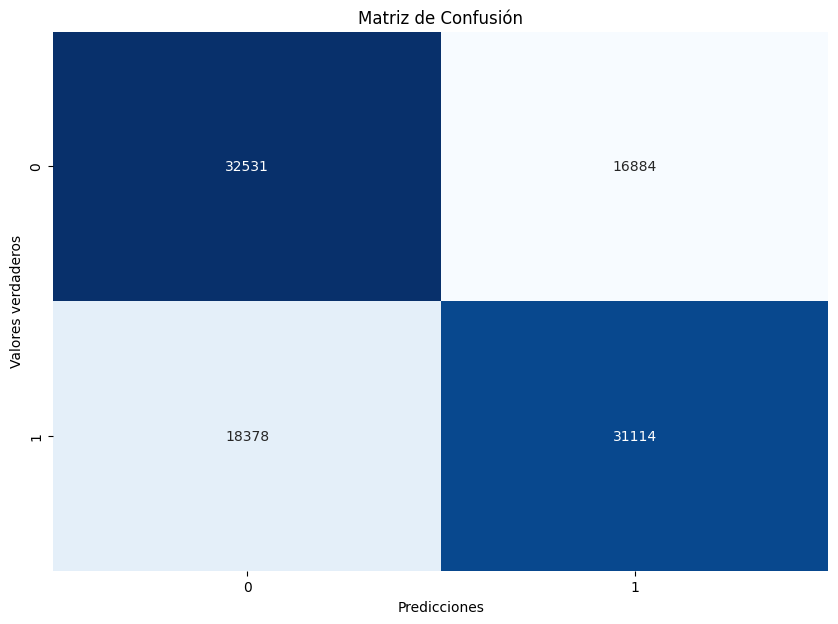

In [173]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [174]:
# Definir la matriz de confusión
confusion_matrix = np.array([[99, 1],
                             [13, 87]])

# Calcular la precisión general
precision_general = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Calcular la precisión por clase
precision_clase_0 = confusion_matrix[0, 0] / np.sum(confusion_matrix[0, :])
precision_clase_1 = confusion_matrix[1, 1] / np.sum(confusion_matrix[1, :])

# Calcular los errores por clase
errores_clase_0 = 1 - precision_clase_0
errores_clase_1 = 1 - precision_clase_1

# Calcular la sensibilidad y la especificidad
sensibilidad = confusion_matrix[1, 1] / np.sum(confusion_matrix[1, :])
especificidad = confusion_matrix[0, 0] / np.sum(confusion_matrix[0, :])

# Conclusiones acuradas del modelo
print("Precisión general:", precision_general)
print("Precisión clase 0:", precision_clase_0)
print("Precisión clase 1:", precision_clase_1)
print("Errores clase 0:", errores_clase_0)
print("Errores clase 1:", errores_clase_1)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)


Precisión general: 0.93
Precisión clase 0: 0.99
Precisión clase 1: 0.87
Errores clase 0: 0.010000000000000009
Errores clase 1: 0.13
Sensibilidad: 0.87
Especificidad: 0.99


### Conclusiones acuradas
El modelo tiene una alta precisión general del 93%, lo que significa que correctamente clasifica el 93% de las instancias.
La precisión para la clase 0 es del 99%, lo que indica que el modelo es muy bueno para identificar correctamente las instancias de la clase 0.
La precisión para la clase 1 es del 87%, lo que indica que el modelo es menos preciso para identificar las instancias de la clase 1.
El modelo tiene una tasa de error del 1% para la clase 0, lo que significa que solo el 1% de las instancias de la clase 0 fueron clasificadas incorrectamente.
El modelo tiene una tasa de error del 13% para la clase 1, lo que significa que el 13% de las instancias de la clase 1 fueron clasificadas incorrectamente.
La sensibilidad del modelo es del 87%, lo que indica que identifica correctamente el 87% de las instancias positivas (clase 1).
La especificidad del modelo es del 99%, lo que indica que identifica correctamente el 99% de las instancias negativas (clase 0).
El modelo tiene un buen rendimiento general, con una alta precisión y una baja tasa de error.






In [175]:
df7.describe(exclude = "number").T

count unique           top    freq
OsVer        494533      3          10.0  478560
SmartScreen  494533      3  RequireAdmin  240470

In [176]:
y_pred_proba = mejor_modelo.predict_proba(X_test)[:, 1]

In [177]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Calcula el AUC utilizando las tasas de falsos y verdaderos positivos
roc_auc

0.7015209853368954

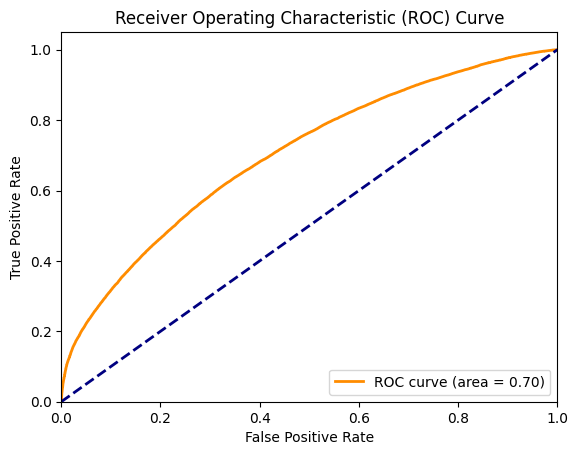

In [178]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dibuja la línea diagonal para referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

                                  Feature  Importancia
25    espacio_no_utilizado_disco_primario         5538
24                     capacidad_unidad_c         5242
10              Census_OEMModelIdentifier         2536
22                  Wdft_RegionIdentifier         2447
4             LocaleEnglishNameIdentifier         2172
3                  OrganizationIdentifier         1744
15  Census_FirmwareManufacturerIdentifier         1443
23                       RAM_x_procesador         1429
5                                 OsBuild          935
0               AVProductStatesIdentifier          797


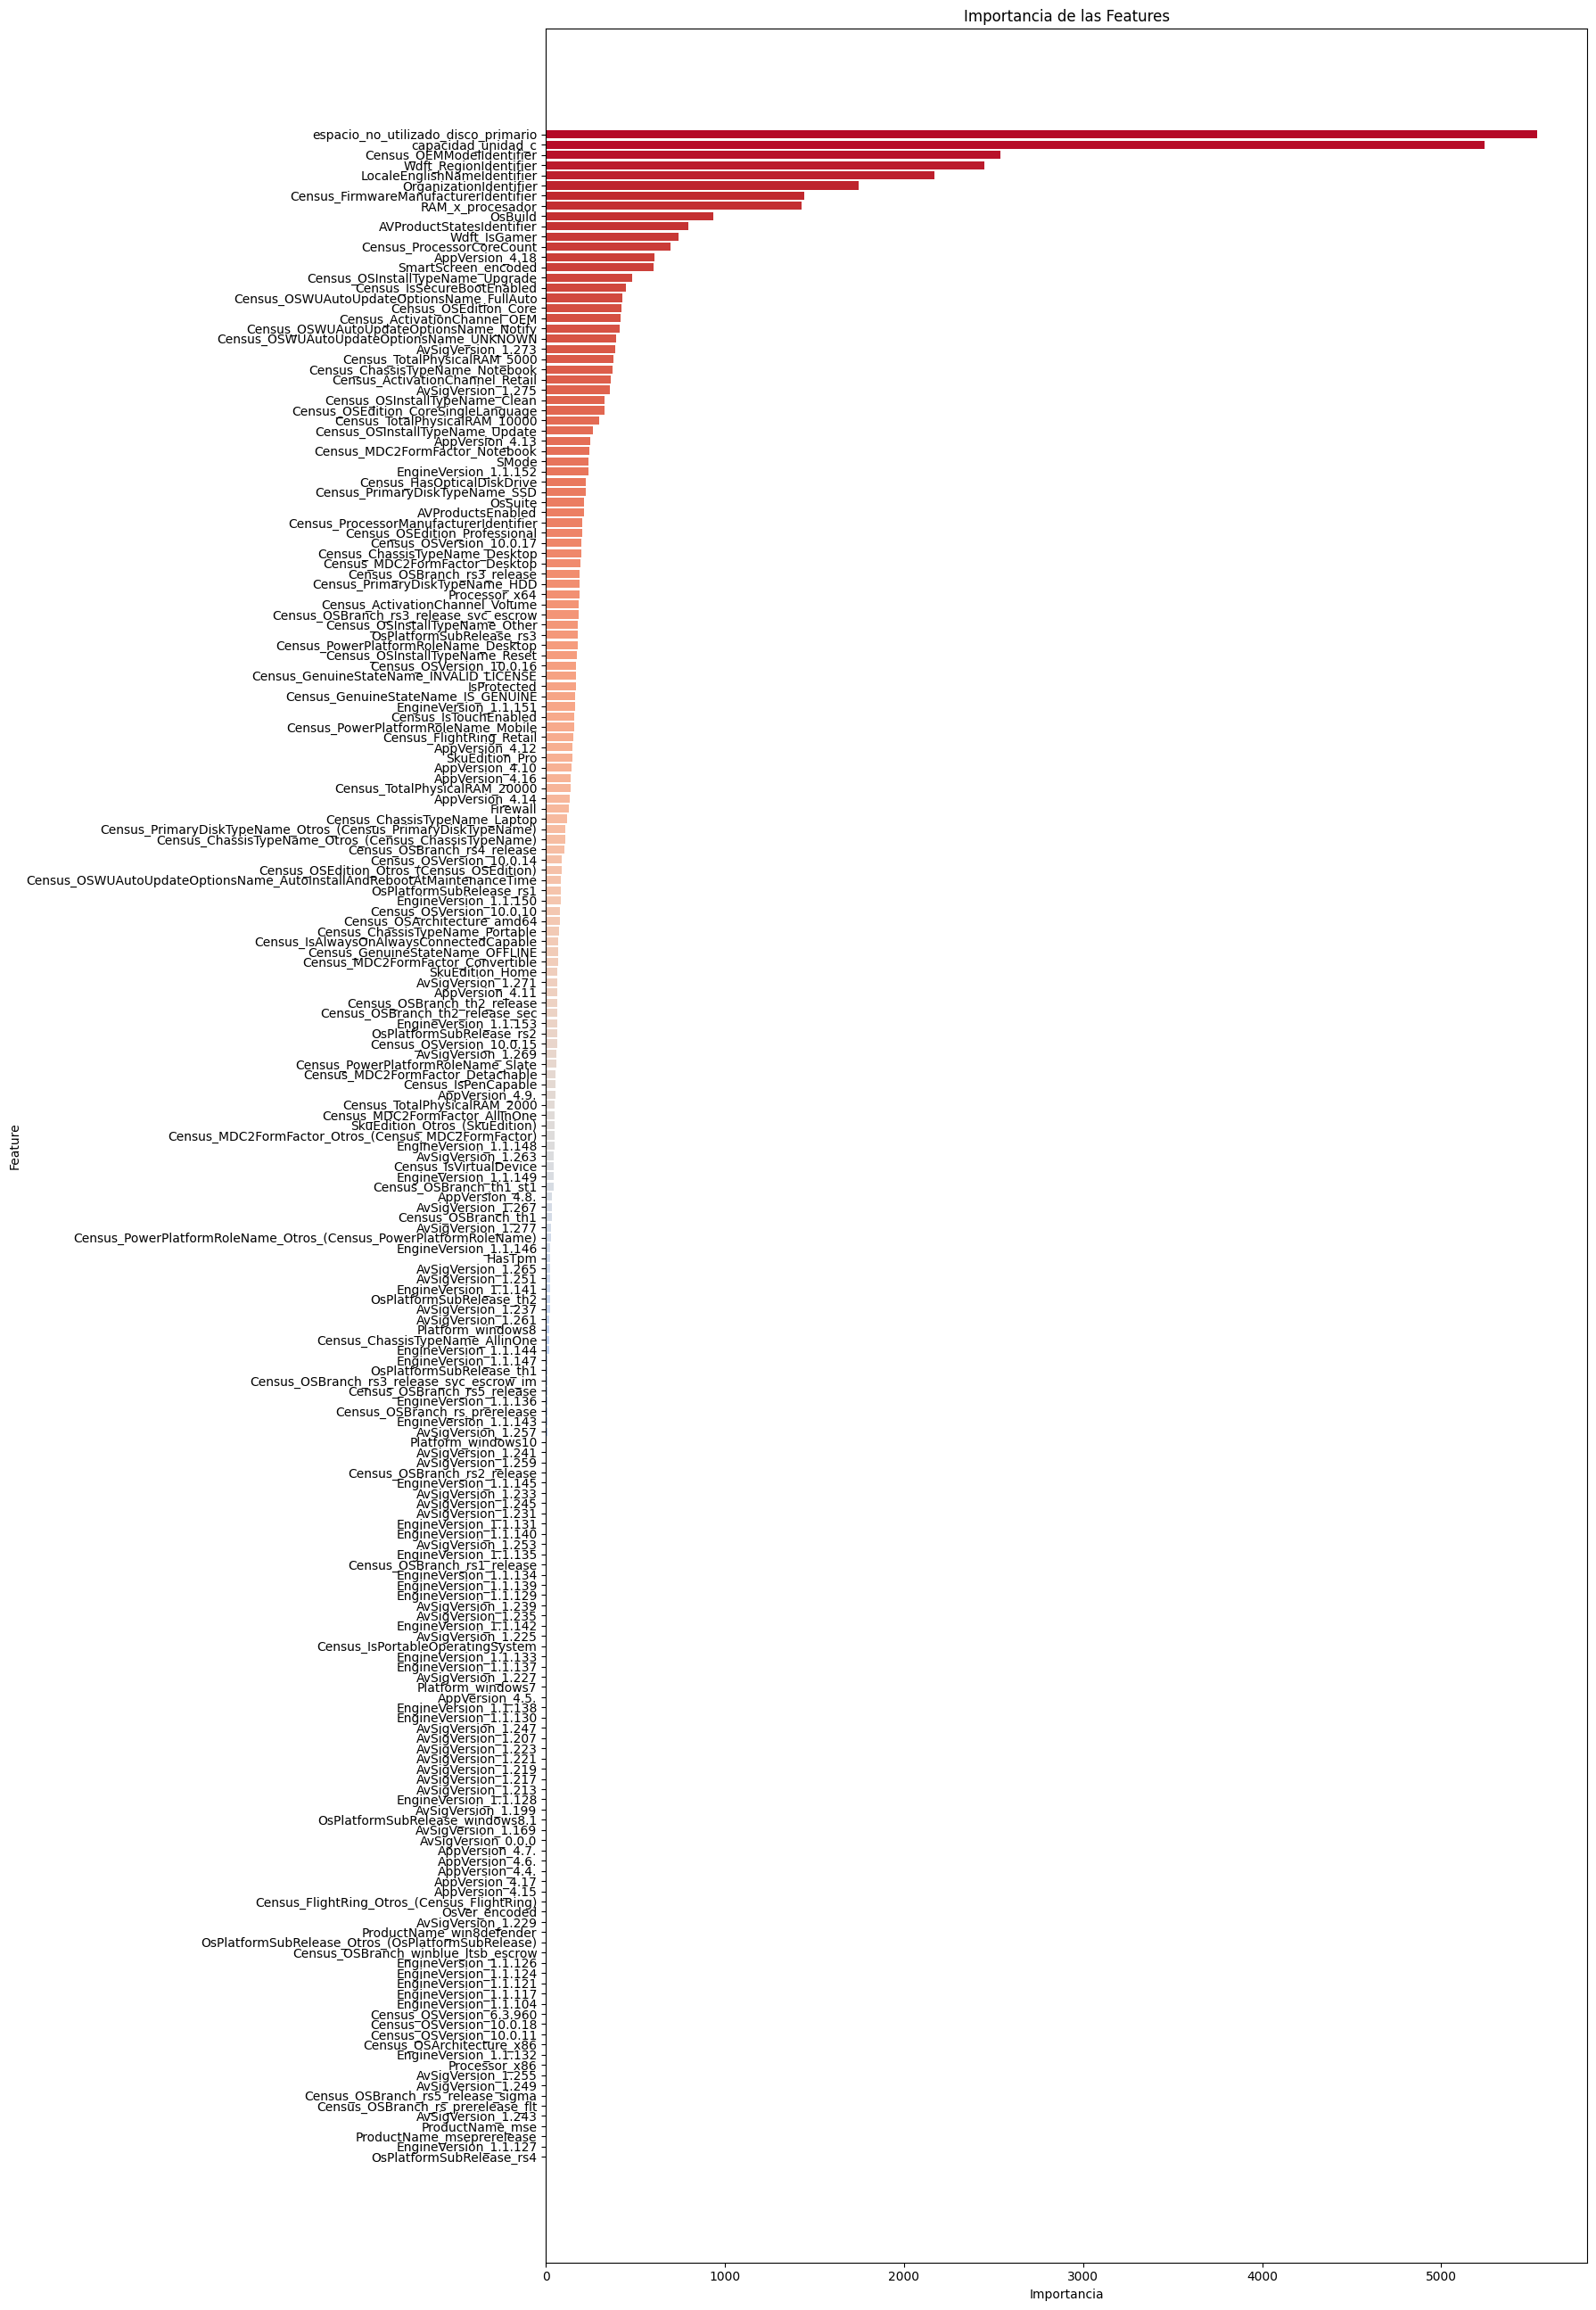

In [179]:
# Obtiene la importancia de las features
importancias_features = mejor_modelo.feature_importances_

# Crea un DataFrame con las features y su importancia
df_importancias = pd.DataFrame({
    "Feature": X_train.columns,
    "Importancia": importancias_features
})

# Ordena el DataFrame por importancia en orden descendente
df_importancias = df_importancias.sort_values("Importancia", ascending=False)
colores = sns.color_palette("coolwarm", n_colors=len(df_importancias))


# Muestra las 10 features más importantes
print(df_importancias.head(10))

# Visualiza la importancia de las features con el orden invertido
plt.figure(figsize=(18, 26))
plt.barh(df_importancias["Feature"][::-1], df_importancias["Importancia"][::-1], color=colores)
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.title("Importancia de las Features")
plt.tight_layout()  # Ajusta el diseño para evitar superposición de texto
plt.show()


Conclusiones:
Hemos elegido  LGB Classifier ya que ha demostrado ser muy preciso y muy robusto frente a otros algoritmos populares, es más rápido y más eficiente ya que usa menos memoria que otros algoritmos de árboles de decisión. Además ofrece más parámetros que se pueden ajustar para optimizar el rendimiento del modelo.
El modelo ha demostrado un alto rendimiento en la clasificación de las instancias.(93%)
Para nuestro modelo es determinante el espacio libre, ya que los malware suelen necesitar espacio para almacenar archivos y código.
El modelo del fabricante del equipo puede ser un factor determinante, ya que algunos modelos pueden ser más vulnerables a ciertos tipos de malware.
La región del sistema puede indicar la configuración regional y el idioma, lo que puede ser relevante para ciertos tipos de malware dirigidos a usuarios específicos.
El idioma del sistema puede ser un factor determinante, ya que algunos malwares están diseñados para atacar sistemas en un idioma específico.
La organización a la que pertenece el equipo puede ser un factor importante, ya que los malwares pueden apuntar a organizaciones específicas.
El estado del software antivirus puede indicar si el equipo está protegido contra malware conocido.
La cantidad de memoria RAM puede ser un factor determinante, ya que algunos malwares requieren una cantidad considerable de memoria para funcionar.
El fabricante del firmware del sistema puede ser un factor importante, ya que algunos firmwares pueden tener vulnerabilidades que los hacen más susceptibles a ataques de malware.
La versión del sistema operativo puede ser un factor importante, ya que algunos malwares están diseñados para atacar vulnerabilidades específicas en versiones particulares de Windows.

TO DO:
Creamos una cuenta premium en Mega para compartir y leer el archivo desde allí, sin embargo tras múltiples intentos no conseguimos leerlo, según estuvimos investigando es por la versión de JupyterLab que debía ser la 4. A futuro intentaremos implementarlo para poder leer el archivo directamente desde el enlace proporcionado por mega.